# Import Libraries

In [ ]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from imblearn.over_sampling import SMOTE

# Load Dataset + Explore If Needed

In [ ]:
df = pd.read_pickle("df_0_consolidated_clean_clean.pkl")
df.columns

Index(['WEEK', 'PLATFORM', 'CATEGORY 1', 'CATEGORY 2', 'ITEM NAME', 'brand',
       'model', 'equipment', 'remarks', 'USERS', 'ITEMS VIEWED',
       'ITEMS ADDED TO CART', 'ITEMS CHECKED OUT', 'ITEMS PURCHASED',
       'ITEM REVENUE', 'best_category', 'best_subcategory',
       'cardio_accessories', 'cardio_elliptical', 'cardio_exercise_bike',
       'cardio_rowing_machine', 'cardio_treadmill', 'strength_heavy_equipment',
       'strength_free_weights', 'strength_storage_bench_platform',
       'strength_functional', 'gym_flooring', 'service', 'buy_user_rate',
       'buy_view_rate', 'buy_cart_rate', 'buy_chkout_rate', 'user_view_rate',
       'view_abandonment_rate', 'cart_abandonment_rate',
       'chkout_abandonment_rate'],
      dtype='object')

In [ ]:
def get_coor(data):
    correlation_matrix = data.corr()
    # Set up the matplotlib figure
    plt.figure(figsize=(12, 8))

    # Create a heatmap using seaborn
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

    # Set the title
    plt.title('Correlation Heatmap of Numerical Columns')

    # Show the plot
    plt.show()

## Correlation Check

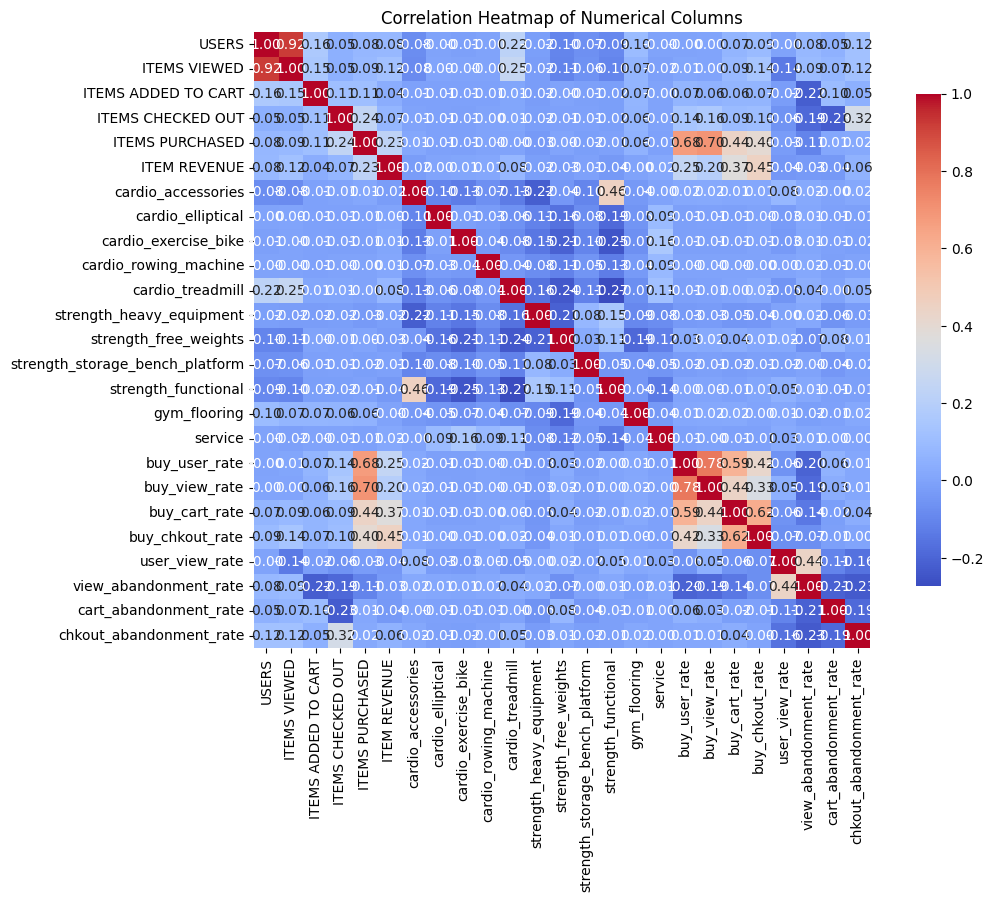

In [ ]:
data = df[['USERS', 'ITEMS VIEWED',
       'ITEMS ADDED TO CART', 'ITEMS CHECKED OUT', 'ITEMS PURCHASED',
       'ITEM REVENUE',
       'cardio_accessories', 'cardio_elliptical', 'cardio_exercise_bike',
       'cardio_rowing_machine', 'cardio_treadmill', 'strength_heavy_equipment',
       'strength_free_weights', 'strength_storage_bench_platform',
       'strength_functional', 'gym_flooring', 'service', 'buy_user_rate',
       'buy_view_rate', 'buy_cart_rate', 'buy_chkout_rate', 'user_view_rate',
       'view_abandonment_rate', 'cart_abandonment_rate',
       'chkout_abandonment_rate']]

get_coor(data)

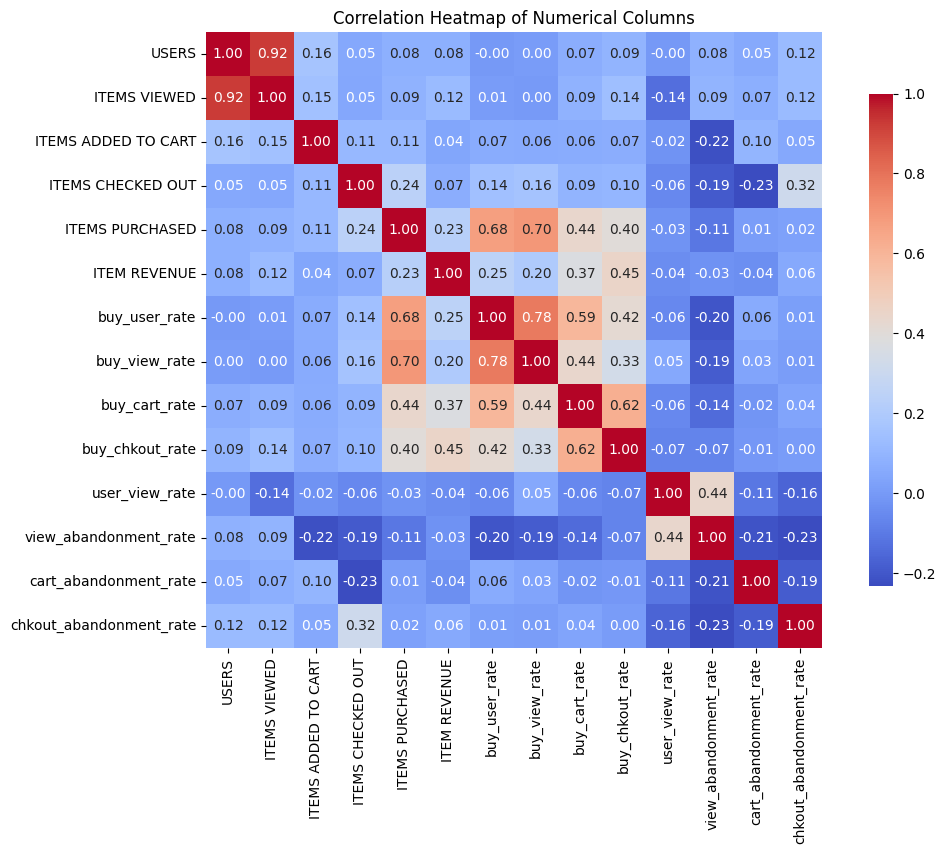

In [ ]:
data = df[['USERS', 'ITEMS VIEWED',
       'ITEMS ADDED TO CART', 'ITEMS CHECKED OUT', 'ITEMS PURCHASED',
       'ITEM REVENUE','buy_user_rate',
       'buy_view_rate', 'buy_cart_rate', 'buy_chkout_rate', 'user_view_rate',
       'view_abandonment_rate', 'cart_abandonment_rate',
       'chkout_abandonment_rate']]

get_coor(data)

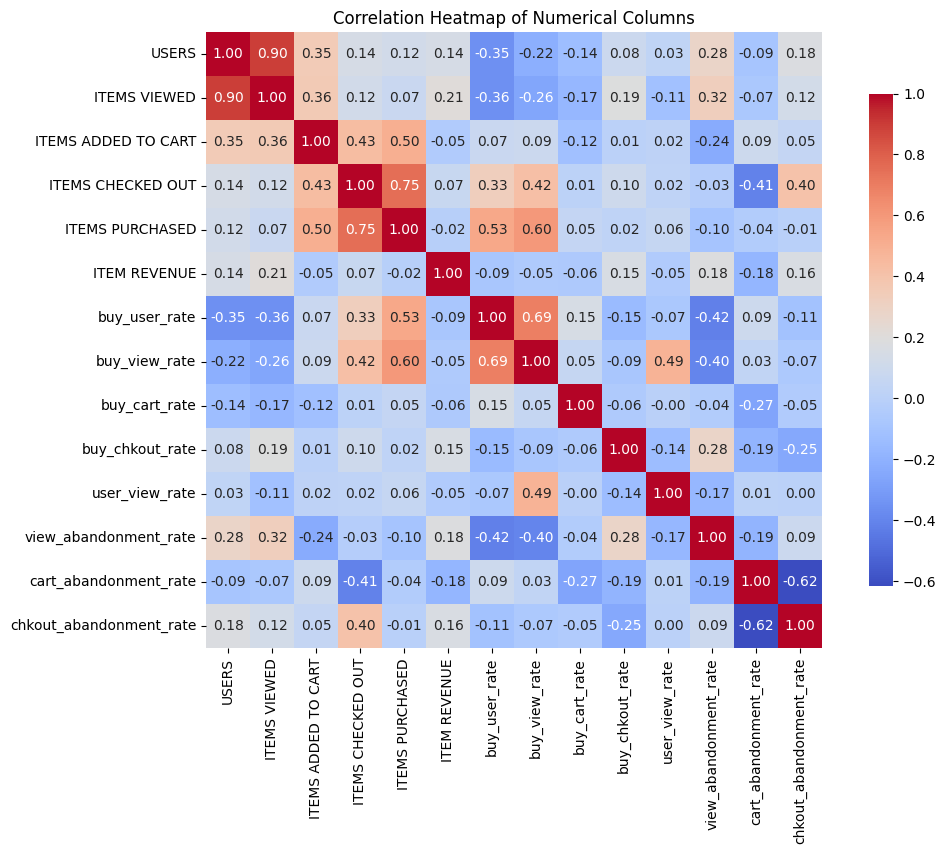

In [ ]:
data = df[df['ITEM REVENUE']>0][['USERS', 'ITEMS VIEWED',
       'ITEMS ADDED TO CART', 'ITEMS CHECKED OUT', 'ITEMS PURCHASED',
       'ITEM REVENUE','buy_user_rate',
       'buy_view_rate', 'buy_cart_rate', 'buy_chkout_rate', 'user_view_rate',
       'view_abandonment_rate', 'cart_abandonment_rate',
       'chkout_abandonment_rate']]

get_coor(data)

## Histogram

In [ ]:
def plot_numerical_histograms(data, bins=30, figsize=(12, 8)):
    """
    Plots histogram distributions for all numerical columns in the DataFrame.

    Parameters:
    - data: pd.DataFrame - The input DataFrame containing numerical columns.
    - bins: int - The number of bins for the histogram (default is 30).
    - figsize: tuple - The size of the figure (default is (12, 8)).
    """
    # Select numerical columns
    numerical_cols = data.select_dtypes(include=['number']).columns

    # Set up the matplotlib figure


    # Loop through numerical columns and plot histograms
    for i, col in enumerate(numerical_cols):
        plt.figure(figsize=figsize)
        sns.histplot(data[col], bins=bins, kde=True, color='blue', stat='count')  # KDE for smooth curve
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.tight_layout()  # Adjust subplots to fit into the figure area.
        plt.show()

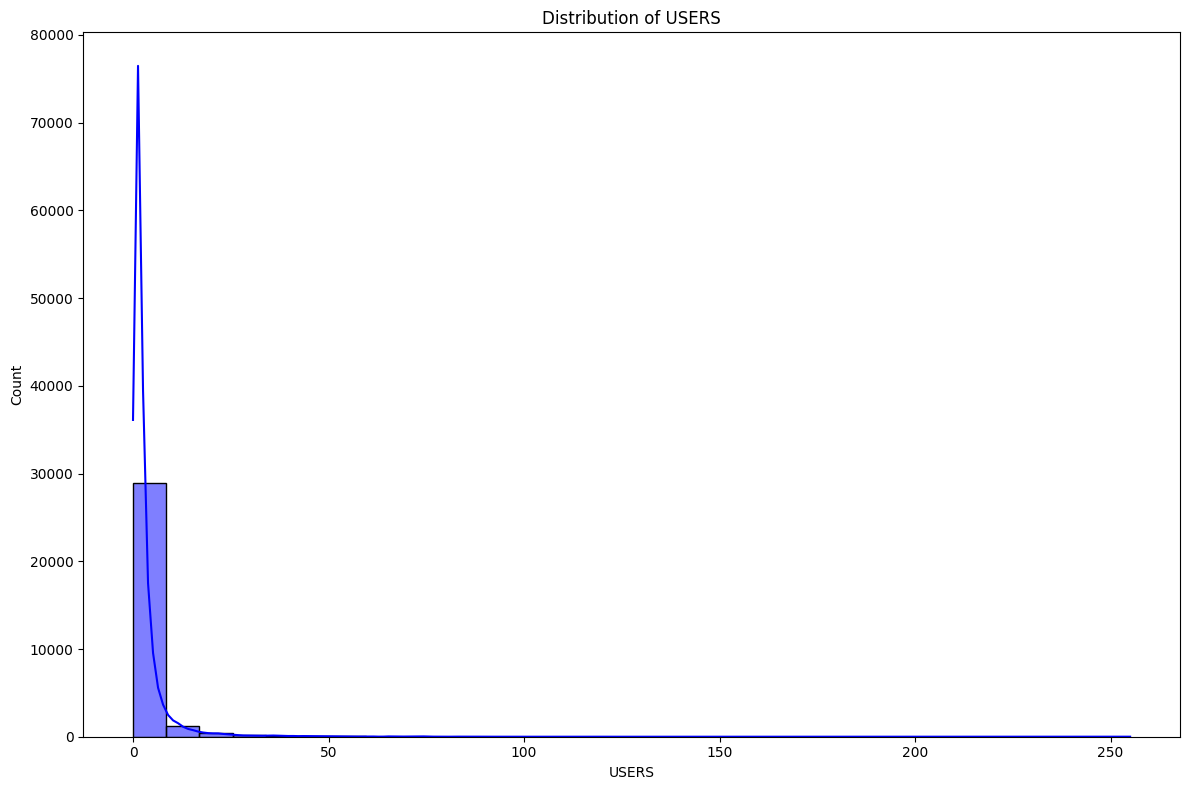

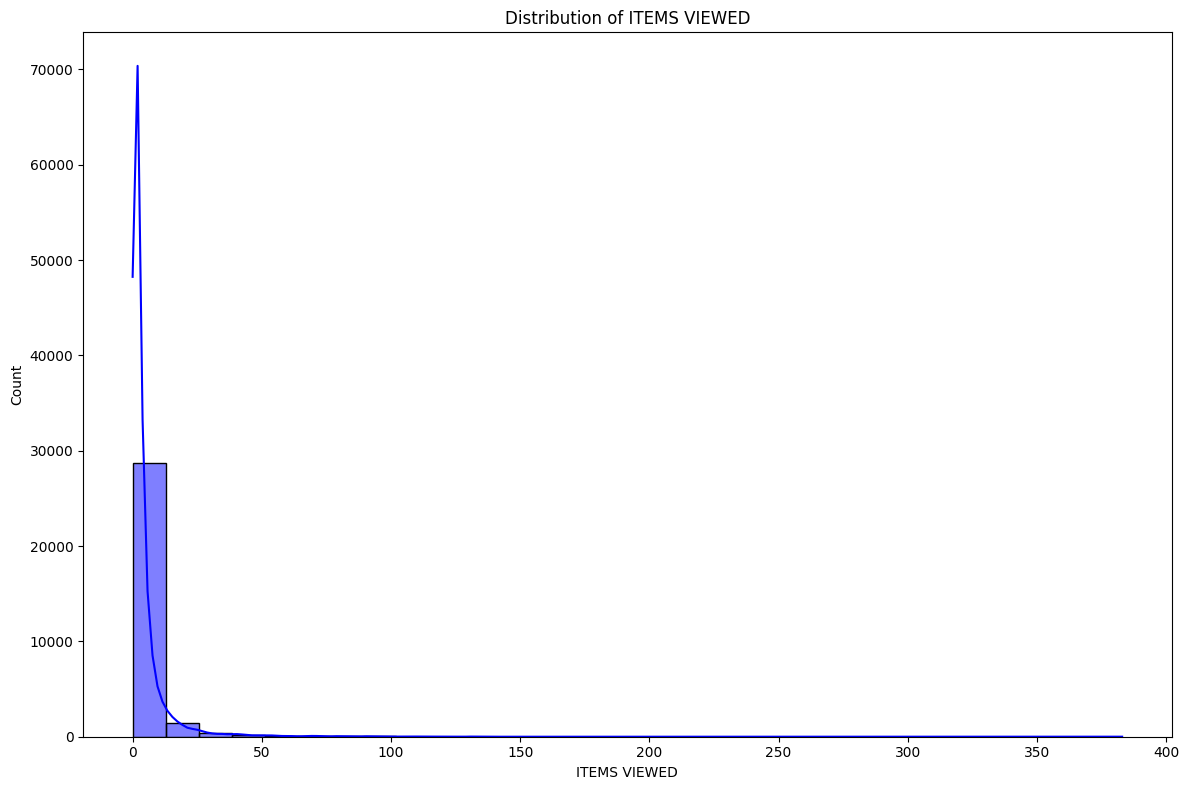

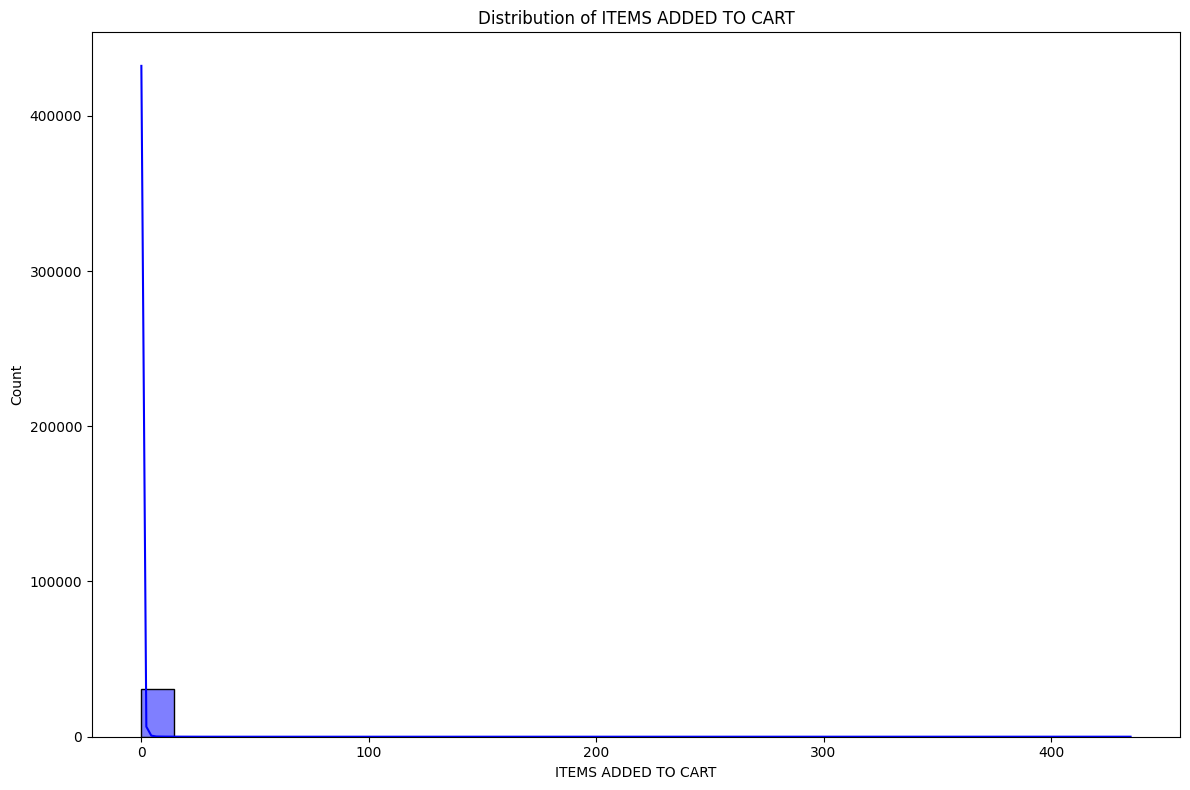

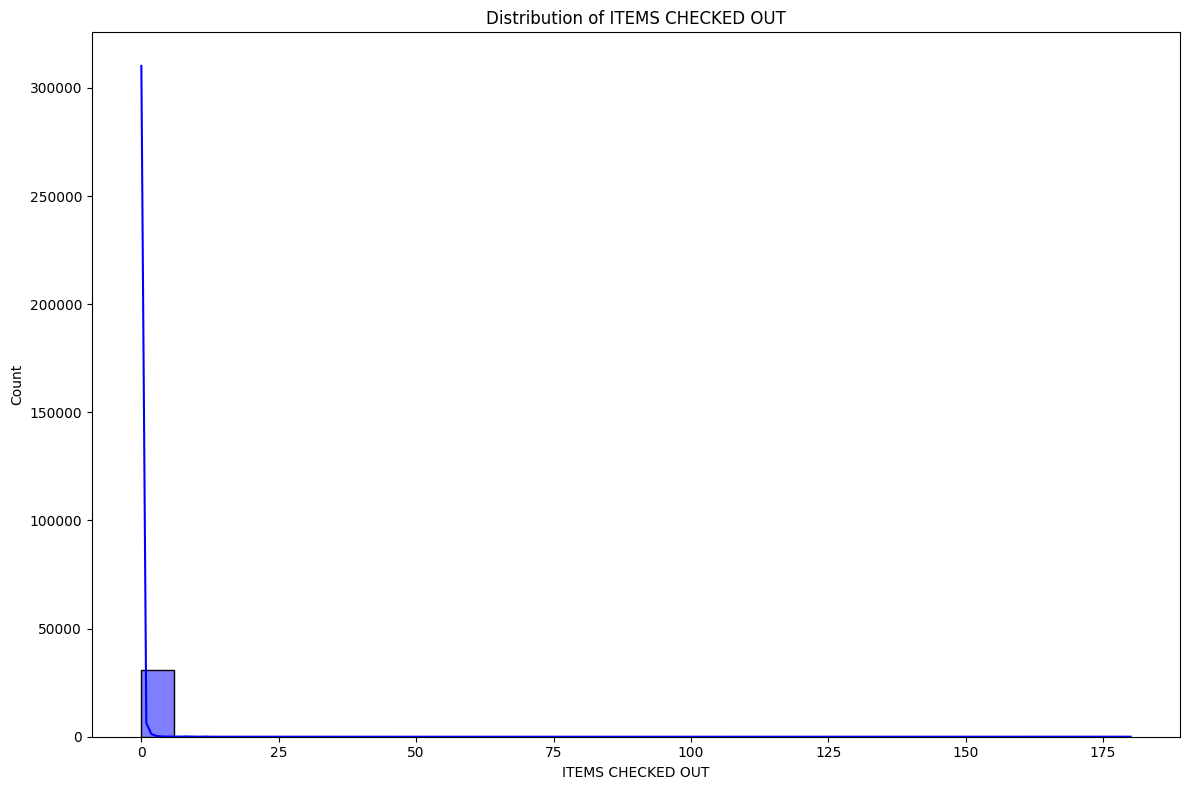

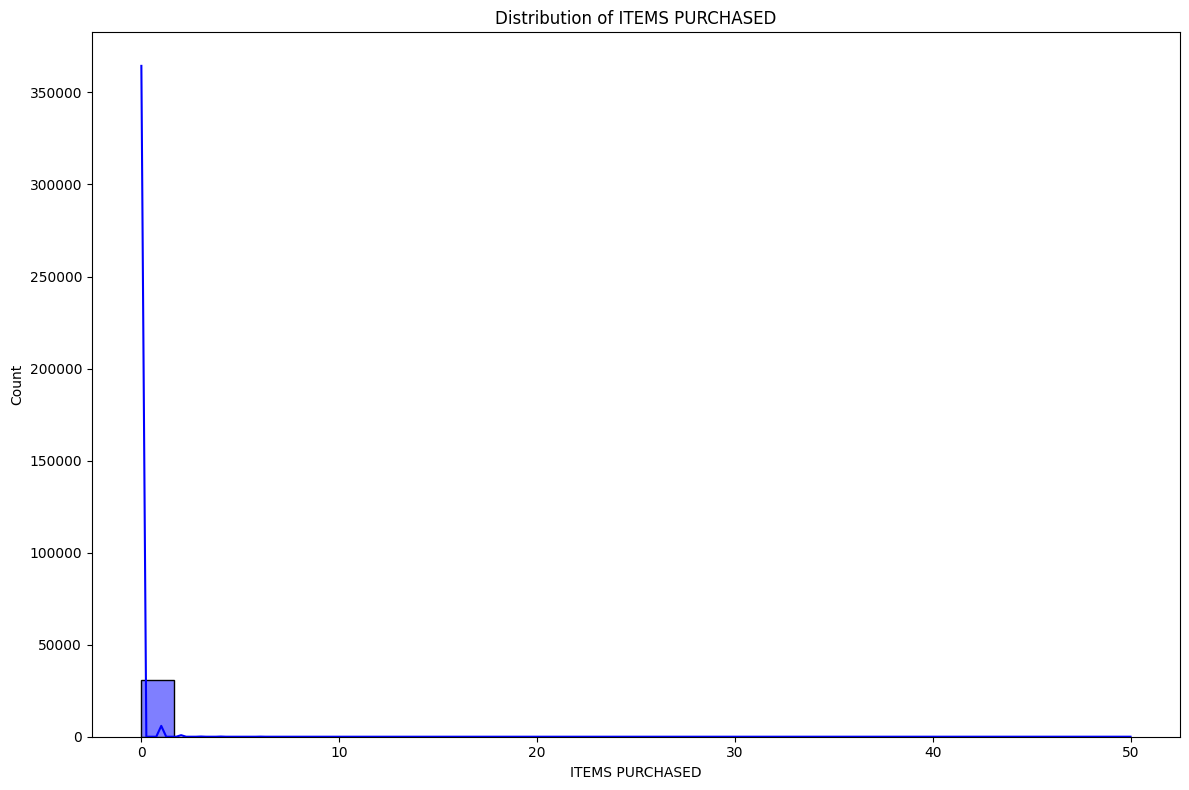

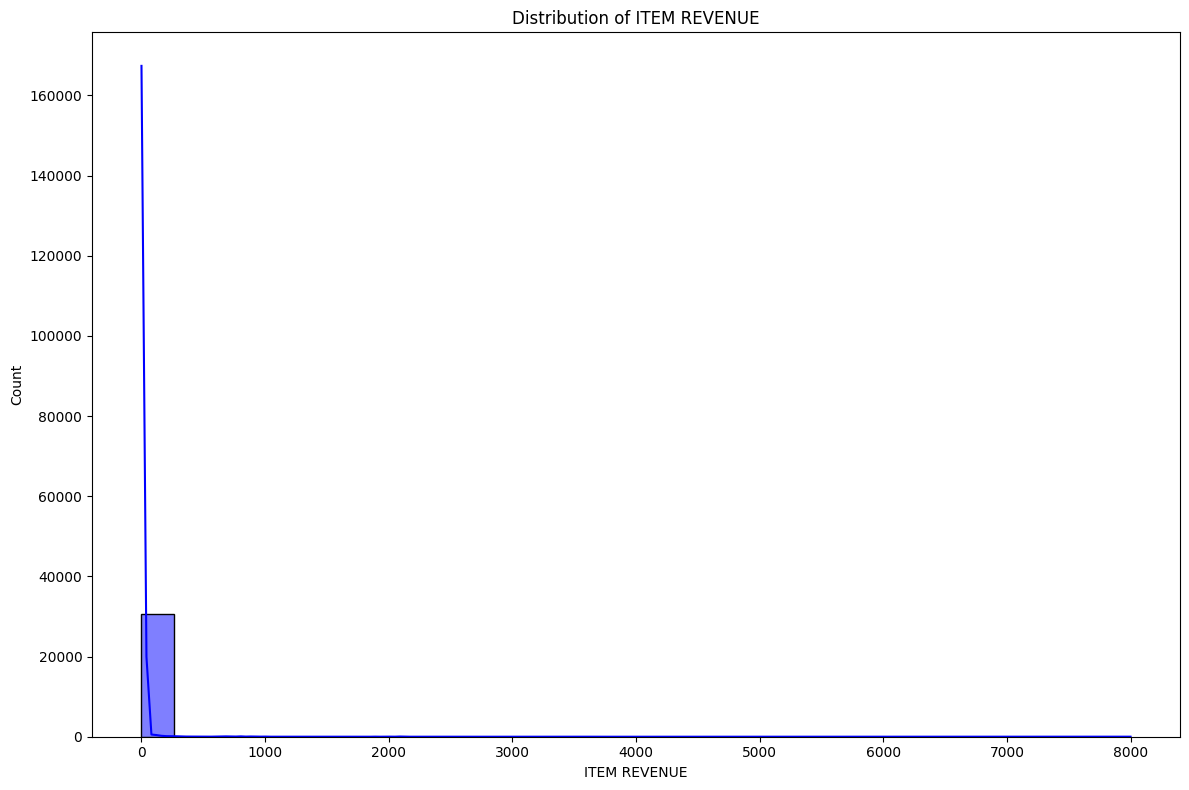

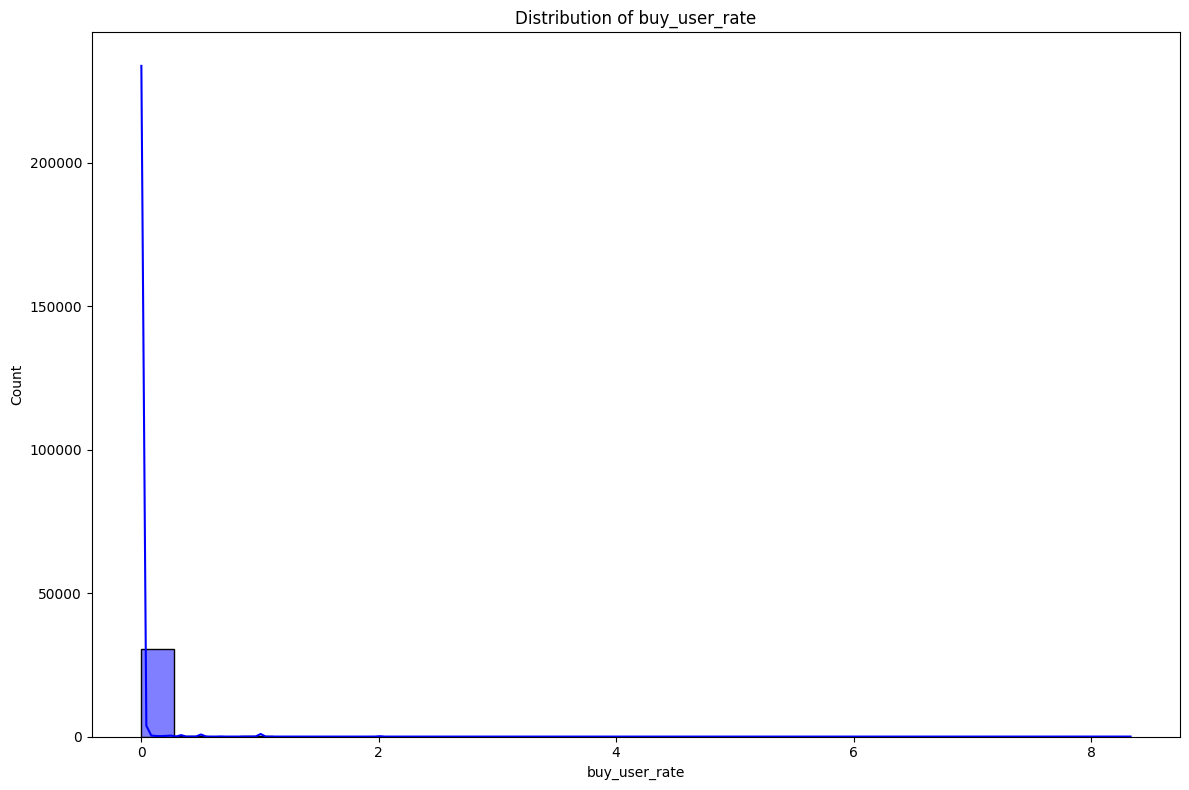

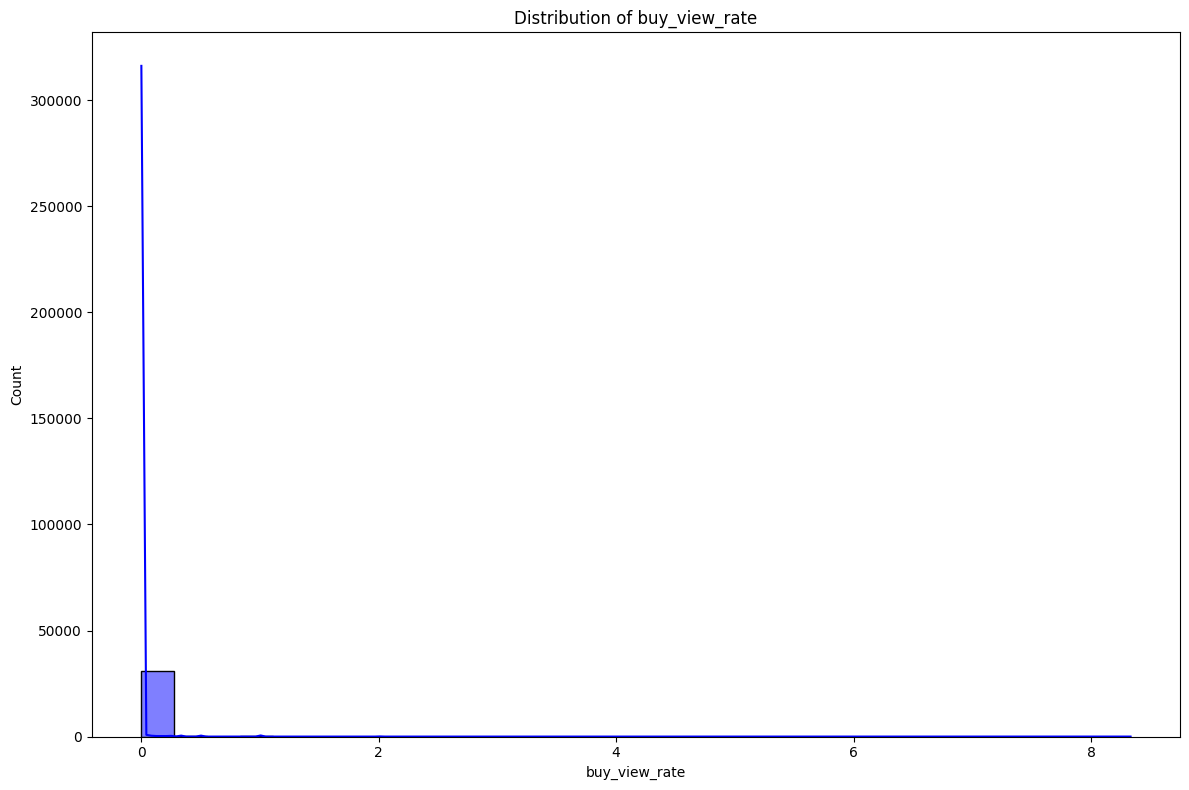

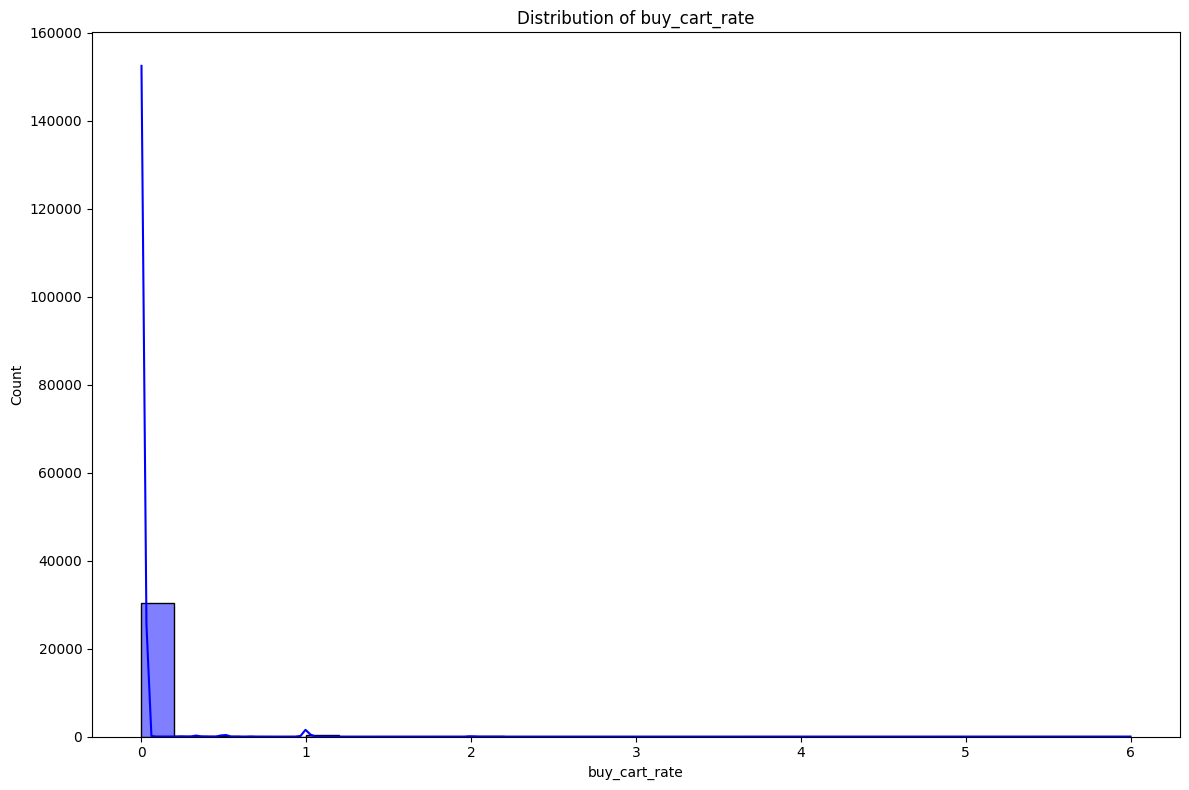

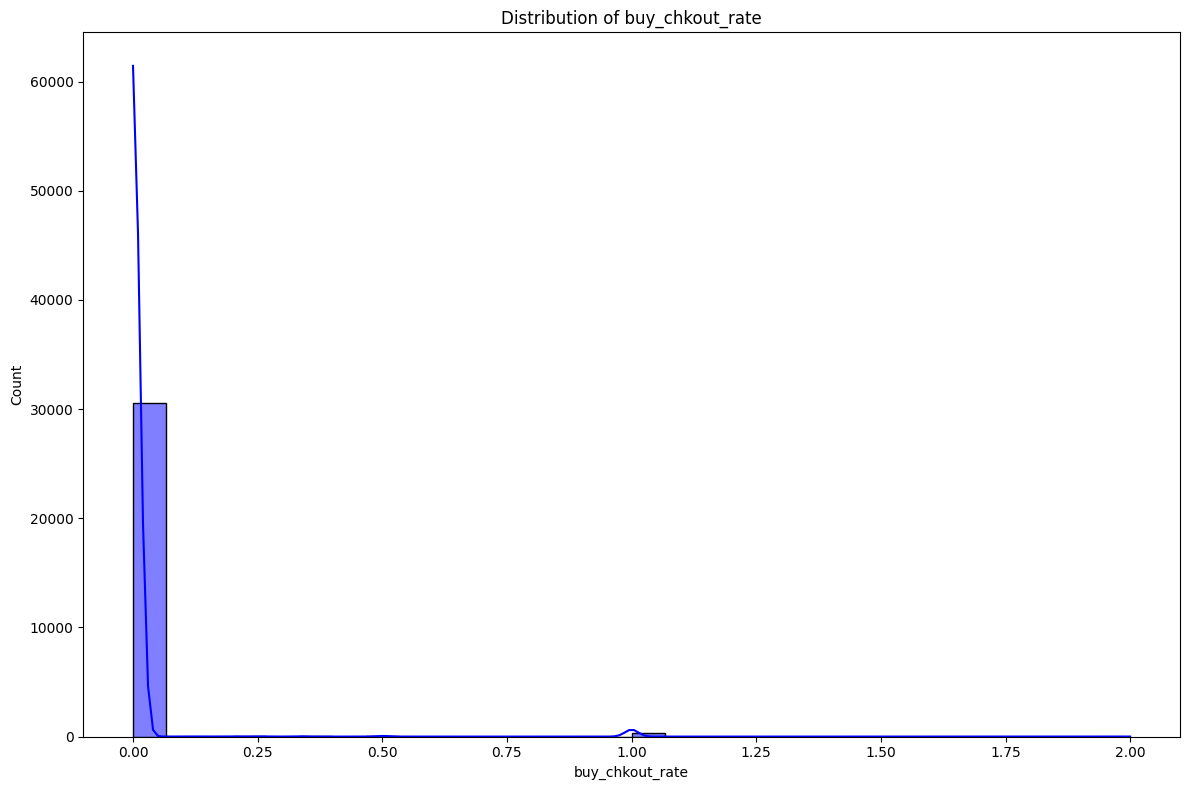

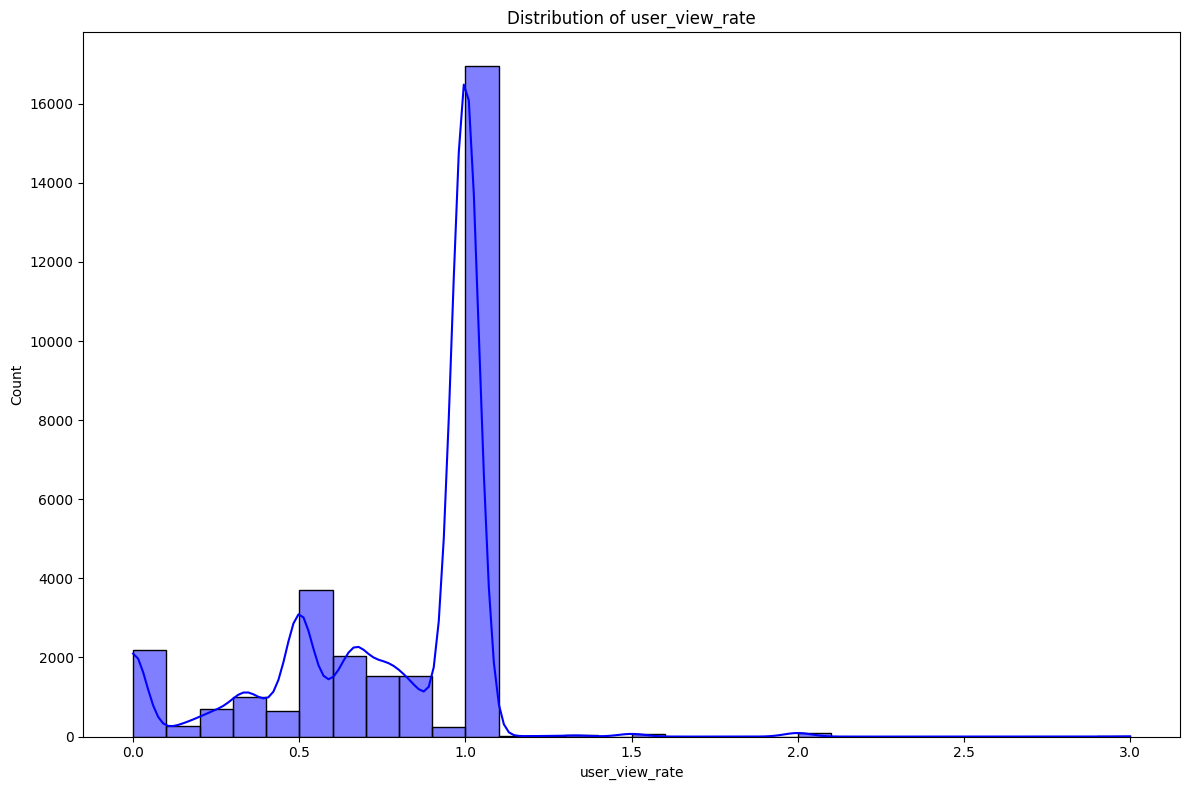

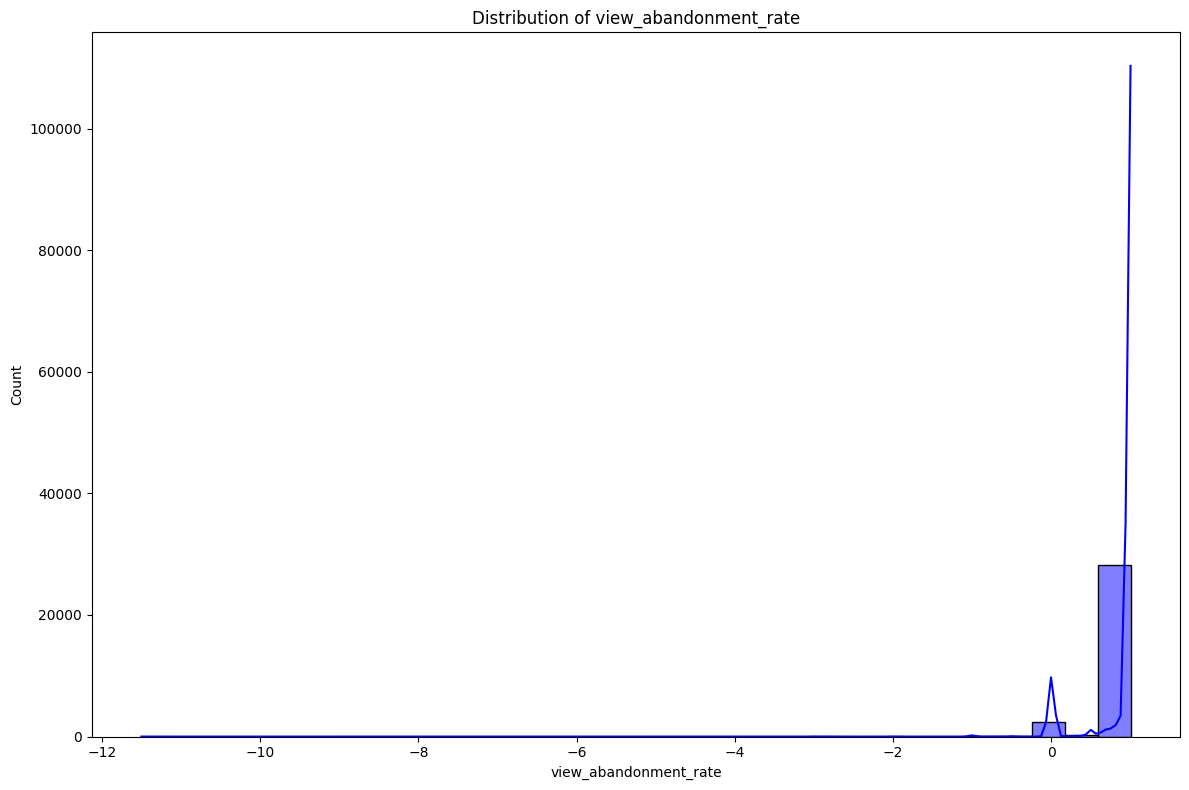

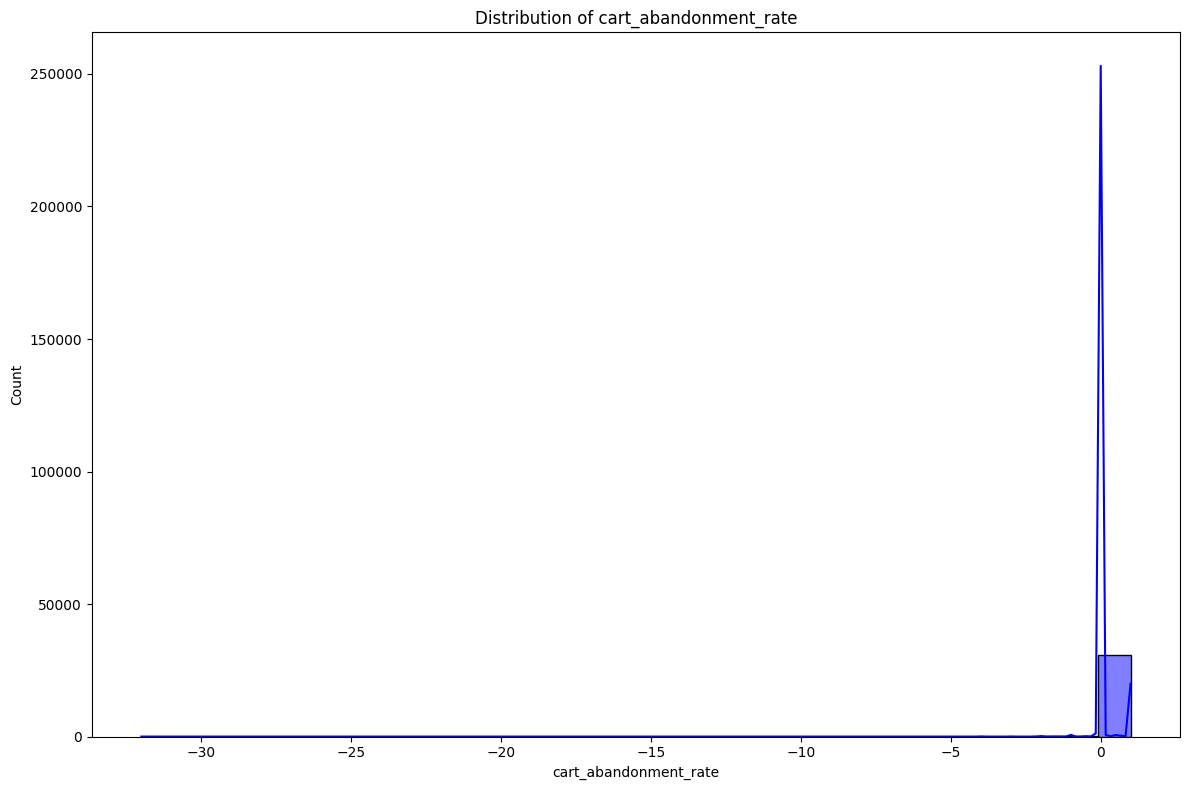

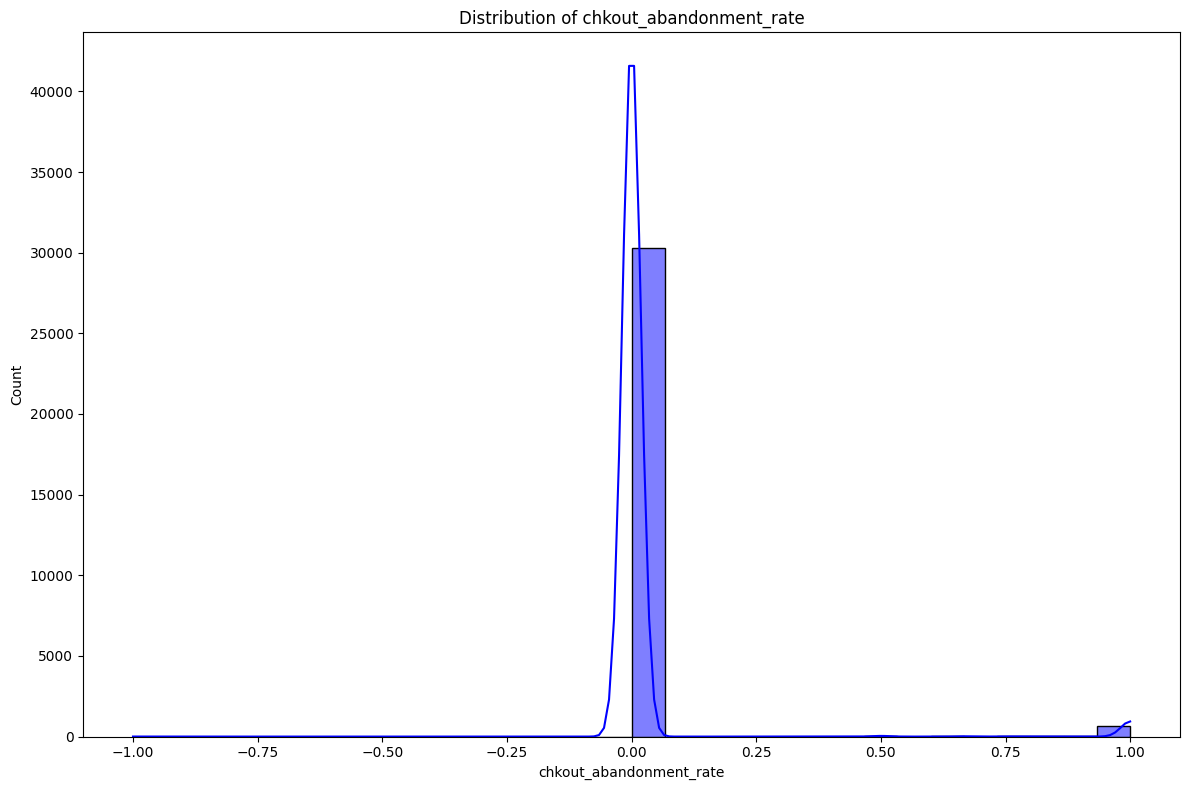

In [ ]:
data = df[['USERS', 'ITEMS VIEWED',
       'ITEMS ADDED TO CART', 'ITEMS CHECKED OUT', 'ITEMS PURCHASED',
       'ITEM REVENUE','buy_user_rate',
       'buy_view_rate', 'buy_cart_rate', 'buy_chkout_rate', 'user_view_rate',
       'view_abandonment_rate', 'cart_abandonment_rate',
       'chkout_abandonment_rate']]

plot_numerical_histograms(data)

In [ ]:
sorted(df['equipment'].dropna().unique())

['12-Sided Urethane Dumbbells',
 '12-Sided Urethane Fixed EZ Curl Barbell',
 '3-in-1 Soft Plyometric Box',
 '7ft Standard Threaded Bar',
 'AB Board',
 'AB Mat',
 'AB Mat Pad',
 'Ab Mat',
 'Ab/Back Machine',
 'Abdominal Bar',
 'Abdominal Bench',
 'Abdominal Crunch',
 'Abdominal Workout Weight Bench',
 'Accessory Rack',
 'Accessory Rack Exercise Attachment',
 'Adjustable Bench',
 'Adjustable Dumbbell Set',
 'Adjustable Dumbbells',
 'Adjustable Dumbbells Set',
 'Adjustable Dumbbells Set With Stand',
 'Adjustable Exercise Workout Bench',
 'Adjustable Squat Rack',
 'Adjustable Squat Rack Stand',
 'Adjustable Weights',
 'Aerobic Round Step Deck',
 'Aerobic Step Deck',
 'Aerobic Stepper',
 'Aerobic Stepper & Bench',
 'Aerobic Stepper and Bench',
 'Agility Cones',
 'Agility Dots',
 'Agility Ladder',
 'Air And Magnetic Rower',
 'All-In-One Complete Trainer',
 'All-In-One Trainer',
 'All-in-One Complete Trainer',
 'All-in-One Trainer',
 'Aluminum Technique Bar',
 'Ammo Box',
 'Anchor Mount',
 'A

## Some Prompts

You are an experienced data scientist and data analyst with more than 20 years experience. You are good at uncovering trends and finding insights from datasets.
You are very experienced in using clustering analysis or other methods to uncover these insights.
You know how to handle imbalanced and lack of data in real world scenarios where the data might not be sufficient and dirty.
You shall understand what the business and technical objectives are and understand what kind of data you have at hand, before performing key analysis on the datasets.

I am trying to meet the business objective and technical objective as per below.

Business Objective 1: The aim is to increase combined revenue contribution from non-treadmill product categories, thereby reducing the business dependency on treadmill sales and ensuring a more balanced and resilient revenue distribution across multiple product categories. Identifying products with untapped growth potential is essential for tailoring discount and bundling strategies to drive revenue growth and product turnover. Additionally, there is a need to determine which products should be discontinued or replaced to streamline operations and reduce overhead costs.

Technical Objective 1: Product Performance Analytics
Analyze sales and interaction data to identify product performance trends and key revenue drivers. This includes using trend analysis, segmentation, and correlation studies to understand customer purchasing patterns, seasonality, and slow-moving products. Develop a product performance index by evaluating revenue consistency and sales continuity, and recommend strategies such as discounting, bundling, or phasing out poor selling products to optimize product mix and revenue gain.

I have a dataframe where it is a weekly aggregated report.
Each row will be the aggregated numbers of how many times an item was viewed, added to cart, checked out, purchased, and the revenue, for the week.
This means that it is possible the same item will be shown for all weeks of the year.
Since the data is dirty, it could also mean that the item names may change over time but are actually still the same products.
There is no information on the customer profile. We only have the user-item interaction information.
The column information as given below.

Column information
'WEEK' = Aggregated info by the week.
'PLATFORM' = Is the platform a "WEBSITE", "LAZADA", or "SHOPEE".
'CATEGORY 1' = Original category as labelled by data owner. Not clean. 'best_category' is cleaner.
'CATEGORY 2' = Original sub-category as labelled by data owner. Not clean. 'best_subcategory' is cleaner.
'ITEM NAME' = Full item name including remarks as given by the data owner. Not clean.
'brand' = Brand of item derived from 'ITEM NAME'. Derived using LLM Extraction from 'ITEM NAME'
'model' = Model of item derived from 'ITEM NAME'. Derived using LLM Extraction from 'ITEM NAME'
'equipment' = Equipment name of item derived from 'ITEM NAME'. Derived using LLM Extraction from 'ITEM NAME'
'remarks' = Other non-brand, non-model, non-equipment name items derived from 'ITEM NAME'. Derived using LLM Extraction from 'ITEM NAME'
'USERS', = Number of unique users who visited the item page.
'ITEMS VIEWED' = Number of views of the item page.
'ITEMS ADDED TO CART' = Number of times item is added to cart.
'ITEMS CHECKED OUT' = Number of times item is checked out.
'ITEMS PURCHASED' = Number of items purchased.
'ITEM REVENUE' = Total revenue for the week for this item listing.
'best_category' = Category as labelled by LLM. Considered to be clean.
'best_subcategory' = Subcategory as labelled by LLM. Considered to be clean.
'cardio_accessories' = A subcategory tag which the LLM considered the item to be under. One item can belong to one or more subcategory tags.
'cardio_elliptical' = A subcategory tag which the LLM considered the item to be under. One item can belong to one or more subcategory tags.
'cardio_exercise_bike' = A subcategory tag which the LLM considered the item to be under. One item can belong to one or more subcategory tags.
'cardio_rowing_machine' = A subcategory tag which the LLM considered the item to be under. One item can belong to one or more subcategory tags.
'cardio_treadmill = A subcategory tag which the LLM considered the item to be under. One item can belong to one or more subcategory tags.
'strength_heavy_equipment' = A subcategory tag which the LLM considered the item to be under. One item can belong to one or more subcategory tags.
'strength_free_weights' = A subcategory tag which the LLM considered the item to be under. One item can belong to one or more subcategory tags.
'strength_storage_bench_platform' = A subcategory tag which the LLM considered the item to be under. One item can belong to one or more subcategory tags.
'strength_functional' = A subcategory tag which the LLM considered the item to be under. One item can belong to one or more subcategory tags.
'gym_flooring' = A subcategory tag which the LLM considered the item to be under. One item can belong to one or more subcategory tags.
'service' = A subcategory tag which the LLM considered the item to be under. One item can belong to one or more subcategory tags.

I have data where out of 31000 rows, there are only 600 rows where there the ITEM REVENUE or ITEMS PURCHASED is > 0.
This means that there is an imbalance of data.
Given the imbalance of data, I want you to consider the business and technical objective, and think about 3 good proposals on how to cluster these information so as to meet the business and technical objective.

# Clustering

In [ ]:
df_used = df.copy()

## Functions for Different Clustering Models

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
import matplotlib.cm as cm

def cluster_kMeans(ori_df, num_col_lst, cat_col_lst,
                   n_clus_start=2, n_clus_end=10, random_state=88):
    """Categorical Features are one-hot-encoded immediately."""
    df = ori_df.copy()

    # Preprocessing for nulls just in case.
    for col in num_col_lst:
        df[col] = df[col].fillna(0)

    # Scaling numerical features + one hot encoding categorical features
    numerical_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())  # Scale numerical features
    ])
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
    ])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, num_col_lst),
            ('cat', categorical_transformer, cat_col_lst)
        ],
        remainder='passthrough'  # Drop other columns not specified
    )

    # Transform Dataset for Training / Predicting later
    df_transformed = preprocessor.fit_transform(df[[*num_col_lst, *cat_col_lst]])

    # Store scores for each number of clusters
    silhouette_scores = {}
    inertia_scores = {}  # Inertia is the within-cluster sum of squares
    distortion_scores = {}
    cluster_centers = {}

    # Create kMeans object and create the pipeline.
    for n_clusters in range(n_clus_start, n_clus_end+1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init = 'auto')
        # clustering_pipeline = Pipeline(steps=[
        #     ('preprocessor', preprocessor),  # Preprocess data
        #     ('cluster', kmeans)  # Apply K-Means clustering
        # ])

        df_used = df_transformed.copy()
        labels = kmeans.fit_predict(df_used)

        # Calculate Silhouette Score
        silhouette_avg = silhouette_score(df_used, labels)
        silhouette_scores[n_clusters] = silhouette_avg
        print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg}")

        # Calculate Inertia
        inertia_scores[n_clusters] = kmeans.inertia_
        print(f"Inertia for {n_clusters} clusters: {kmeans.inertia_}")

        # Calculate Distortion
        dis_score = sum(np.min(cdist(df_used, kmeans.cluster_centers_,
                                     'euclidean'), axis=1)**2) / df_used.shape[0]
        distortion_scores[n_clusters] = dis_score
        print(f"Distortion for {n_clusters} clusters: {dis_score}")

        # Assign Clusters: Assign cluster labels to each row
        col_name = f"cluster_{n_clusters}"
        df[col_name] = labels

        if df_used.shape[1]>=2:
            plt.figure(figsize=(10, 5))
            """
            plt.scatter(df_used[:,0], df_used[:,1], c=labels,
                       cmap='viridis', marker='o', edgecolor='k',
                       s=100)
            plt.scatter(kmeans.cluster_centers_[:,0],
                        kmeans.cluster_centers_[:,1],
                       s=300, c='red', label='Centroids', edgecolor='k')
            plt.title(f'kMeans Clustering (k={n_clusters})')
            """
            cmap = cm.get_cmap('viridis', n_clusters)
            colors = cmap(labels)
            for i in range(n_clusters):
                plt.scatter(df_used[labels==i,0],
                            df_used[labels==i,1],
                            color=cmap(i),
                            label=f"Cluster {i}", marker='o',
                            edgecolor='k', s=100)
            plt.scatter(kmeans.cluster_centers_[:,0],
                        kmeans.cluster_centers_[:,1],
                       s=300, c='red', label='Centroids', edgecolor='k')
            plt.title(f'kMeans Clustering (k={n_clusters})')
            plt.xlabel('Feature 1')
            plt.xlabel('Feature 2')
            plt.legend()
            plt.grid()
            plt.show()
        else:
            print('There are less than 2 features in the Clustering')

    # Suggest a number of clusters based on Silhouette Score
    best_n_clusters = max(silhouette_scores, key=silhouette_scores.get)
    print(f"\nSuggested number of clusters based on Silhouette Score: {best_n_clusters}")

    # Attach the scores to the output dataframe
    scores = pd.DataFrame([inertia_scores, distortion_scores, silhouette_scores]).T
    scores.columns = ['Inertia', 'Distortion', 'SilhouetteScore']
    scores.index.name = "n_clusters"

    # Plot Silhouette Scores
    plt.figure(figsize=(10, 5))
    plt.plot(silhouette_scores.keys(), silhouette_scores.values(), marker='o')
    plt.xlabel("Number of clusters")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Score vs. Number of Clusters")
    plt.show()

    # Plot Inertia (Elbow Method)
    plt.figure(figsize=(10, 5))
    plt.plot(inertia_scores.keys(), inertia_scores.values(), marker='o')
    plt.xlabel("Number of clusters")
    plt.ylabel("Inertia")
    plt.title("Elbow Method: Inertia vs. Number of Clusters")
    plt.show()

    # Plot Distortion (Elbow Method)
    plt.figure(figsize=(10, 5))
    plt.plot(distortion_scores.keys(), distortion_scores.values(), marker='o')
    plt.xlabel("Number of clusters")
    plt.ylabel("Distortion")
    plt.title("Elbow Method: Distortion vs. Number of Clusters")
    plt.show()

    return df, scores

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def cluster_dbscan(ori_df, num_col_lst, cat_col_lst,
                   eps_start=0.1, eps_end=1.0, eps_step=0.1,
                   min_samples_start=5, min_samples_end=15, random_state=88):
    """DBSCAN Clustering. Categorical Features are one-hot-encoded immediately."""

    df = ori_df.copy()

    # Preprocessing for nulls just in case.
    for col in num_col_lst:
        df[col] = df[col].fillna(0)

    # Scaling numerical features + one hot encoding categorical features
    numerical_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())  # Scale numerical features
    ])
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
    ])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, num_col_lst),
            ('cat', categorical_transformer, cat_col_lst)
        ],
        remainder='passthrough'  # Drop other columns not specified
    )

    # Transform Dataset for Training / Predicting later
    df_transformed = preprocessor.fit_transform(df[[*num_col_lst, *cat_col_lst]])
    df_used = df_transformed.copy()

    # Store scores and parameters
    silhouette_scores = {}
    dbscan_params = {} #Store parameters used for each clustering

    # Iterate through different eps and min_samples values
    for eps in np.arange(eps_start, eps_end + eps_step, eps_step):
        for min_samples in range(min_samples_start, min_samples_end + 1):
            print(f"Running DBSCAN with eps={eps:.2f} and min_samples={min_samples}")

            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(df_used)

            # Calculate Silhouette Score (excluding noise points)
            core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
            core_samples_mask[dbscan.core_sample_indices_] = True
            n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

            if n_clusters_ > 0 and len(set(labels)) > 1:  #Need at least 2 clusters to computer Silhouette Score
                silhouette_avg = silhouette_score(df_used, labels)
                silhouette_scores[(eps, min_samples)] = silhouette_avg
                dbscan_params[(eps, min_samples)] = {'eps': eps, 'min_samples': min_samples, 'n_clusters': n_clusters_, 'noise_points': list(labels).count(-1)}
                print(f"Silhouette Score for eps={eps:.2f} and min_samples={min_samples}: {silhouette_avg}")
            else:
                silhouette_scores[(eps, min_samples)] = -1 #Assign a very low Silhouette Score if it fails
                dbscan_params[(eps, min_samples)] = {'eps': eps, 'min_samples': min_samples, 'n_clusters': n_clusters_, 'noise_points': list(labels).count(-1)}
                print(f"Silhouette Score is not defined for eps={eps:.2f} and min_samples={min_samples} with {n_clusters_} clusters.")

            # Assign Clusters: Assign cluster labels to each row
            col_name = f"dbscan_eps{eps:.2f}_min{min_samples}"
            df[col_name] = labels

            if df_used.shape[1]>=2:
                plt.figure(figsize=(10, 5))
                # Black removed and is used for noise instead.
                unique_labels = set(labels)
                colors = [plt.cm.Spectral(each)
                          for each in np.linspace(0, 1, len(unique_labels))]
                for k, col in zip(unique_labels, colors):
                    if k == -1:
                        # Black used for noise.
                        col = [0, 0, 0, 1]

                    class_member_mask = (labels == k)

                    xy = df_used[class_member_mask & core_samples_mask]
                    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                             markeredgecolor='k', markersize=14)

                    xy = df_used[class_member_mask & ~core_samples_mask]
                    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                             markeredgecolor='k', markersize=6)

                plt.title(f'DBSCAN Clustering (eps={eps:.2f}, min_samples={min_samples})')
                plt.xlabel('Feature 1')
                plt.ylabel('Feature 2')
                plt.legend()
                plt.grid()
                plt.show()
            else:
                print('There are less than 2 features in the Clustering')


    # Suggest parameters based on Silhouette Score
    best_params = max(silhouette_scores, key=silhouette_scores.get)
    print(f"\nSuggested parameters based on Silhouette Score: eps={best_params[0]:.2f}, min_samples={best_params[1]}")
    print(f"\nResults: {dbscan_params[best_params]}")

    # Attach the scores to the output dataframe
    scores = pd.DataFrame.from_dict(dbscan_params, orient='index')
    scores.index.name = "eps, min_samples"
    scores['SilhouetteScore'] = scores.index.map(silhouette_scores)

    # Plot Silhouette Scores
    plt.figure(figsize=(10, 5))
    plt.plot(silhouette_scores.keys(), silhouette_scores.values(), marker='o')
    plt.xlabel("Epsilon, Min Samples")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Score vs. Epsilon, Min Samples")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return df, scores

## Model 1 - KMeans - Revenue > 0

Silhouette Score for 2 clusters: 0.8166428968739344
Inertia for 2 clusters: 188849.83204522633
Distortion for 2 clusters: 6.091144111896114


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\3344266788.py:86: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', n_clusters)


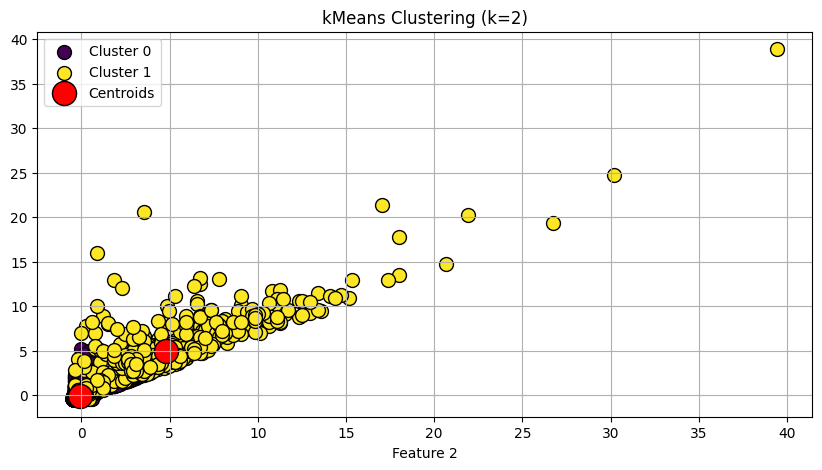

Silhouette Score for 3 clusters: 0.806628439167005
Inertia for 3 clusters: 172083.34669516335
Distortion for 3 clusters: 5.550359524421339


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\3344266788.py:86: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', n_clusters)


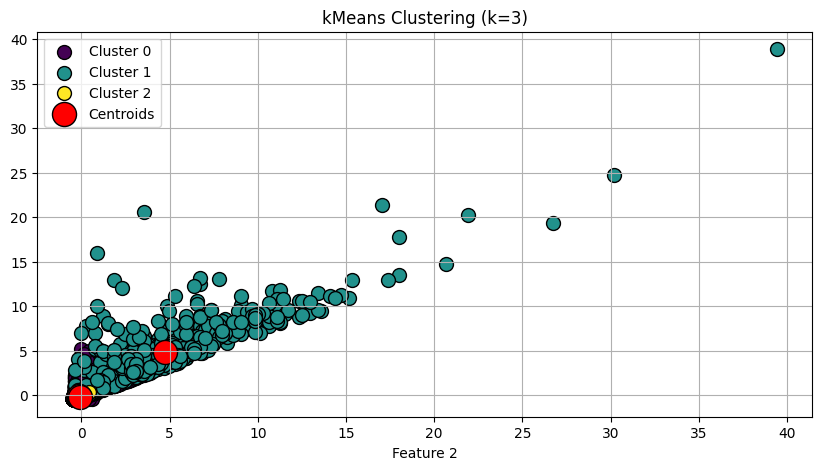

Silhouette Score for 4 clusters: 0.3396387965462503
Inertia for 4 clusters: 157600.4446039858
Distortion for 4 clusters: 5.083229409236656


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\3344266788.py:86: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', n_clusters)


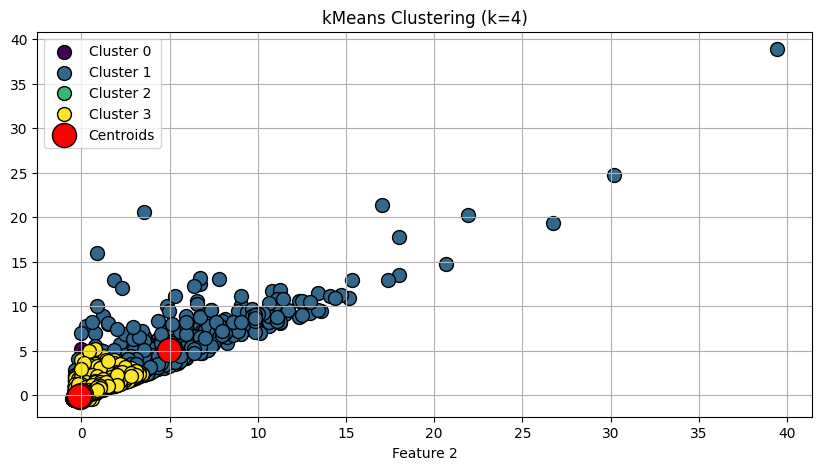

Silhouette Score for 5 clusters: 0.34557713679597607
Inertia for 5 clusters: 135347.45253944283
Distortion for 5 clusters: 4.3654835679083694


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\3344266788.py:86: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', n_clusters)


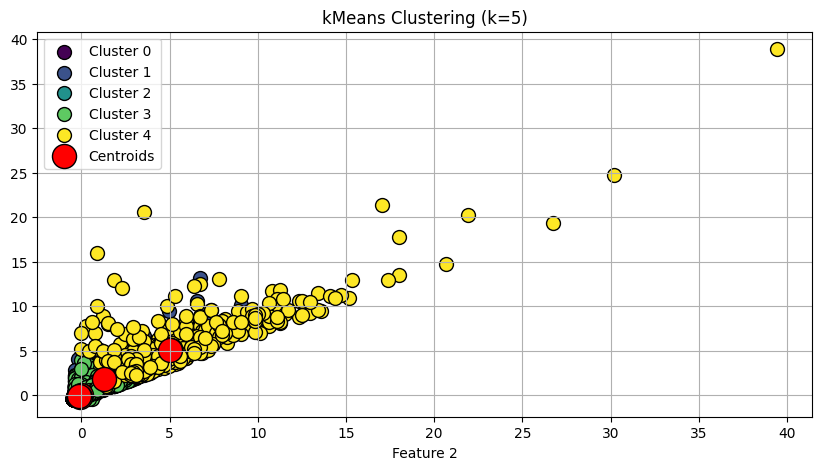

Silhouette Score for 6 clusters: 0.3464692840982767
Inertia for 6 clusters: 114781.75443010556
Distortion for 6 clusters: 3.70215954167488


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\3344266788.py:86: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', n_clusters)


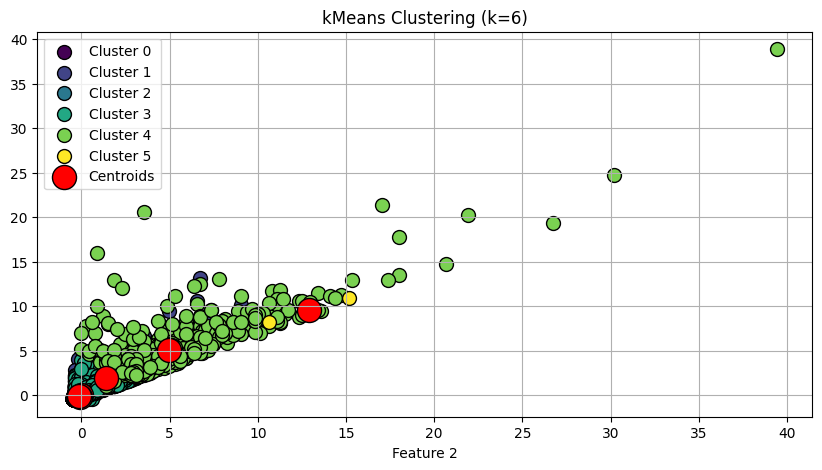

Silhouette Score for 7 clusters: 0.34587696884023794
Inertia for 7 clusters: 107776.74710825183
Distortion for 7 clusters: 3.4762207169479398


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\3344266788.py:86: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', n_clusters)


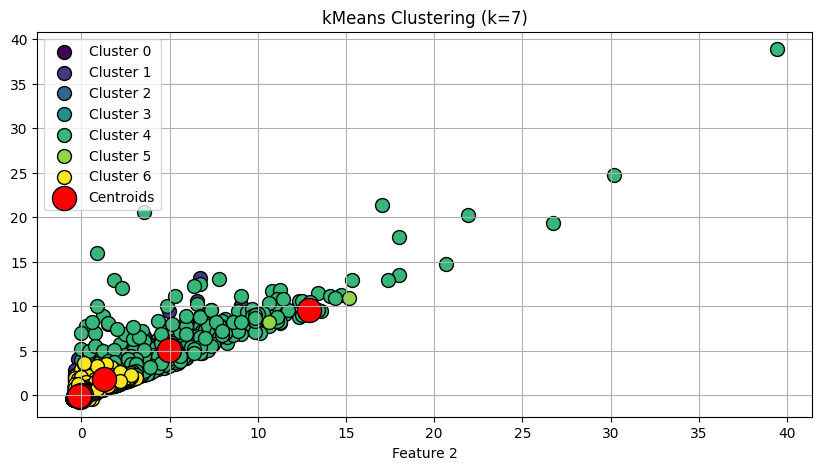

Silhouette Score for 8 clusters: 0.32309622944674177
Inertia for 8 clusters: 99440.30832088094
Distortion for 8 clusters: 3.207338031250173


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\3344266788.py:86: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', n_clusters)


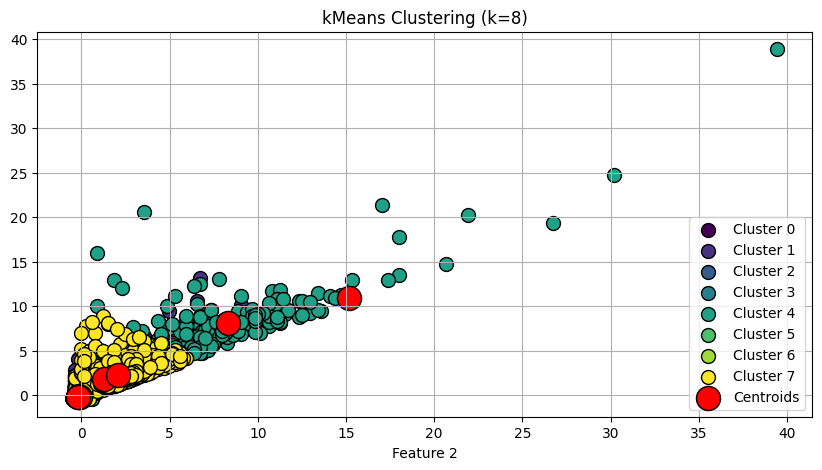

Silhouette Score for 9 clusters: 0.32544759684619107
Inertia for 9 clusters: 85524.00828072365
Distortion for 9 clusters: 2.7584830435014545


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\3344266788.py:86: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', n_clusters)


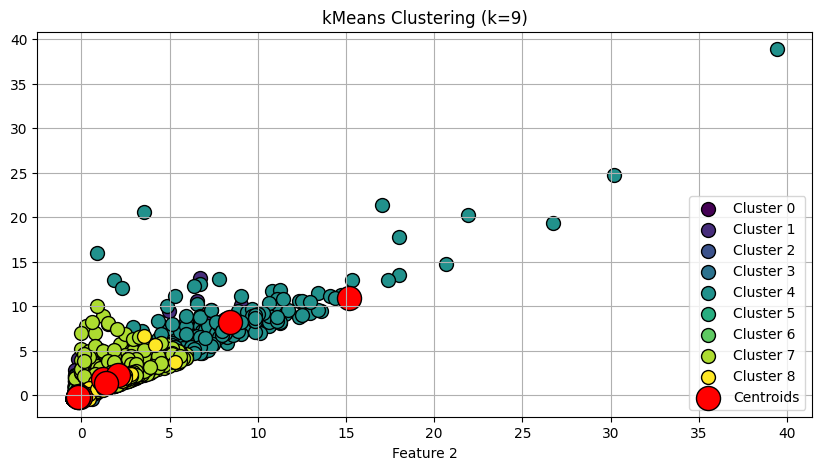

Silhouette Score for 10 clusters: 0.4607284410292848
Inertia for 10 clusters: 79012.33307768212
Distortion for 10 clusters: 2.5484561049438663


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\3344266788.py:86: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', n_clusters)


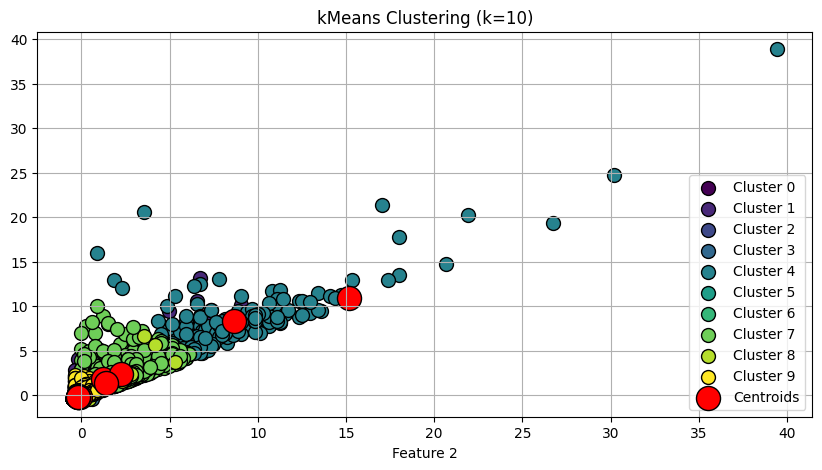


Suggested number of clusters based on Silhouette Score: 2


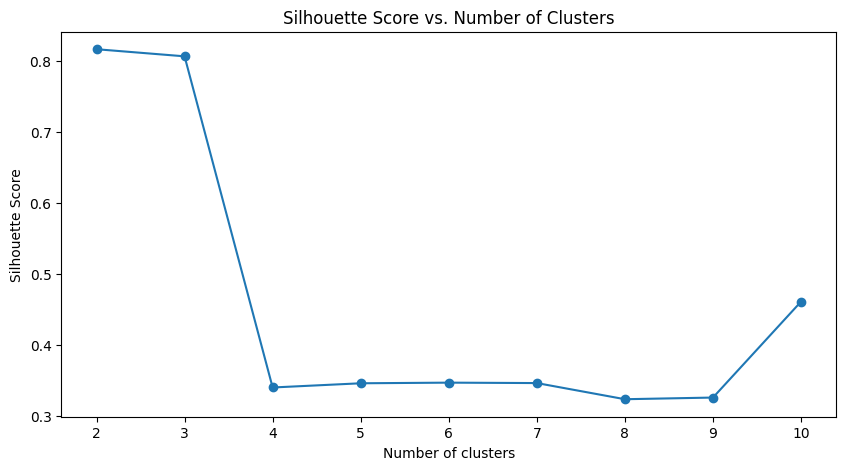

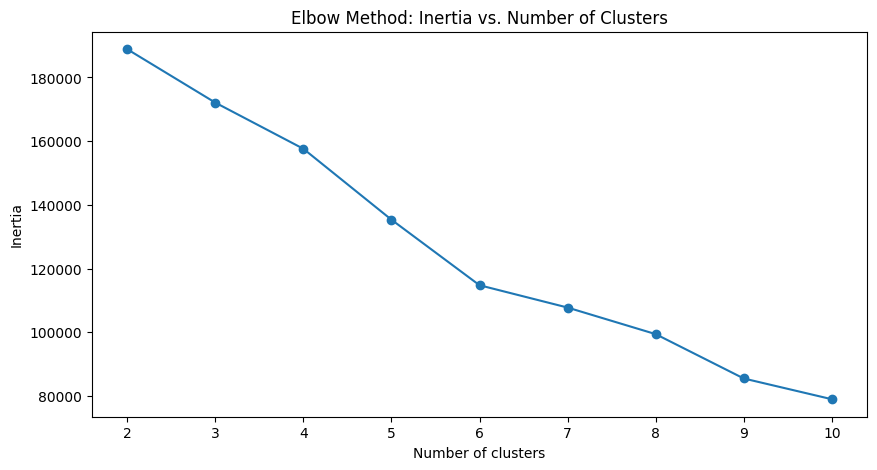

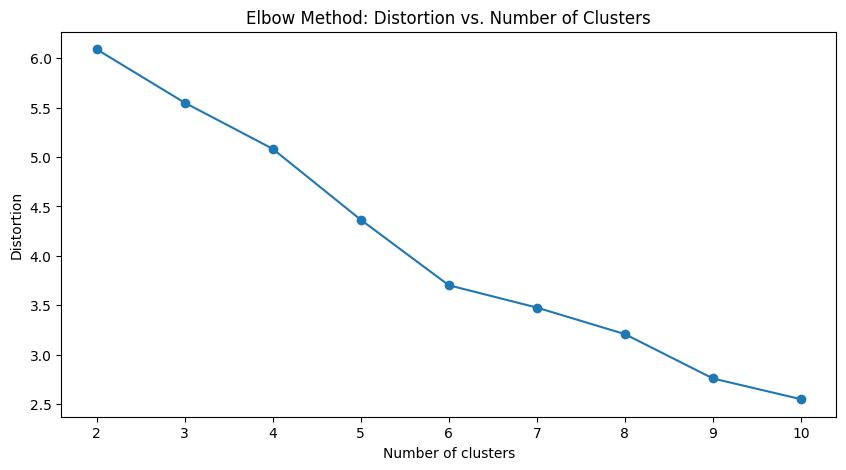

In [ ]:
num_col = ['USERS','ITEMS VIEWED','ITEMS ADDED TO CART',
           'ITEMS CHECKED OUT','ITEMS PURCHASED','ITEM REVENUE']
cat_col = ['best_category','best_subcategory']
df_m1, df_m1_score = cluster_kMeans(df_used, num_col, cat_col,
                   n_clus_start=2, n_clus_end=10, random_state=88)

In [ ]:
display(df_m1_score)
display(df_m1)

Inertia  Distortion  SilhouetteScore
n_clusters                                            
2           188849.832045    6.091144         0.816643
3           172083.346695    5.550360         0.806628
4           157600.444604    5.083229         0.339639
5           135347.452539    4.365484         0.345577
6           114781.754430    3.702160         0.346469
7           107776.747108    3.476221         0.345877
8            99440.308321    3.207338         0.323096
9            85524.008281    2.758483         0.325448
10           79012.333078    2.548456         0.460728

WEEK PLATFORM    CATEGORY 1          CATEGORY 2  \
0      2024-01-22  WEBSITE        CARDIO           TREADMILL   
1      2024-01-22  WEBSITE        CARDIO           TREADMILL   
2      2024-01-22  WEBSITE        CARDIO           TREADMILL   
3      2024-01-22  WEBSITE        CARDIO           TREADMILL   
4      2024-01-22  WEBSITE  FREE WEIGHTS        BARBELL SETS   
...           ...      ...           ...                 ...   
30999  2024-12-30   SHOPEE        CARDIO       EXERCISE BIKE   
31000  2024-12-30   SHOPEE        CARDIO       EXERCISE BIKE   
31001  2024-12-30   SHOPEE        CARDIO           TREADMILL   
31002  2024-12-30   SHOPEE        CARDIO       EXERCISE BIKE   
31003  2024-12-30   SHOPEE      STRENGTH  FUNCTIONAL TRAINER   

                                           ITEM NAME            brand   model  \
0                   Sole F85 Treadmill - Touch Panel     SOLE FITNESS     F85   
1                             Xterra TR150 Treadmill   XTERRA FITNESS   TR150   
2                                 Sole F63 Treadmill     SOLE FITNESS     F63   
3                             Xterra TR180 Treadmill   XTERRA FITNESS   TR180   
4                                 Barbell Set - 20kg              NaN     NaN   
...                                              ...              ...     ...   
30999              Xterra R15 Recumbent Exerice Bike   XTERRA FITNESS     R15   
31000           SOLE SB1200 Spin Bike - Touch Screen     SOLE FITNESS  SB1200   
31001                Sole F89 Treadmill Touch Screen     SOLE FITNESS     F89   
31002        Sole LCB Upright Bike With Touch Screen     SOLE FITNESS     LCB   
31003  Inspire SSFT Multi-purpose Functional Trainer  INSPIRE FITNESS    SSFT   

                     equipment            remarks  USERS  ...  \
0                    Treadmill        Touch Panel     49  ...   
1                    Treadmill                NaN     56  ...   
2                    Treadmill                NaN     36  ...   
3                    Treadmill                NaN     30  ...   
4                  Barbell Set               20kg     32  ...   
...                        ...                ...    ...  ...   
30999  Recumbent Exercise Bike                NaN      1  ...   
31000                Spin Bike       Touch Screen      1  ...   
31001                Treadmill       Touch Screen      1  ...   
31002             Upright Bike  With Touch Screen      1  ...   
31003       Functional Trainer      Multi-purpose      2  ...   

       chkout_abandonment_rate  cluster_2  cluster_3  cluster_4  cluster_5  \
0                          0.0          1          1          1          1   
1                          0.0          1          1          1          4   
2                          0.0          1          1          1          4   
3                          0.0          1          1          1          4   
4                          0.0          1          1          1          4   
...                        ...        ...        ...        ...        ...   
30999                      0.0          0          0          0          0   
31000                      0.0          0          0          0          0   
31001                      0.0          0          0          0          0   
31002                      0.0          0          0          0          0   
31003                      0.0          0          0          3          3   

      cluster_6 cluster_7  cluster_8  cluster_9  cluster_10  
0             1         1          1          1           1  
1             4         4          4          4           4  
2             4         4          4          4           4  
3             4         4          7          7           7  
4             4         4          7          7           7  
...         ...       ...        ...        ...         ...  
30999         0         0          0          0           0  
31000         0         0          0          0          

In [ ]:
df_m1.to_csv('cluster_df/df_m1.csv')
df_m1.to_pickle('cluster_df/df_m1.pkl')

In [ ]:
display(df_m1['cluster_2'].value_counts())
display(df_m1['cluster_3'].value_counts())
display(df_m1['cluster_4'].value_counts())
display(df_m1['cluster_5'].value_counts())

cluster_2
0    30355
1      649
Name: count, dtype: int64

cluster_3
0    30329
1      672
2        3
Name: count, dtype: int64

cluster_4
3    21007
0     9394
1      600
2        3
Name: count, dtype: int64

cluster_5
3    20938
0     9337
4      641
1       85
2        3
Name: count, dtype: int64

## Model 2 - DBSCAN - Revenue > 0

Running DBSCAN with eps=0.10 and min_samples=5
Silhouette Score for eps=0.10 and min_samples=5: 0.7597160024263194


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


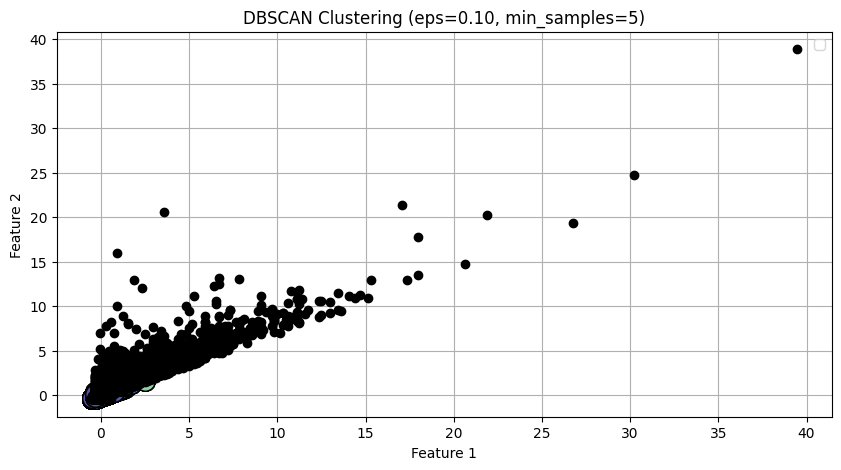

Running DBSCAN with eps=0.10 and min_samples=6
Silhouette Score for eps=0.10 and min_samples=6: 0.7430905700573002


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


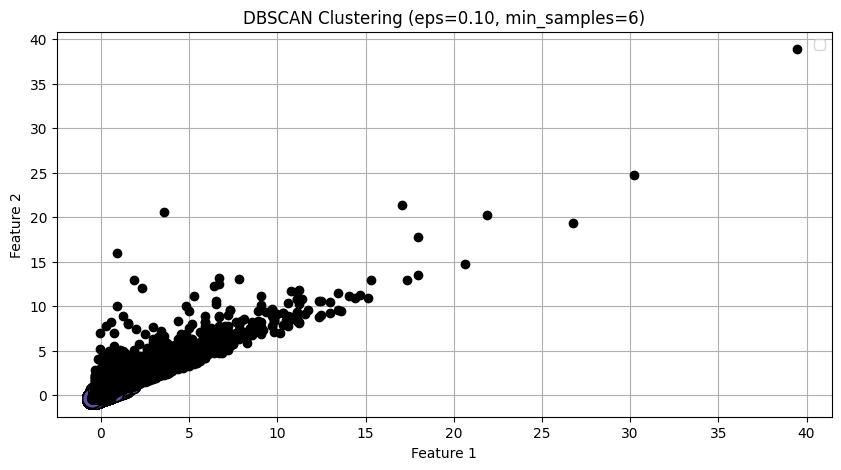

Running DBSCAN with eps=0.10 and min_samples=7
Silhouette Score for eps=0.10 and min_samples=7: 0.7279341448157738


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


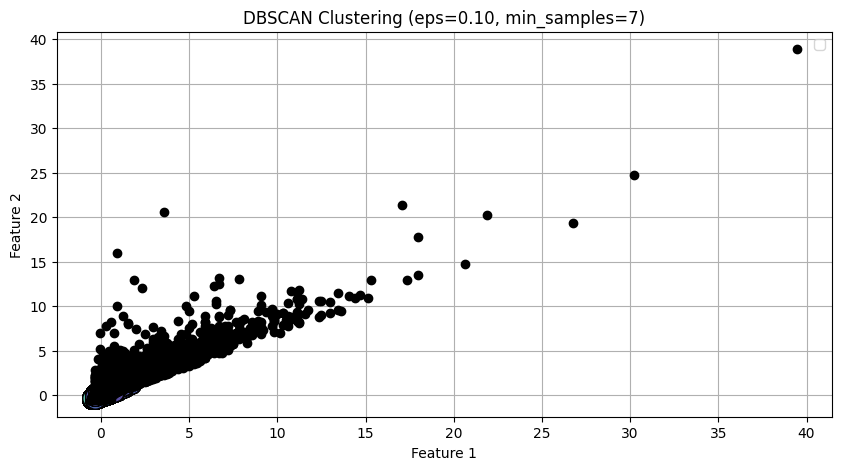

Running DBSCAN with eps=0.10 and min_samples=8
Silhouette Score for eps=0.10 and min_samples=8: 0.7114541341691152


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


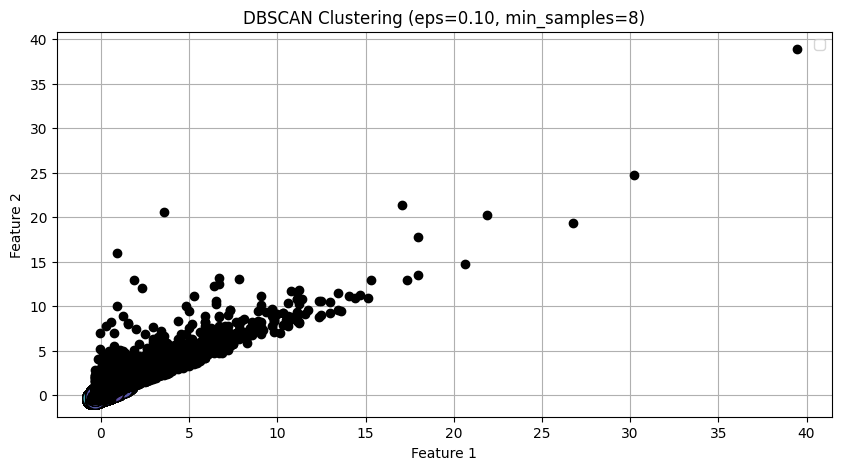

Running DBSCAN with eps=0.10 and min_samples=9
Silhouette Score for eps=0.10 and min_samples=9: 0.6959823338814135


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


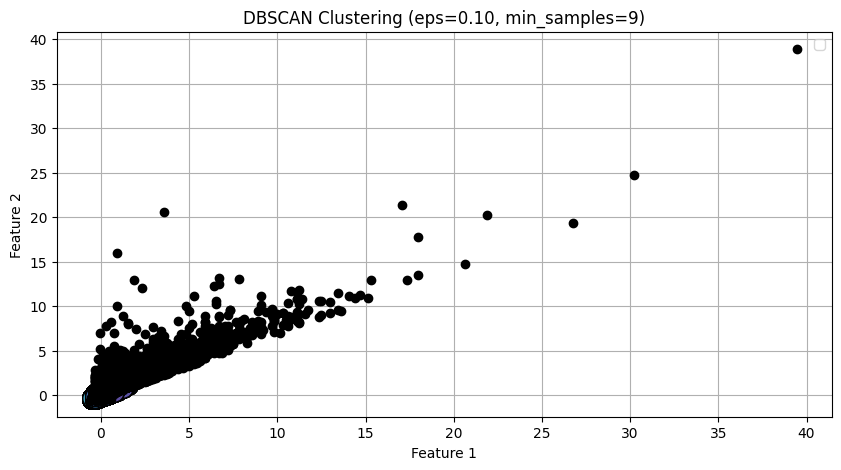

Running DBSCAN with eps=0.10 and min_samples=10
Silhouette Score for eps=0.10 and min_samples=10: 0.6894978930169763


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


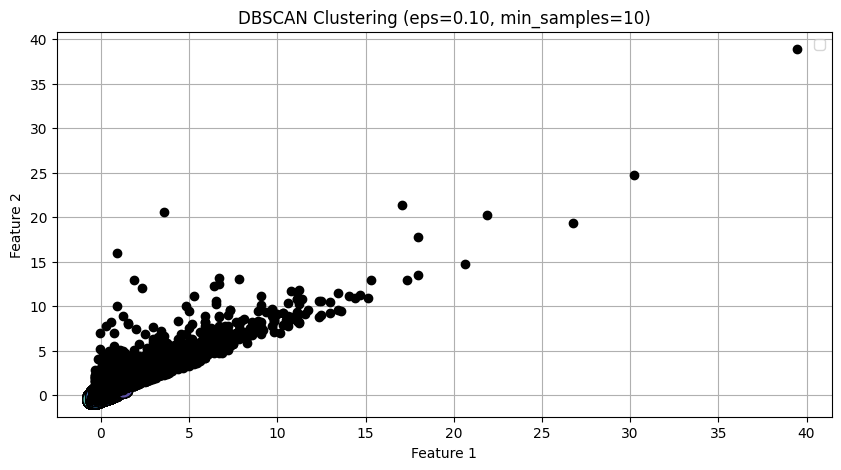

Running DBSCAN with eps=0.10 and min_samples=11
Silhouette Score for eps=0.10 and min_samples=11: 0.6846942432285568


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


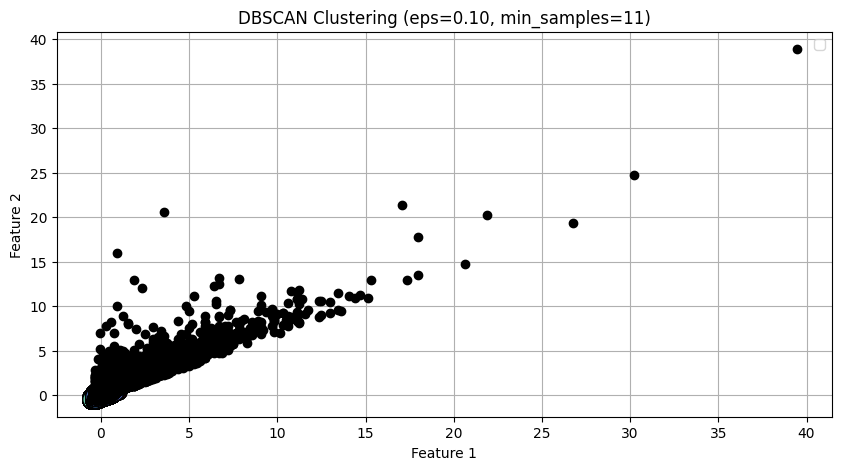

Running DBSCAN with eps=0.10 and min_samples=12
Silhouette Score for eps=0.10 and min_samples=12: 0.674753982170967


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


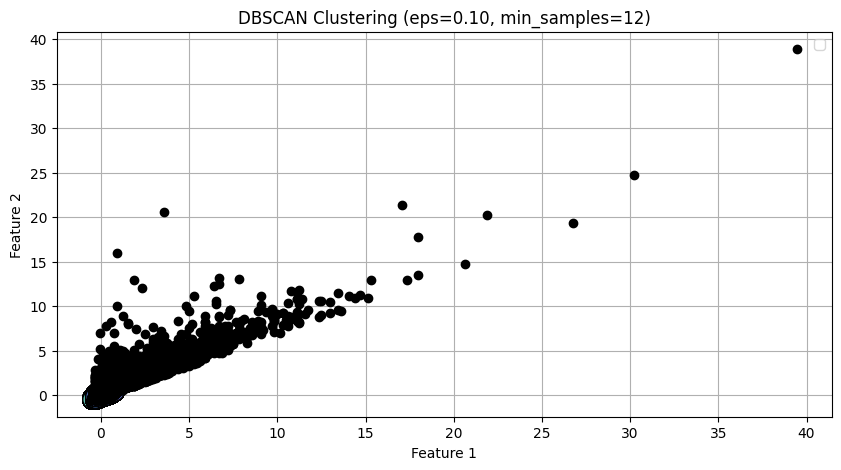

Running DBSCAN with eps=0.10 and min_samples=13
Silhouette Score for eps=0.10 and min_samples=13: 0.66784683407525


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


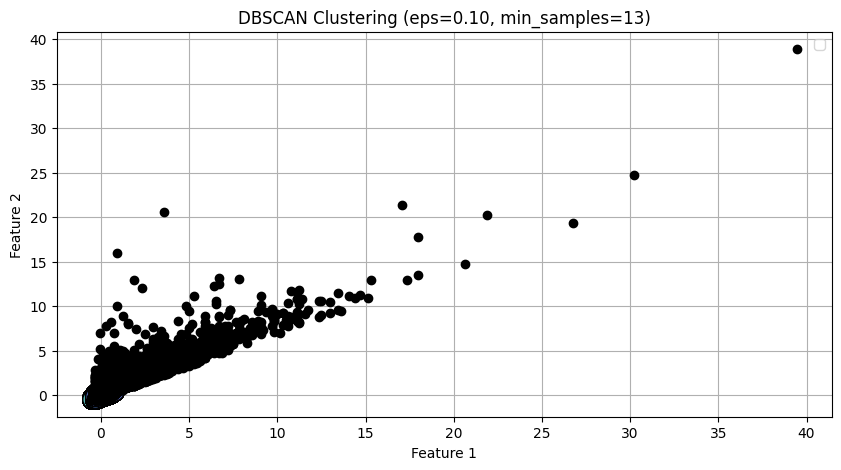

Running DBSCAN with eps=0.10 and min_samples=14
Silhouette Score for eps=0.10 and min_samples=14: 0.6615933245041188


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


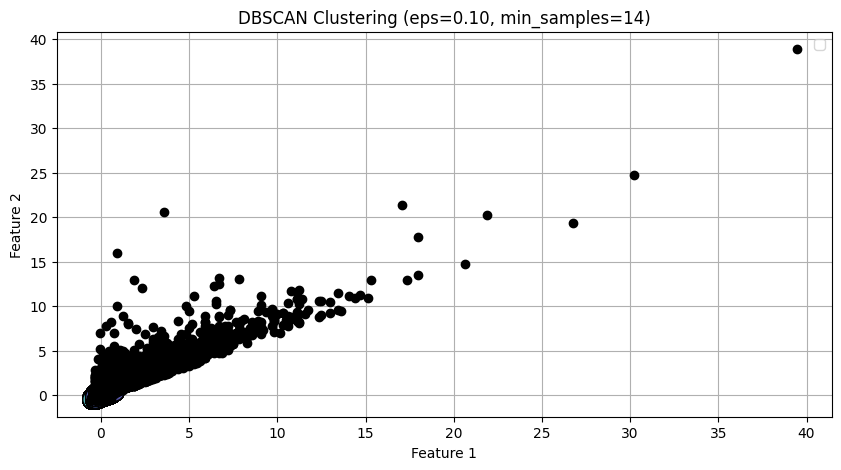

Running DBSCAN with eps=0.10 and min_samples=15
Silhouette Score for eps=0.10 and min_samples=15: 0.6553984372842118


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


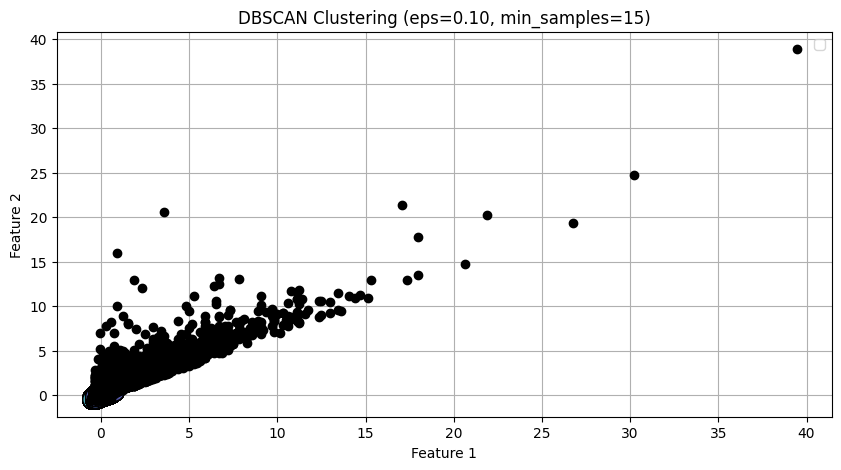

Running DBSCAN with eps=0.20 and min_samples=5
Silhouette Score for eps=0.20 and min_samples=5: 0.1845489844889947


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


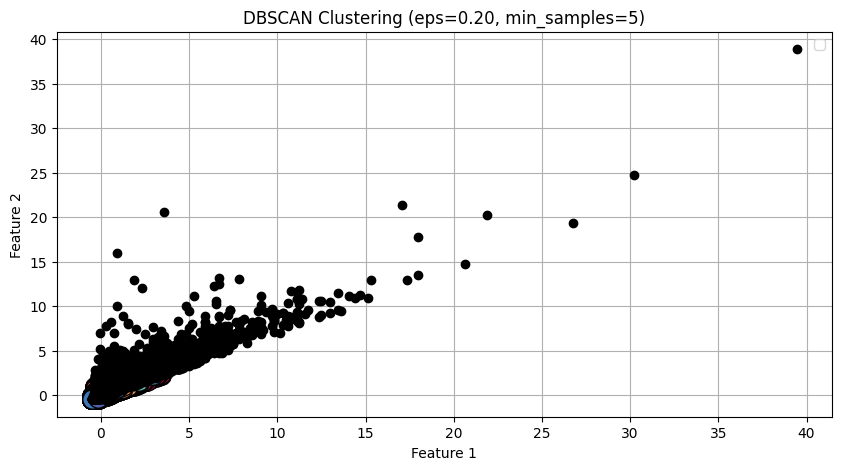

Running DBSCAN with eps=0.20 and min_samples=6
Silhouette Score for eps=0.20 and min_samples=6: 0.2062495473877895


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


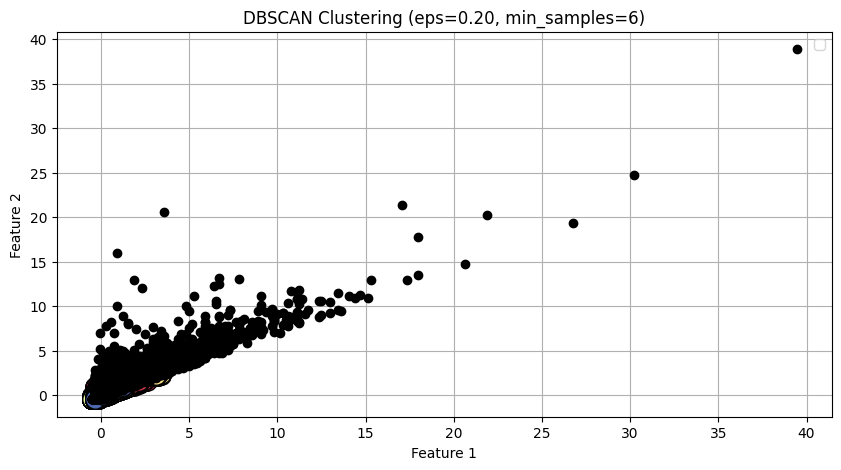

Running DBSCAN with eps=0.20 and min_samples=7
Silhouette Score for eps=0.20 and min_samples=7: 0.2092848621116942


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


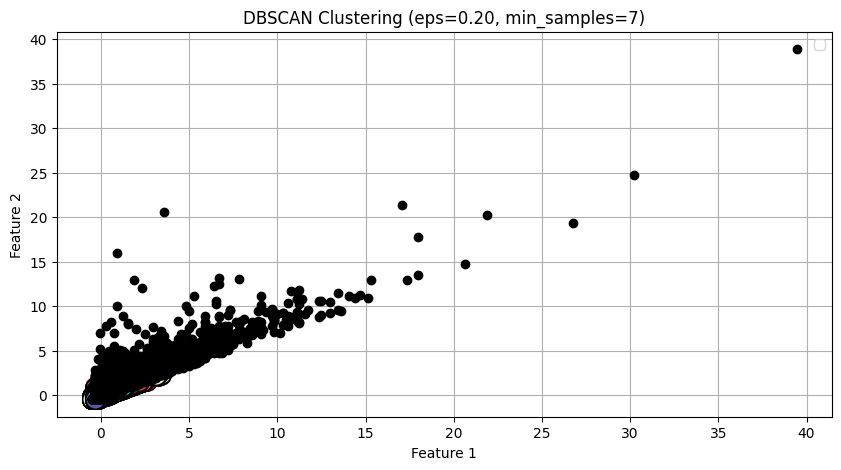

Running DBSCAN with eps=0.20 and min_samples=8
Silhouette Score for eps=0.20 and min_samples=8: 0.2012641334661553


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


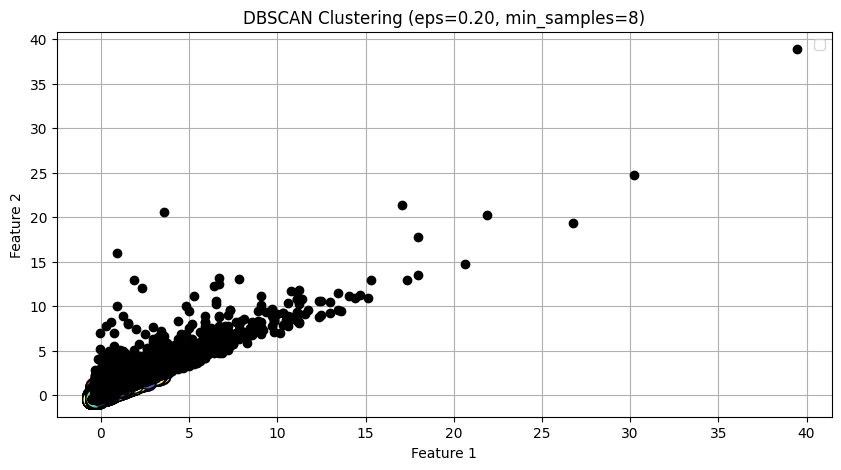

Running DBSCAN with eps=0.20 and min_samples=9
Silhouette Score for eps=0.20 and min_samples=9: 0.2014722590007791


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


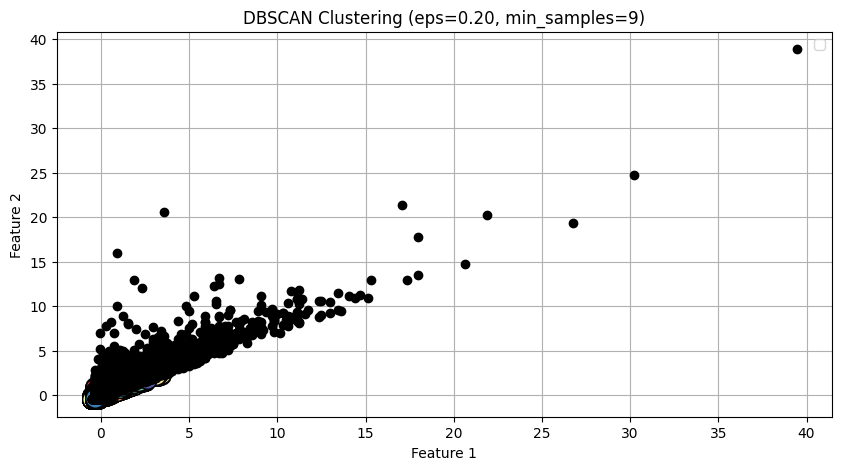

Running DBSCAN with eps=0.20 and min_samples=10
Silhouette Score for eps=0.20 and min_samples=10: 0.19658959208468402


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


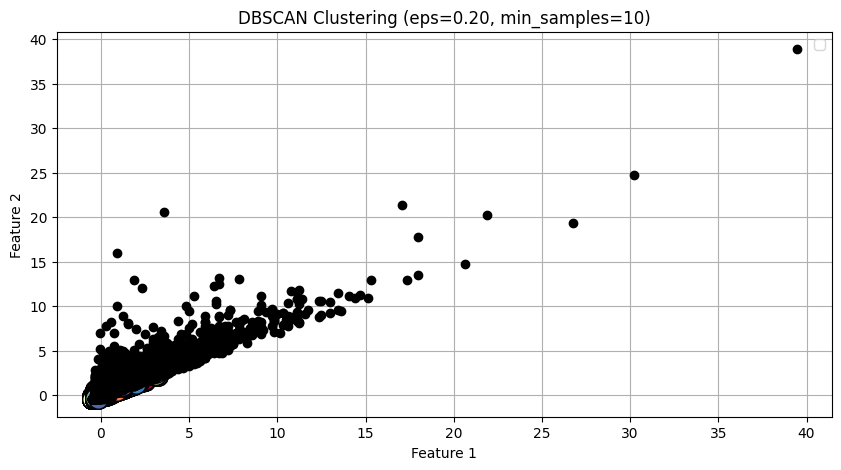

Running DBSCAN with eps=0.20 and min_samples=11
Silhouette Score for eps=0.20 and min_samples=11: 0.19550385070455834


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


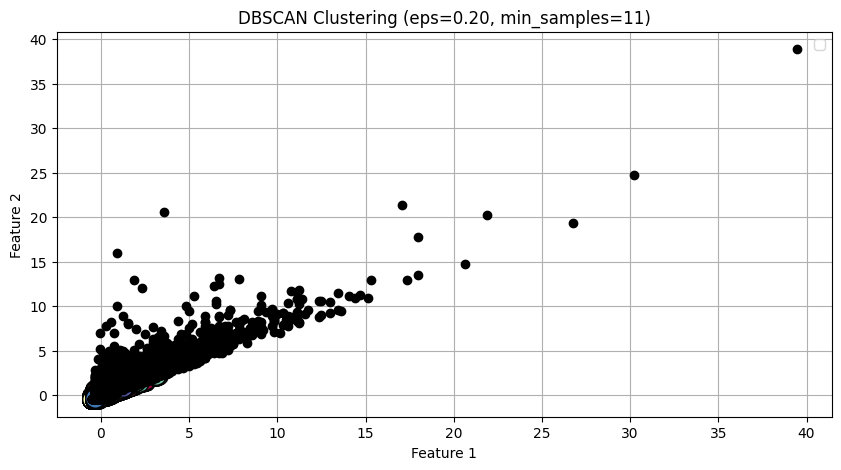

Running DBSCAN with eps=0.20 and min_samples=12
Silhouette Score for eps=0.20 and min_samples=12: 0.20424141247101935


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


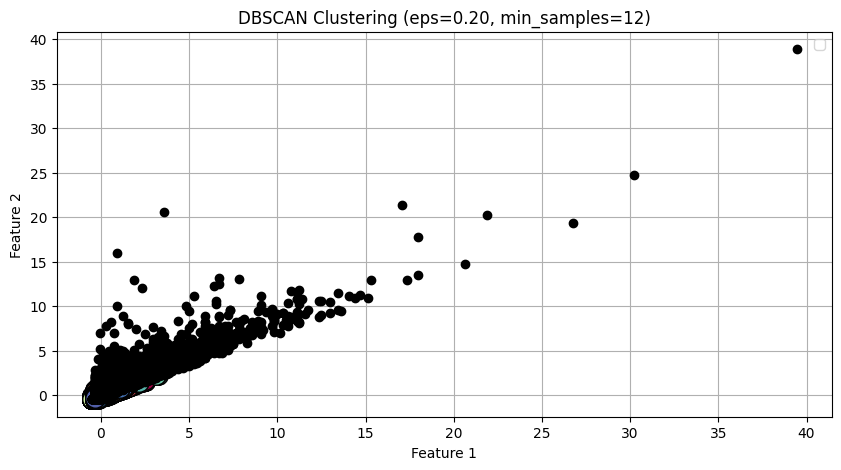

Running DBSCAN with eps=0.20 and min_samples=13
Silhouette Score for eps=0.20 and min_samples=13: 0.2074341403005279


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


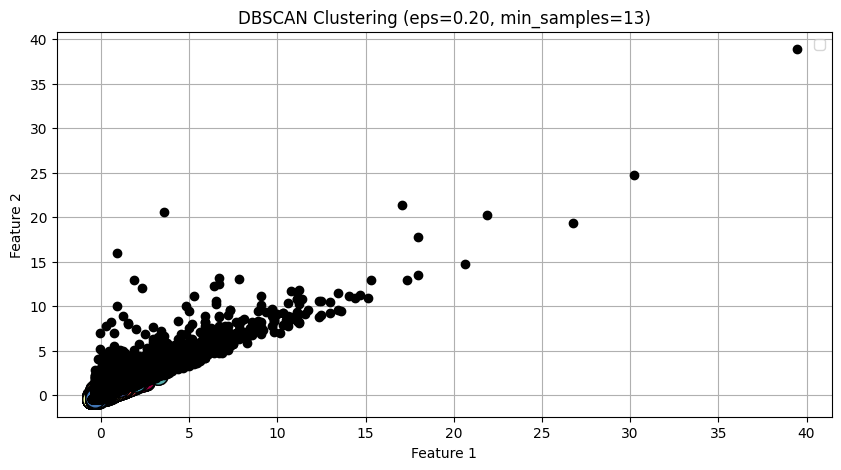

Running DBSCAN with eps=0.20 and min_samples=14
Silhouette Score for eps=0.20 and min_samples=14: 0.21121739832043182


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


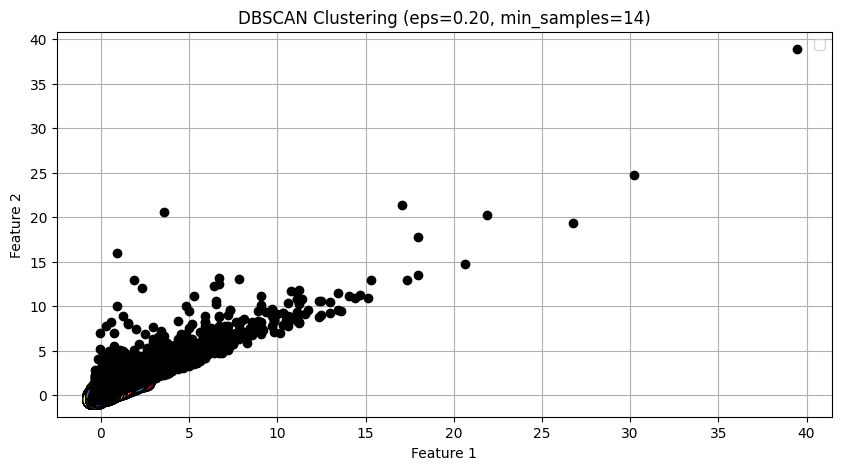

Running DBSCAN with eps=0.20 and min_samples=15
Silhouette Score for eps=0.20 and min_samples=15: 0.21034893446751948


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


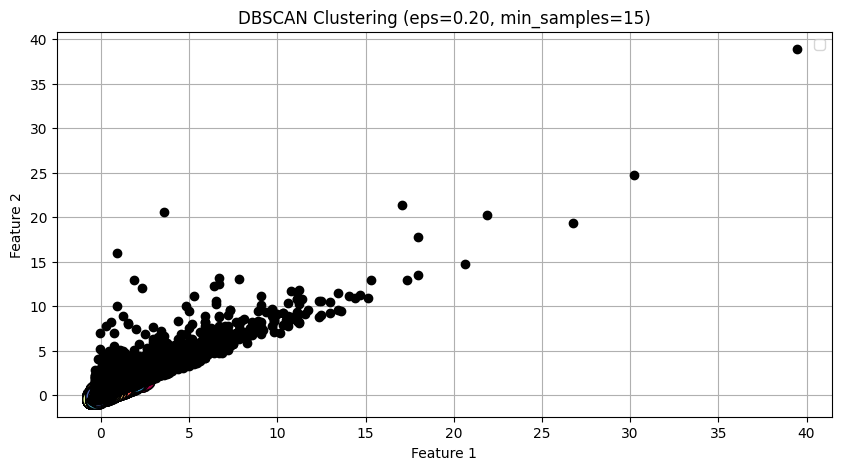

Running DBSCAN with eps=0.30 and min_samples=5
Silhouette Score for eps=0.30 and min_samples=5: 0.23860174486459818


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


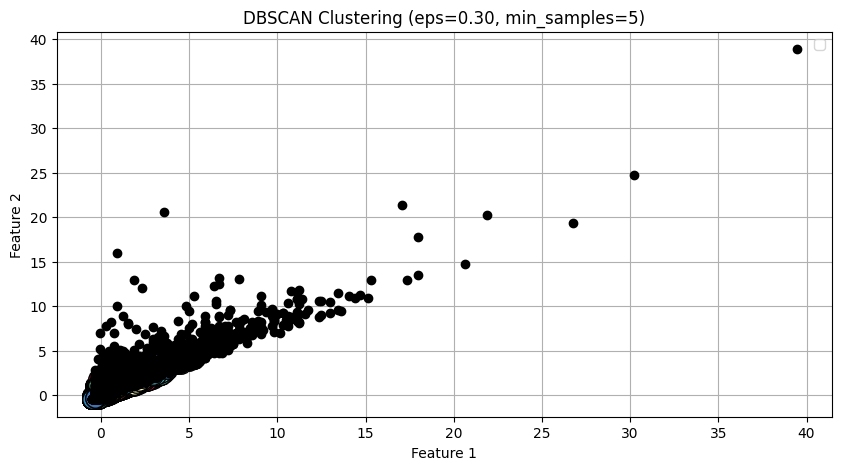

Running DBSCAN with eps=0.30 and min_samples=6
Silhouette Score for eps=0.30 and min_samples=6: 0.22007236380418238


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


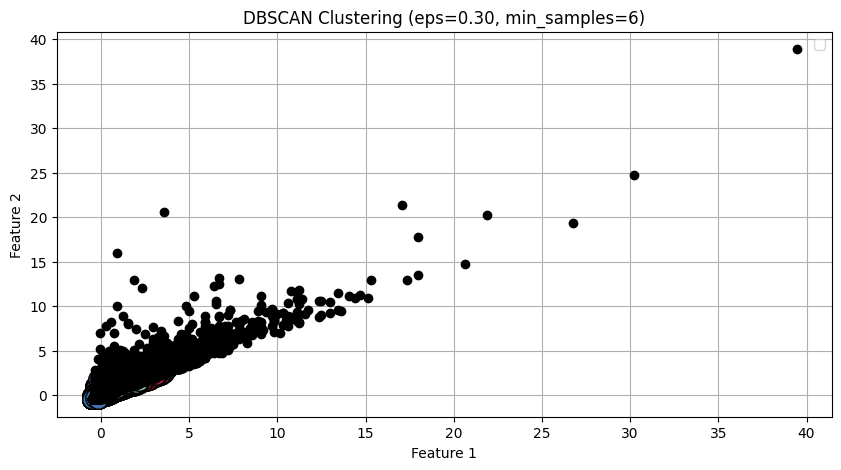

Running DBSCAN with eps=0.30 and min_samples=7
Silhouette Score for eps=0.30 and min_samples=7: 0.2153797715402473


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


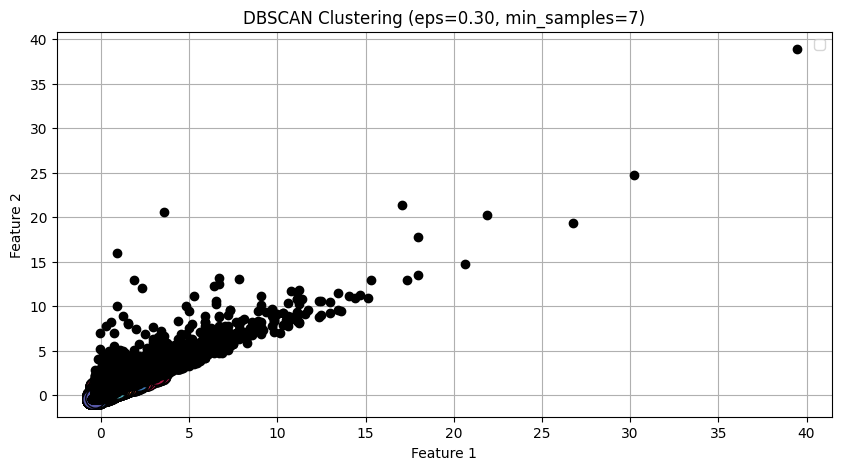

Running DBSCAN with eps=0.30 and min_samples=8
Silhouette Score for eps=0.30 and min_samples=8: 0.2142072673818026


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


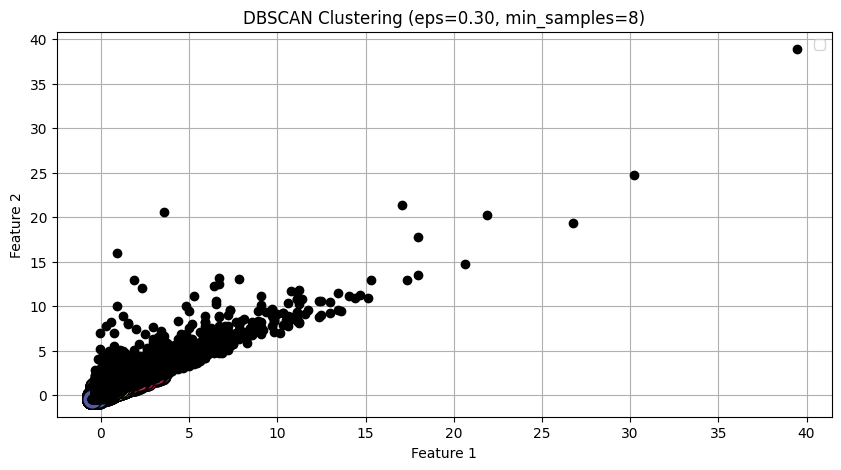

Running DBSCAN with eps=0.30 and min_samples=9
Silhouette Score for eps=0.30 and min_samples=9: 0.2232843143228092


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


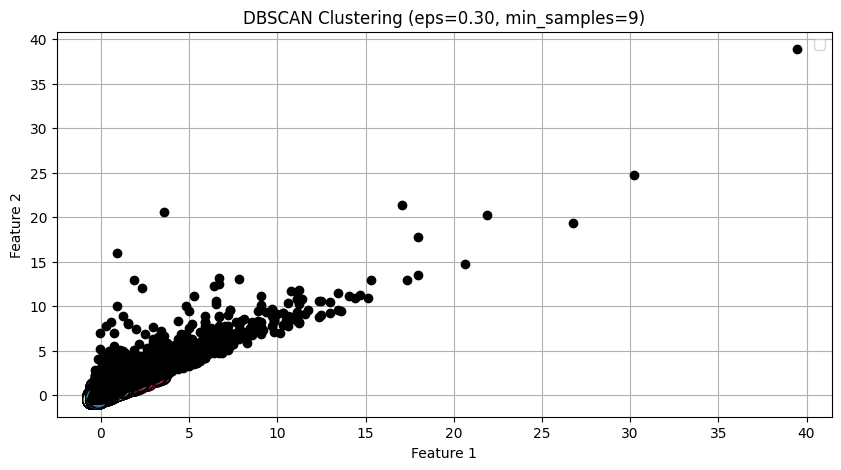

Running DBSCAN with eps=0.30 and min_samples=10
Silhouette Score for eps=0.30 and min_samples=10: 0.21638000203548508


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


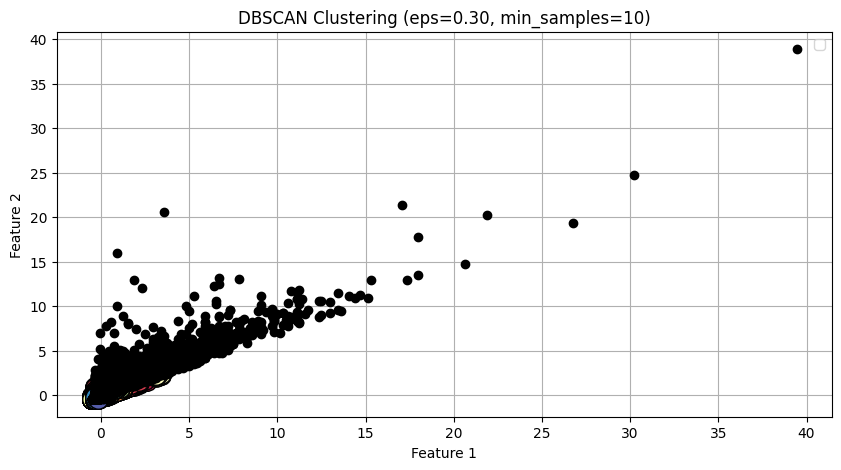

Running DBSCAN with eps=0.30 and min_samples=11
Silhouette Score for eps=0.30 and min_samples=11: 0.22097750258016804


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


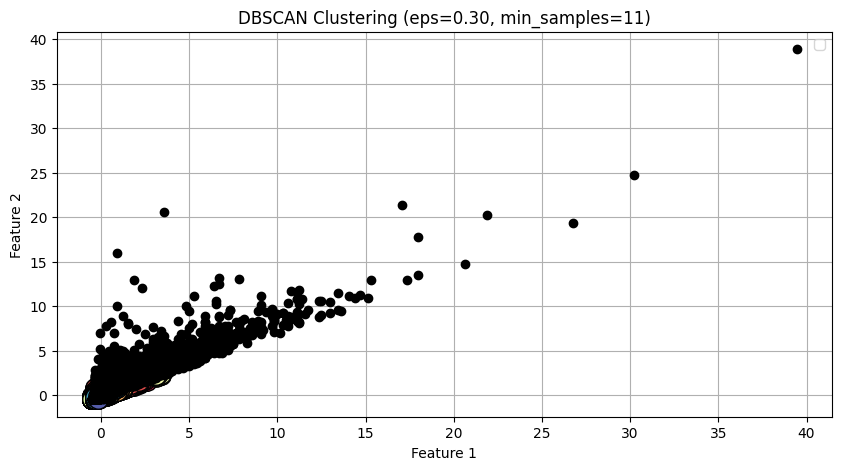

Running DBSCAN with eps=0.30 and min_samples=12
Silhouette Score for eps=0.30 and min_samples=12: 0.22441576400429172


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


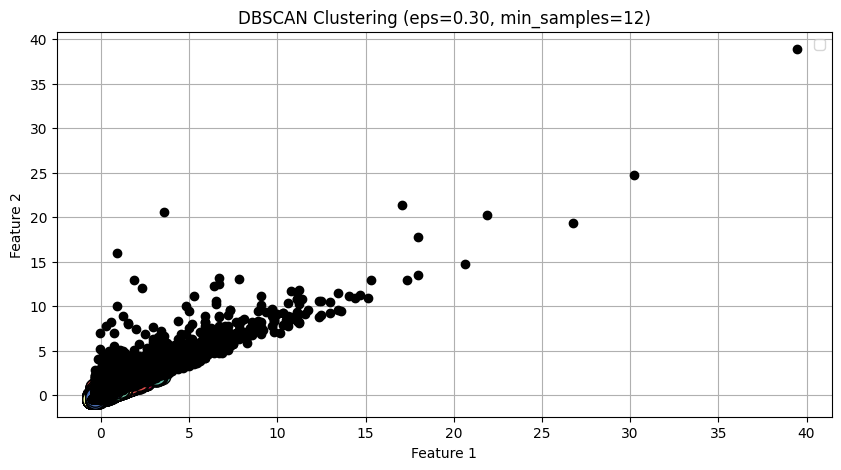

Running DBSCAN with eps=0.30 and min_samples=13
Silhouette Score for eps=0.30 and min_samples=13: 0.22713828293765714


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


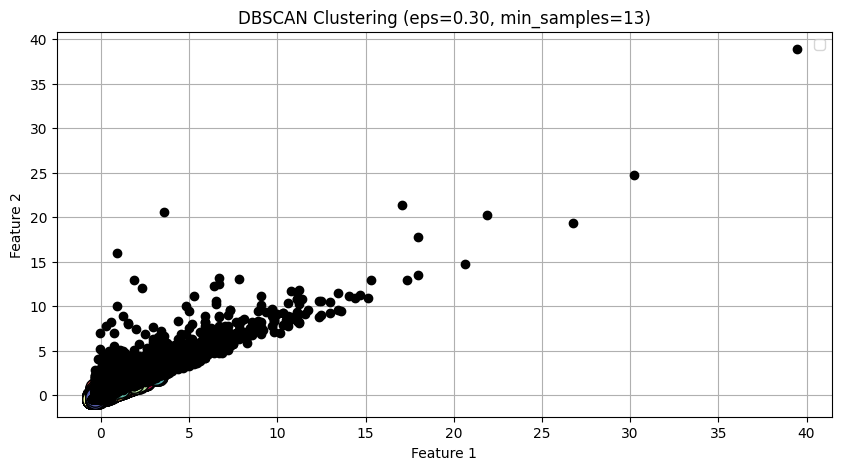

Running DBSCAN with eps=0.30 and min_samples=14
Silhouette Score for eps=0.30 and min_samples=14: 0.22077625379490592


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


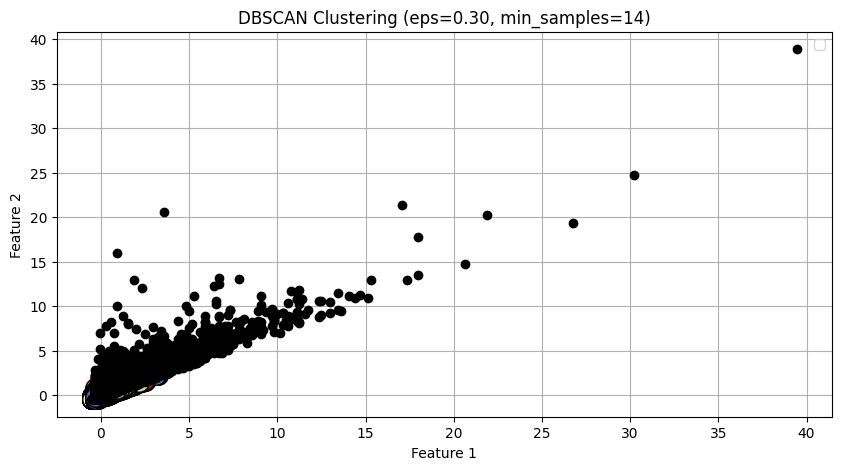

Running DBSCAN with eps=0.30 and min_samples=15
Silhouette Score for eps=0.30 and min_samples=15: 0.22262448398007612


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


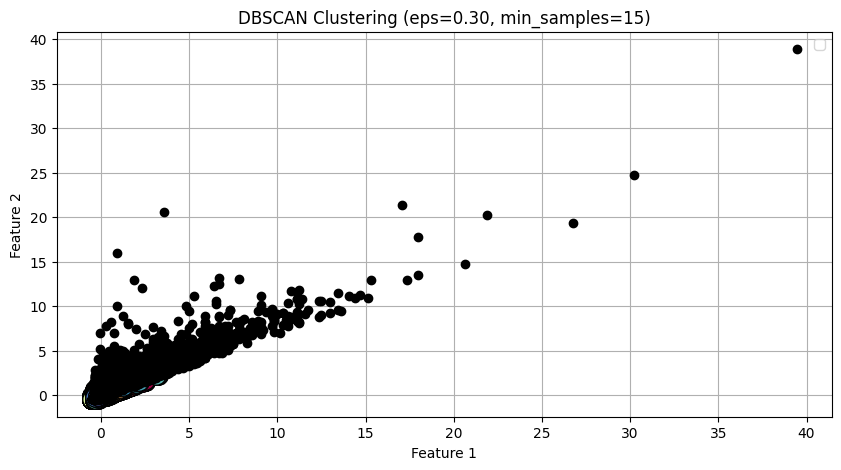

Running DBSCAN with eps=0.40 and min_samples=5
Silhouette Score for eps=0.40 and min_samples=5: 0.3366486458132813


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


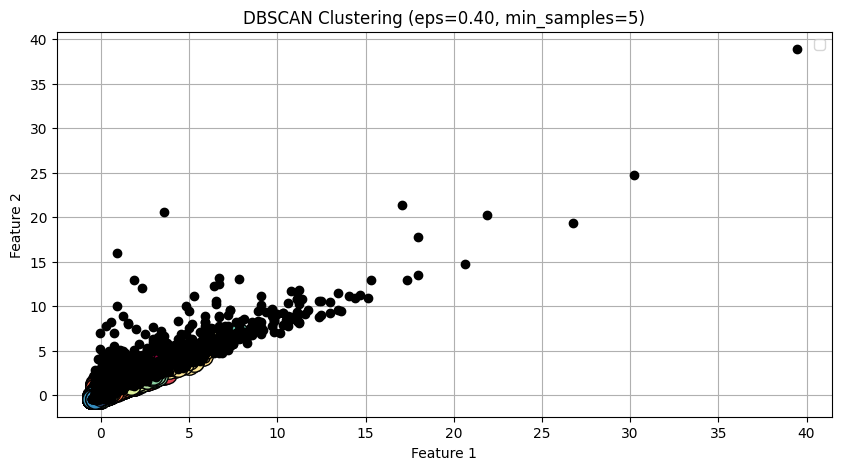

Running DBSCAN with eps=0.40 and min_samples=6
Silhouette Score for eps=0.40 and min_samples=6: 0.352104674607212


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


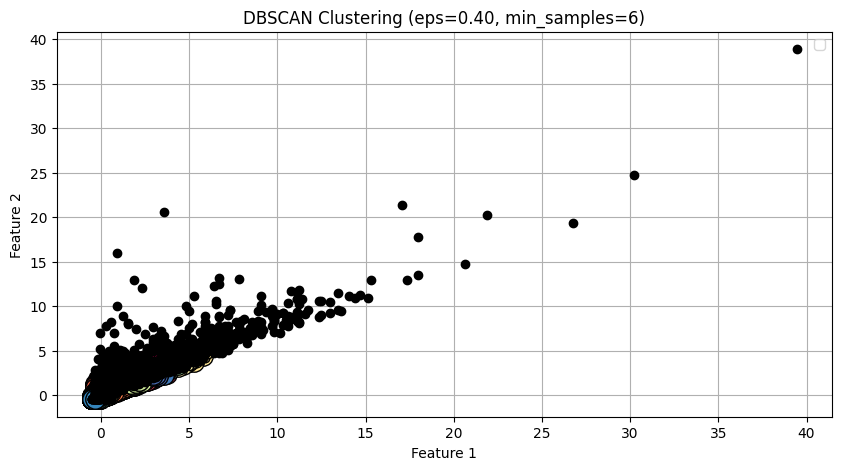

Running DBSCAN with eps=0.40 and min_samples=7
Silhouette Score for eps=0.40 and min_samples=7: 0.35278270880059787


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


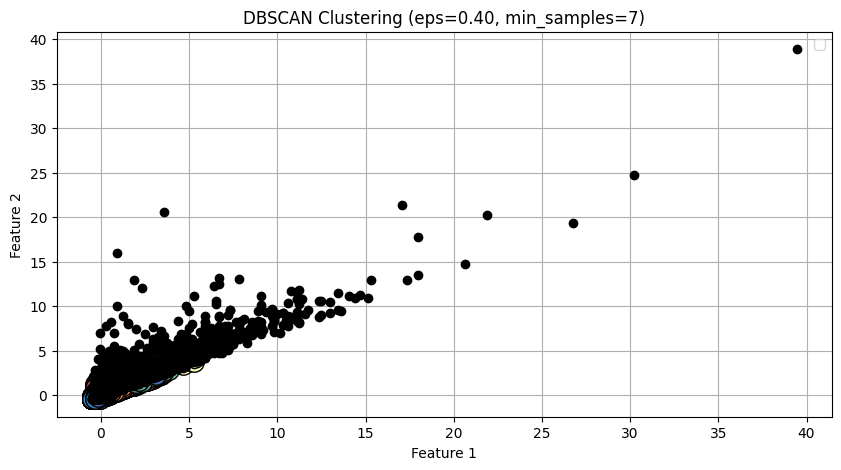

Running DBSCAN with eps=0.40 and min_samples=8
Silhouette Score for eps=0.40 and min_samples=8: 0.3525624916341027


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


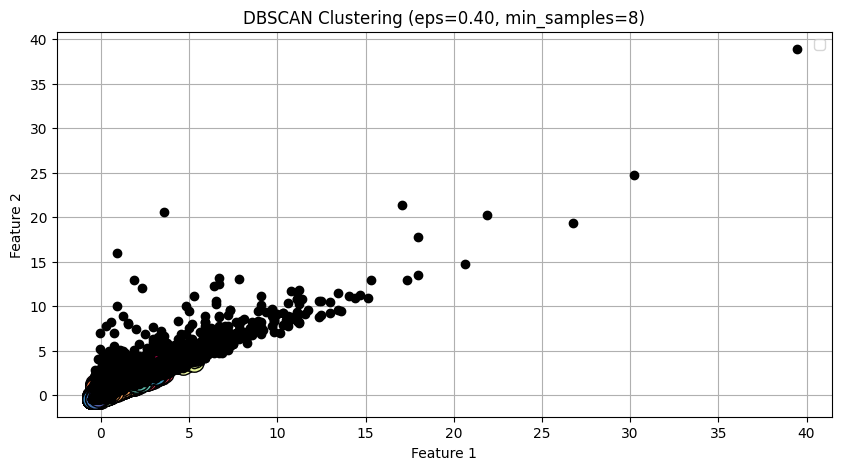

Running DBSCAN with eps=0.40 and min_samples=9
Silhouette Score for eps=0.40 and min_samples=9: 0.3528870795721127


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


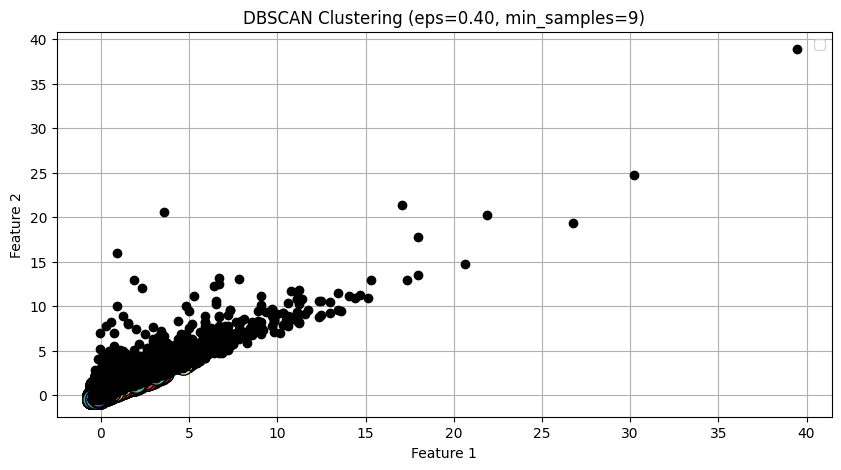

Running DBSCAN with eps=0.40 and min_samples=10
Silhouette Score for eps=0.40 and min_samples=10: 0.38610303182521133


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


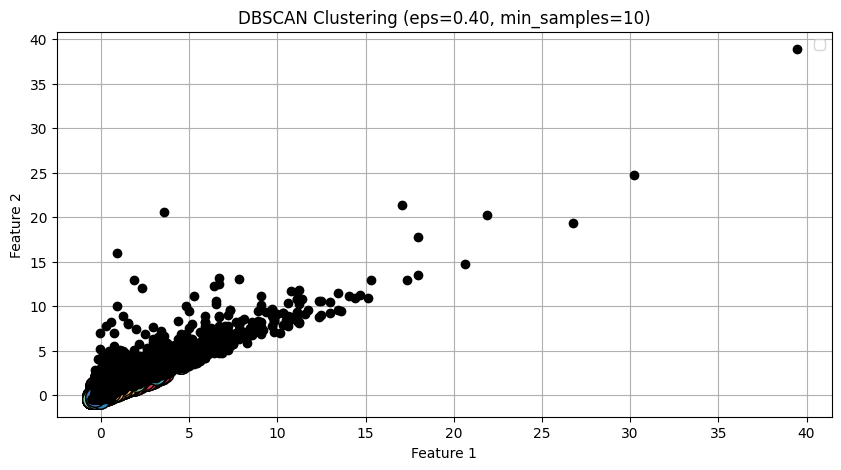

Running DBSCAN with eps=0.40 and min_samples=11
Silhouette Score for eps=0.40 and min_samples=11: 0.39506550345717145


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


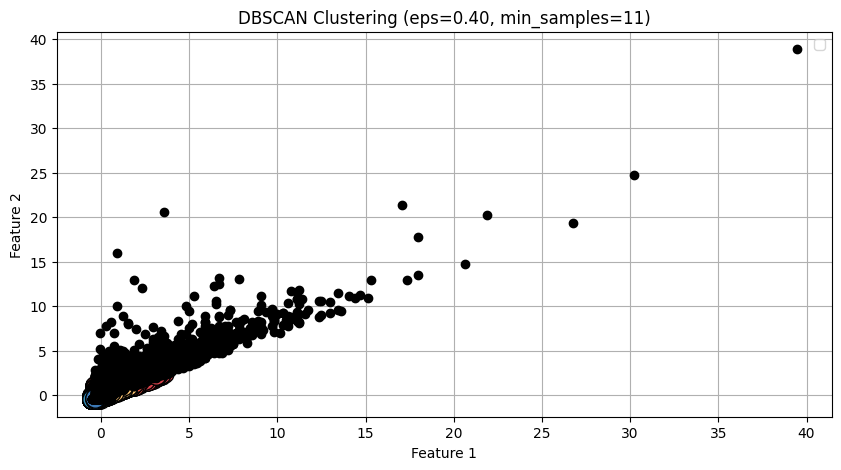

Running DBSCAN with eps=0.40 and min_samples=12
Silhouette Score for eps=0.40 and min_samples=12: 0.41109328448334537


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


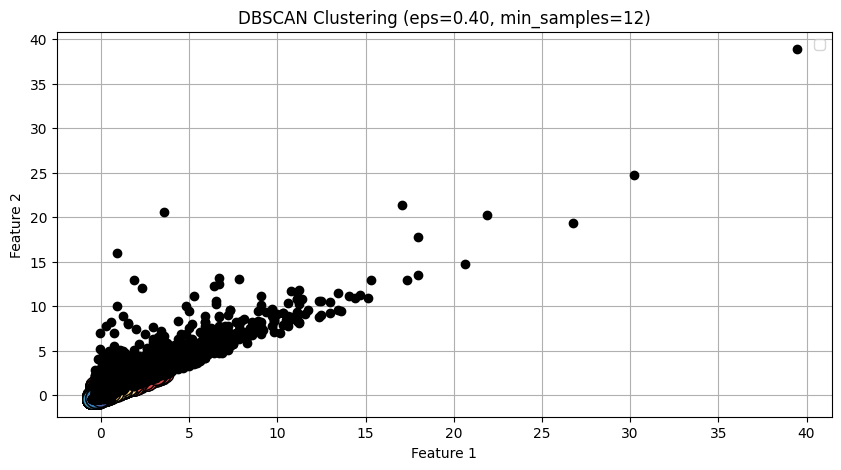

Running DBSCAN with eps=0.40 and min_samples=13
Silhouette Score for eps=0.40 and min_samples=13: 0.42889057733544705


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


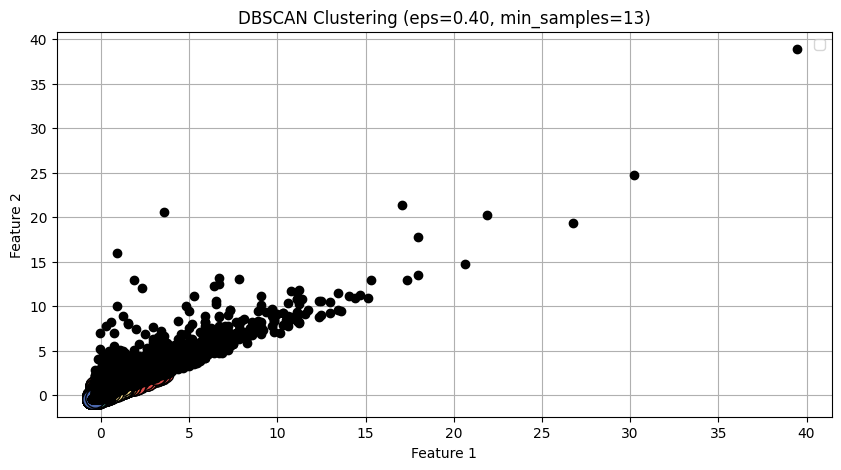

Running DBSCAN with eps=0.40 and min_samples=14
Silhouette Score for eps=0.40 and min_samples=14: 0.43905724551397146


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


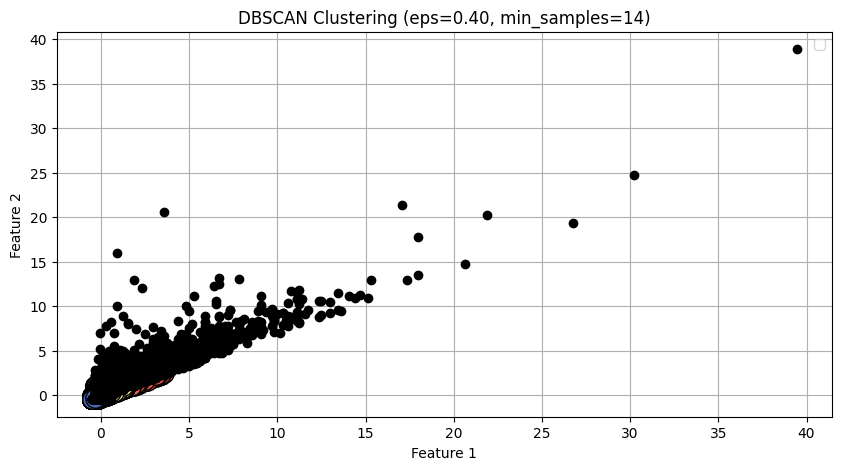

Running DBSCAN with eps=0.40 and min_samples=15
Silhouette Score for eps=0.40 and min_samples=15: 0.4496149595649994


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


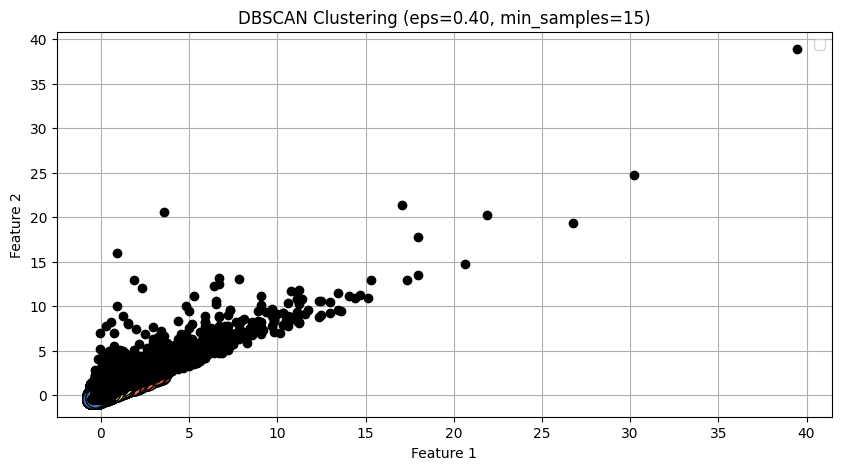

Running DBSCAN with eps=0.50 and min_samples=5
Silhouette Score for eps=0.50 and min_samples=5: 0.31710257911389245


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


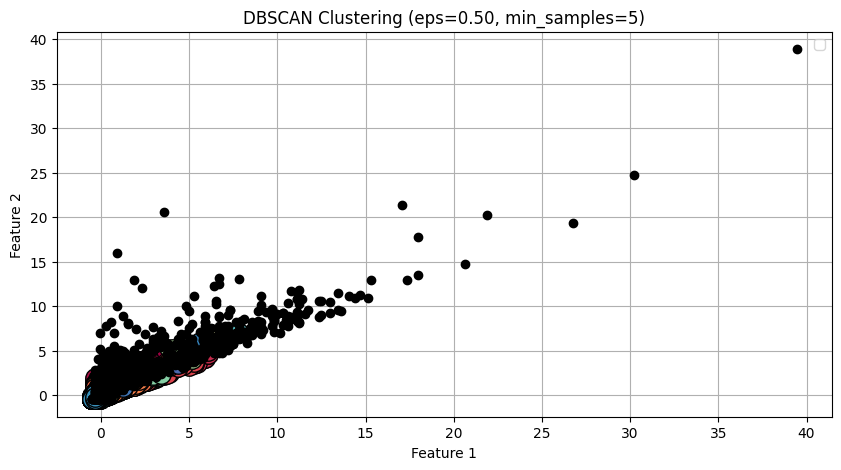

Running DBSCAN with eps=0.50 and min_samples=6
Silhouette Score for eps=0.50 and min_samples=6: 0.33047987239917753


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


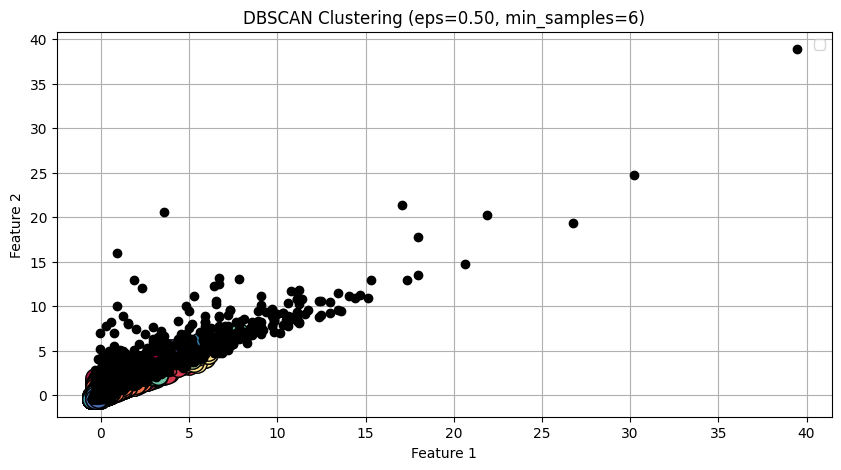

Running DBSCAN with eps=0.50 and min_samples=7
Silhouette Score for eps=0.50 and min_samples=7: 0.3535341187322967


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


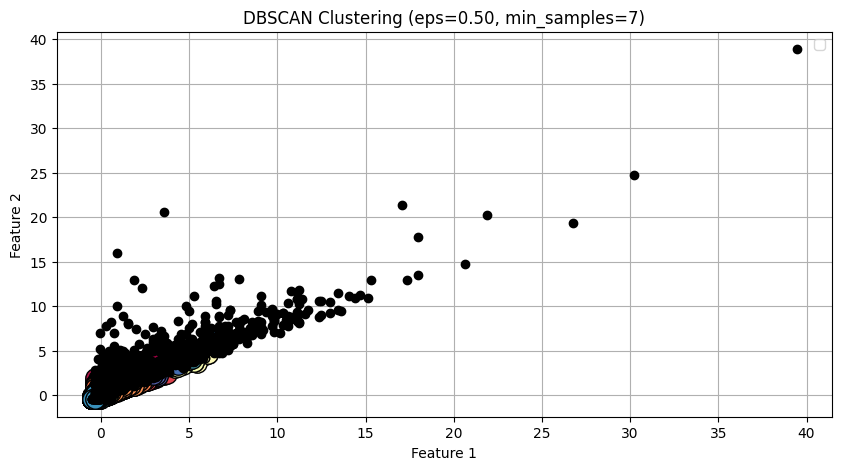

Running DBSCAN with eps=0.50 and min_samples=8
Silhouette Score for eps=0.50 and min_samples=8: 0.3560963511468412


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


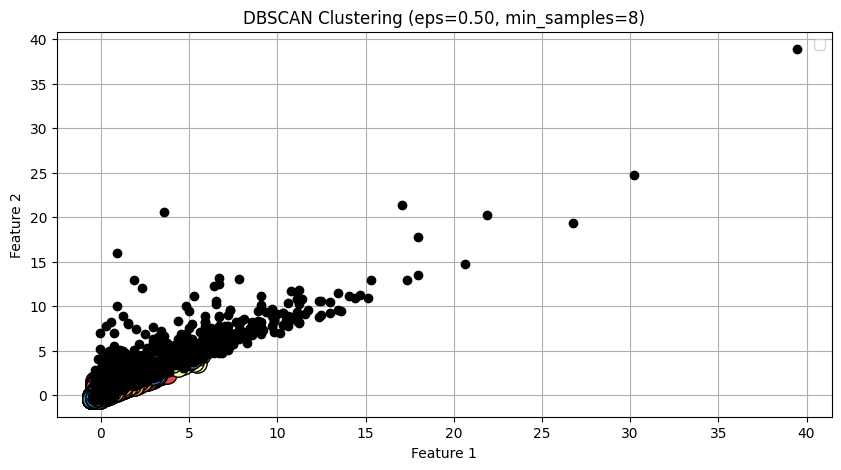

Running DBSCAN with eps=0.50 and min_samples=9
Silhouette Score for eps=0.50 and min_samples=9: 0.3544905875348653


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


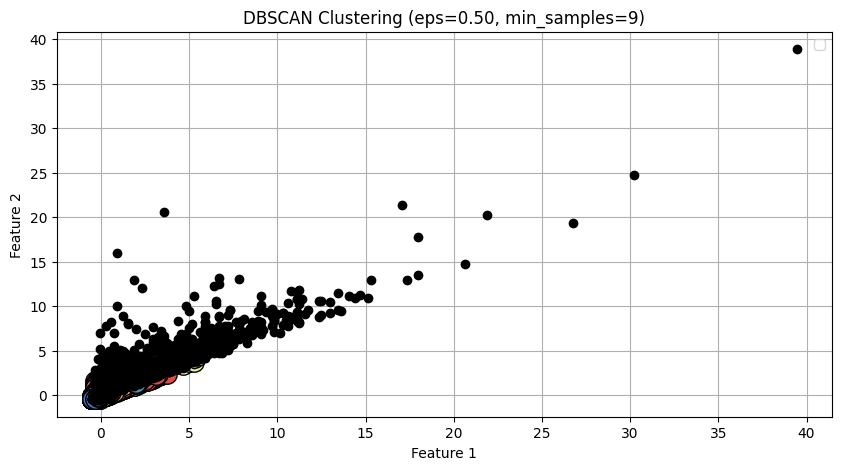

Running DBSCAN with eps=0.50 and min_samples=10
Silhouette Score for eps=0.50 and min_samples=10: 0.3540990946739452


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


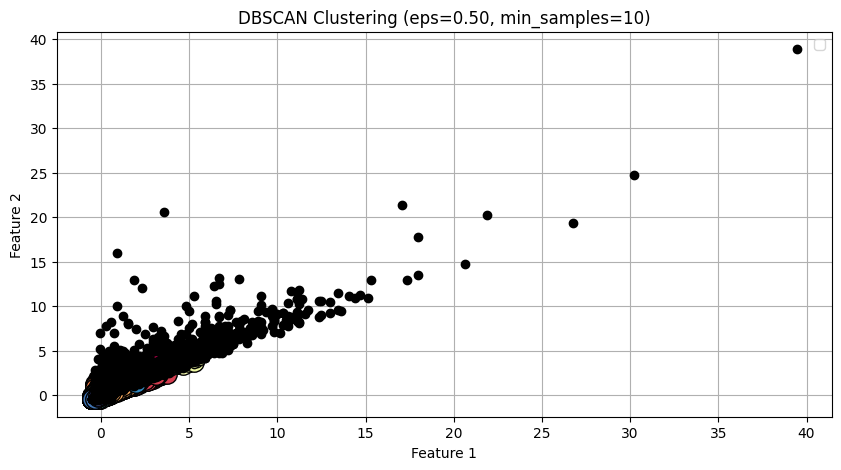

Running DBSCAN with eps=0.50 and min_samples=11
Silhouette Score for eps=0.50 and min_samples=11: 0.38413295489037763


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


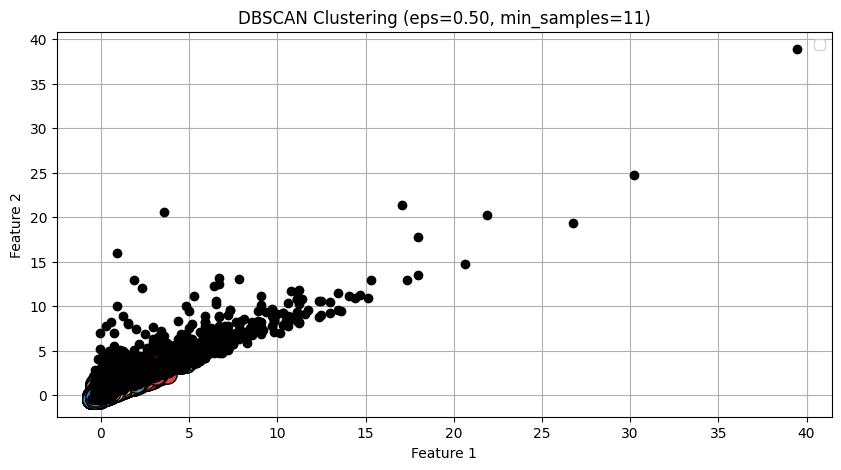

Running DBSCAN with eps=0.50 and min_samples=12
Silhouette Score for eps=0.50 and min_samples=12: 0.4070120984501651


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


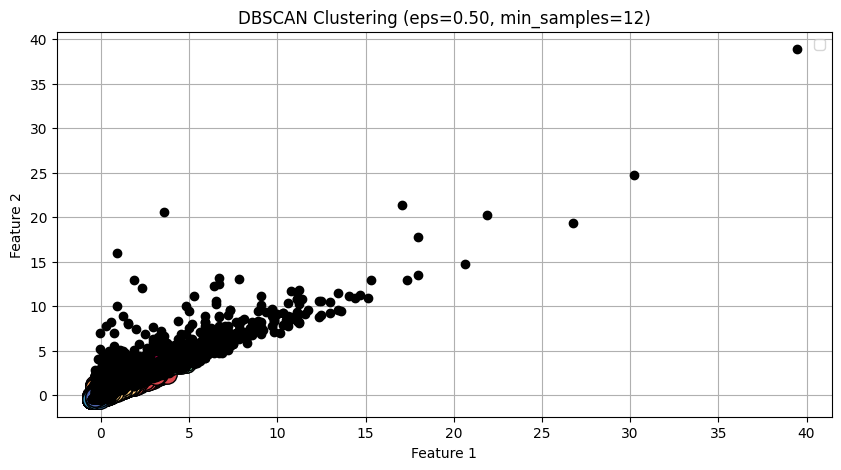

Running DBSCAN with eps=0.50 and min_samples=13
Silhouette Score for eps=0.50 and min_samples=13: 0.40807644297409423


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


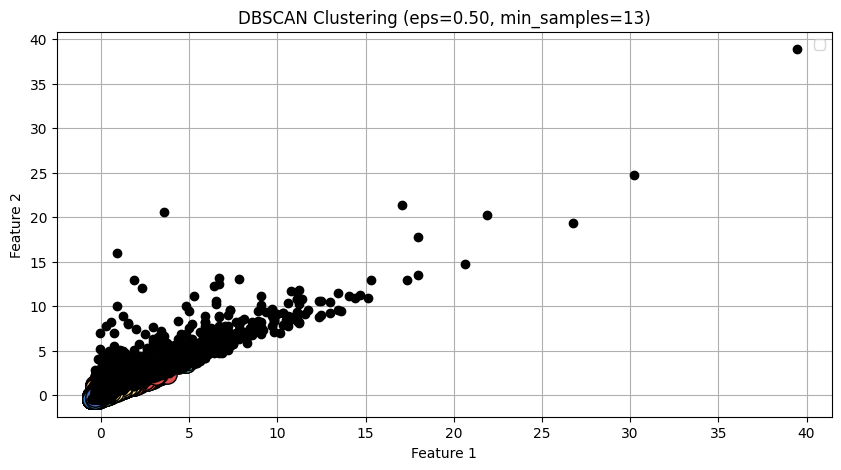

Running DBSCAN with eps=0.50 and min_samples=14
Silhouette Score for eps=0.50 and min_samples=14: 0.40925912144650306


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


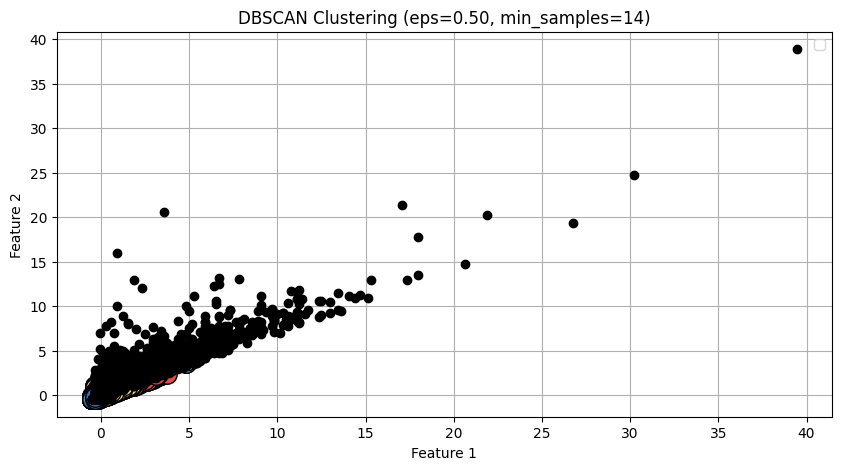

Running DBSCAN with eps=0.50 and min_samples=15
Silhouette Score for eps=0.50 and min_samples=15: 0.4391820550870878


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


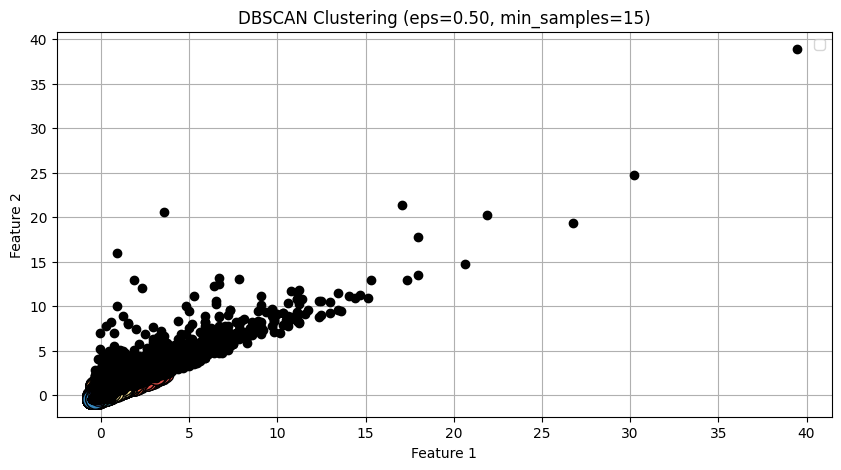

Running DBSCAN with eps=0.60 and min_samples=5
Silhouette Score for eps=0.60 and min_samples=5: 0.5867717492934046


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


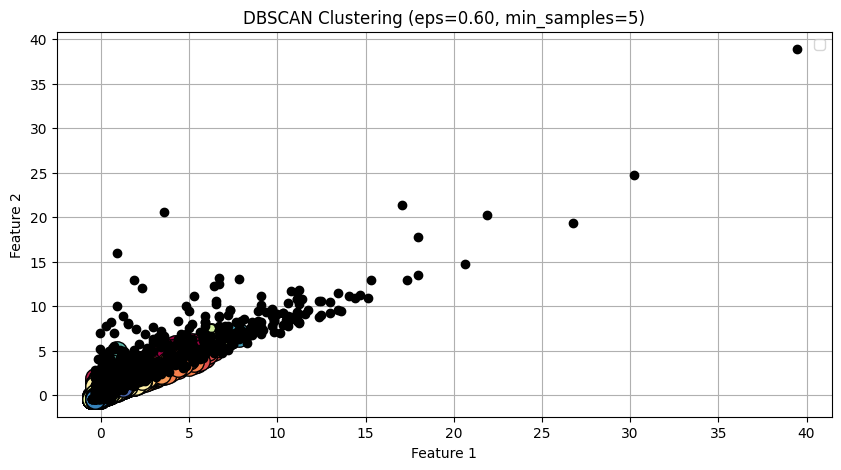

Running DBSCAN with eps=0.60 and min_samples=6
Silhouette Score for eps=0.60 and min_samples=6: 0.58816162549608


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


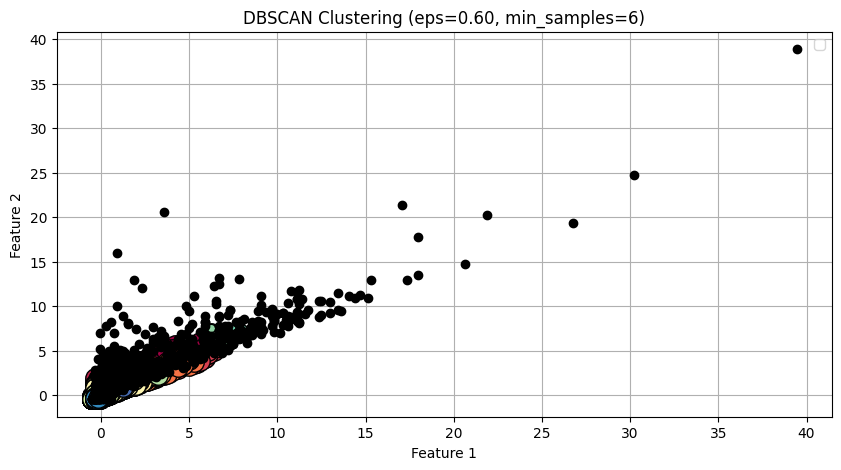

Running DBSCAN with eps=0.60 and min_samples=7
Silhouette Score for eps=0.60 and min_samples=7: 0.5942849940788486


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


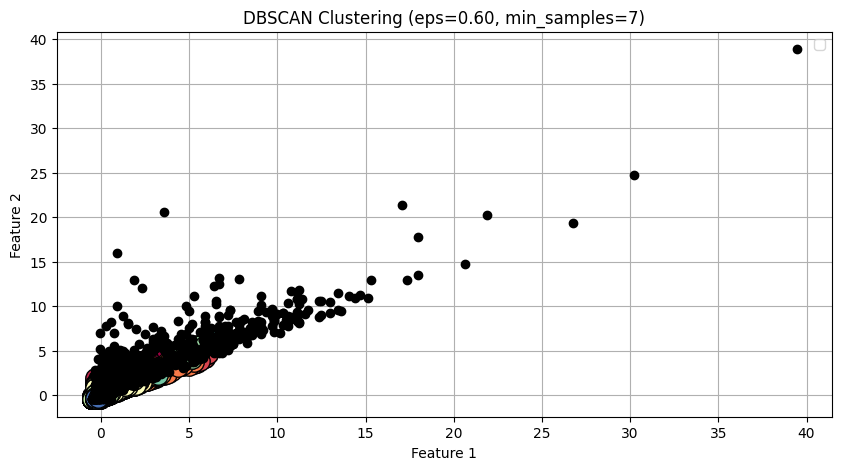

Running DBSCAN with eps=0.60 and min_samples=8
Silhouette Score for eps=0.60 and min_samples=8: 0.6008620607359871


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


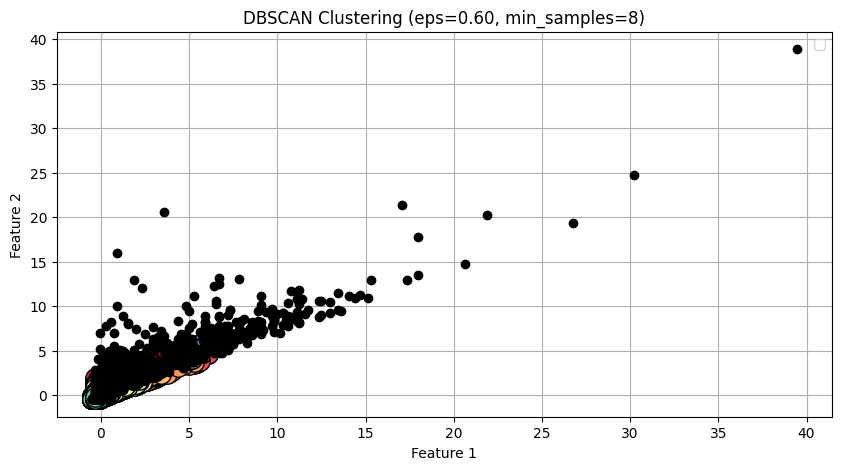

Running DBSCAN with eps=0.60 and min_samples=9
Silhouette Score for eps=0.60 and min_samples=9: 0.6028392881435976


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


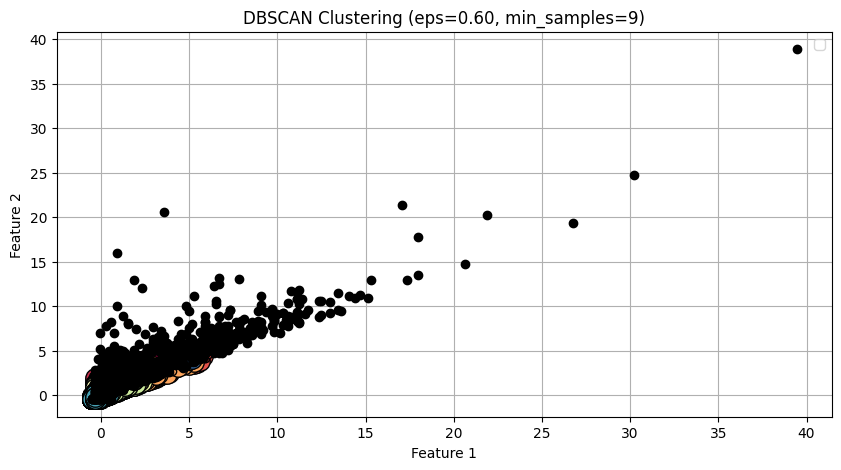

Running DBSCAN with eps=0.60 and min_samples=10
Silhouette Score for eps=0.60 and min_samples=10: 0.6051846710215331


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


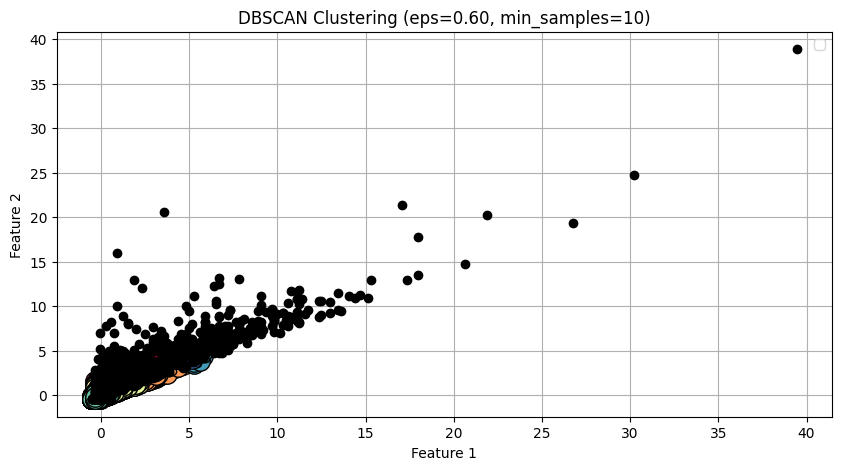

Running DBSCAN with eps=0.60 and min_samples=11
Silhouette Score for eps=0.60 and min_samples=11: 0.6051445792772712


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


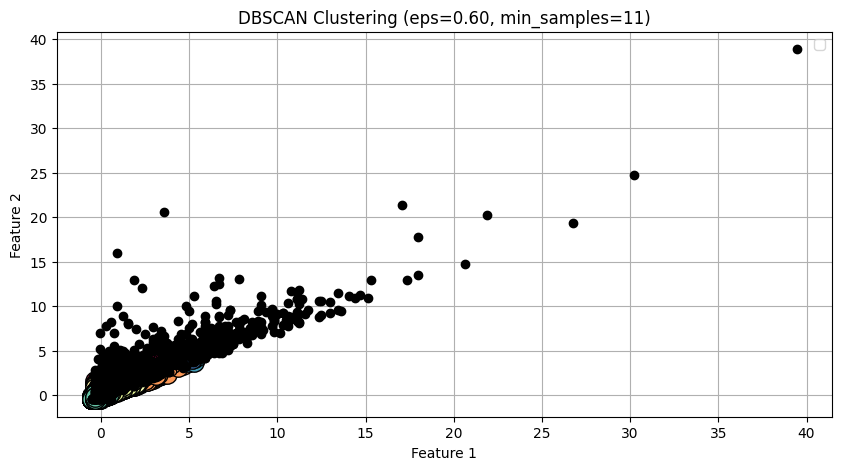

Running DBSCAN with eps=0.60 and min_samples=12
Silhouette Score for eps=0.60 and min_samples=12: 0.6066971657117217


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


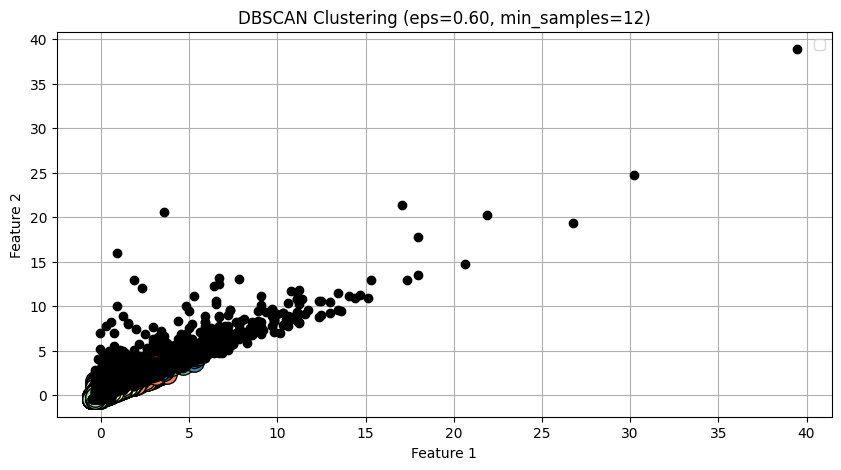

Running DBSCAN with eps=0.60 and min_samples=13
Silhouette Score for eps=0.60 and min_samples=13: 0.6082709317717595


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


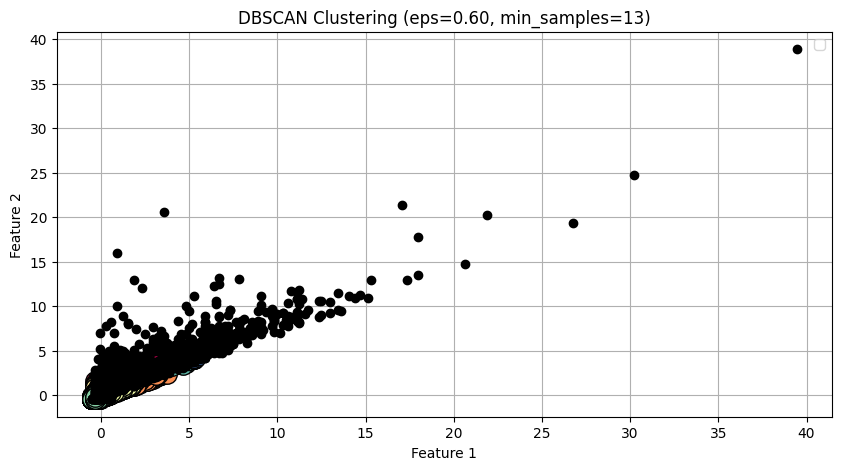

Running DBSCAN with eps=0.60 and min_samples=14
Silhouette Score for eps=0.60 and min_samples=14: 0.6079694150118543


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


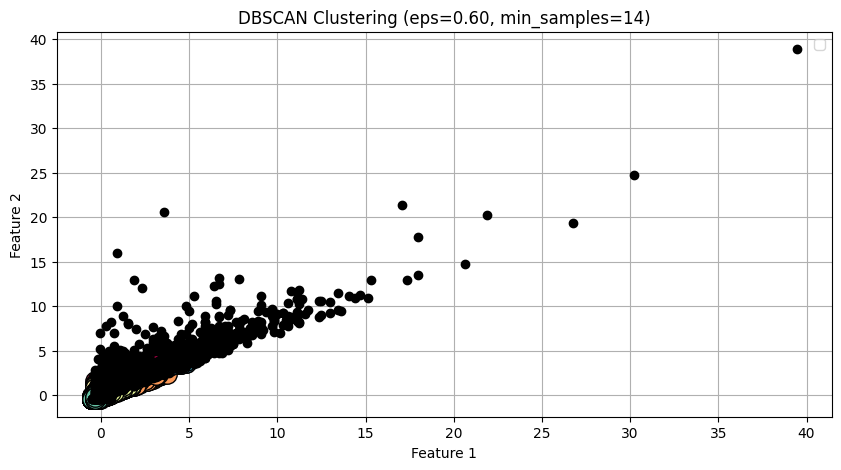

Running DBSCAN with eps=0.60 and min_samples=15
Silhouette Score for eps=0.60 and min_samples=15: 0.6087104878533363


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


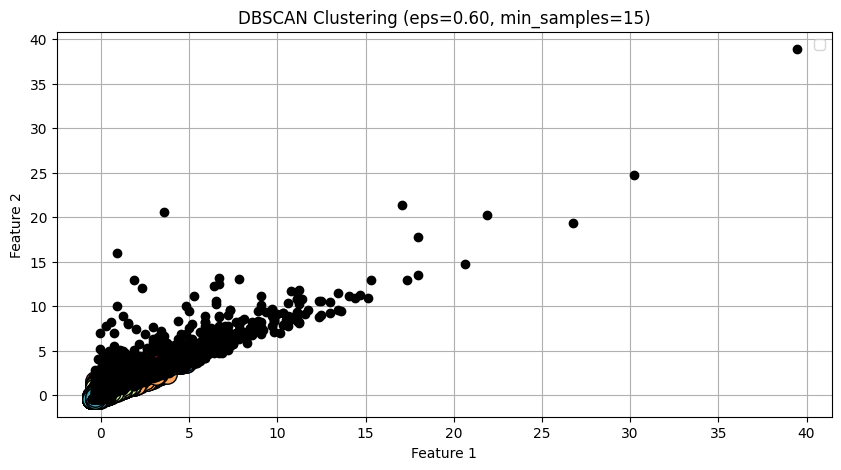

Running DBSCAN with eps=0.70 and min_samples=5
Silhouette Score for eps=0.70 and min_samples=5: 0.5792133962682462


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


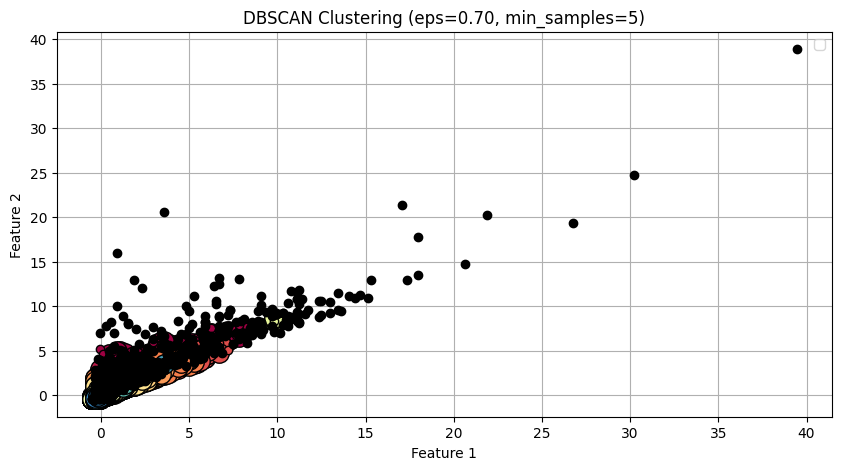

Running DBSCAN with eps=0.70 and min_samples=6
Silhouette Score for eps=0.70 and min_samples=6: 0.5891637121891754


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


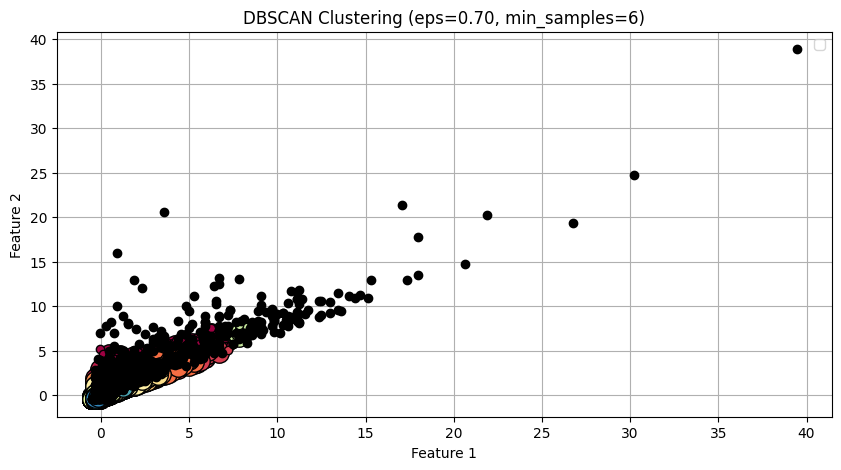

Running DBSCAN with eps=0.70 and min_samples=7
Silhouette Score for eps=0.70 and min_samples=7: 0.5933039974939981


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


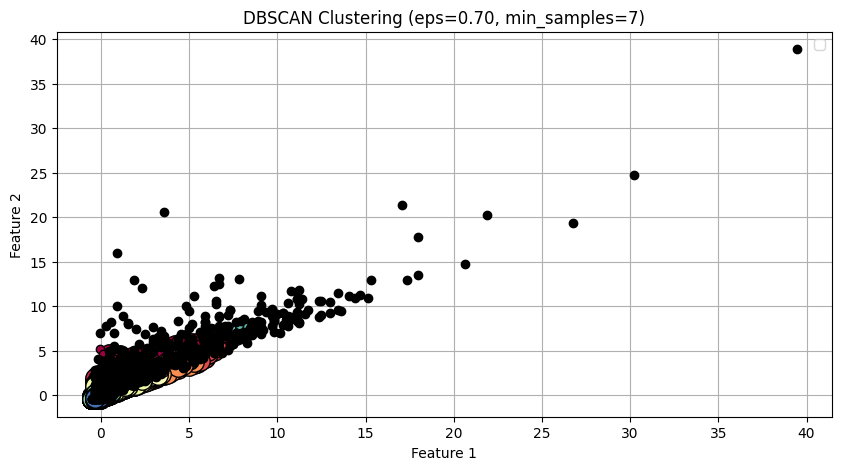

Running DBSCAN with eps=0.70 and min_samples=8
Silhouette Score for eps=0.70 and min_samples=8: 0.5943254714071372


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


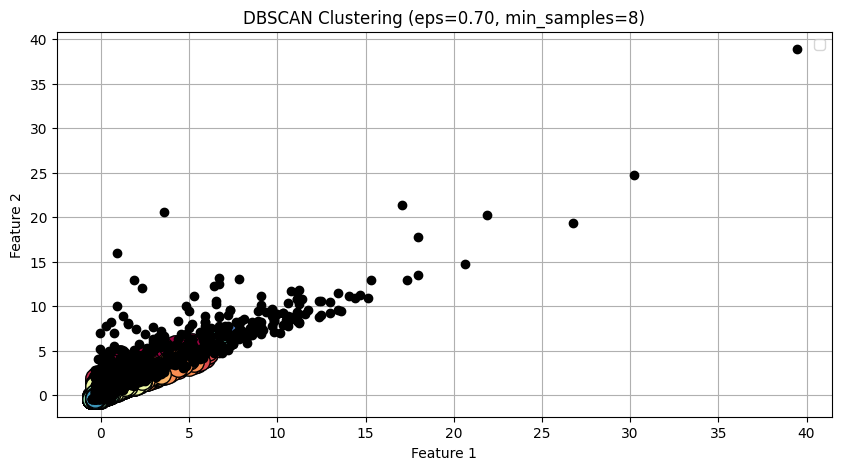

Running DBSCAN with eps=0.70 and min_samples=9
Silhouette Score for eps=0.70 and min_samples=9: 0.595527310638396


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


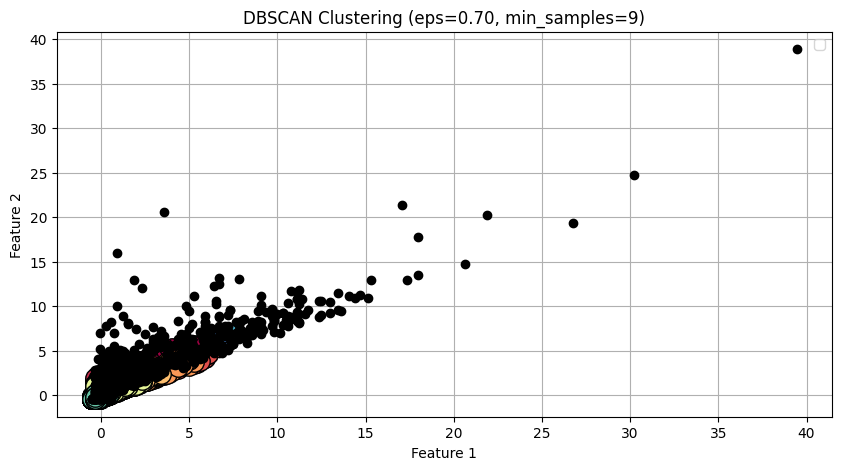

Running DBSCAN with eps=0.70 and min_samples=10
Silhouette Score for eps=0.70 and min_samples=10: 0.5959553138556389


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


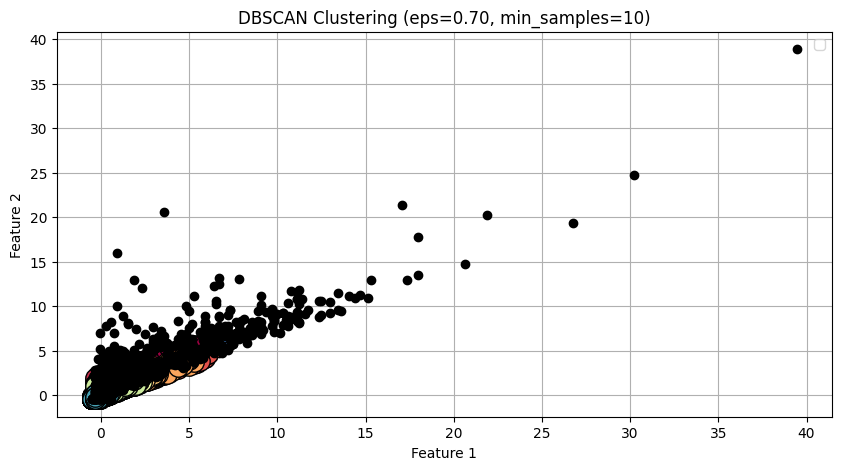

Running DBSCAN with eps=0.70 and min_samples=11
Silhouette Score for eps=0.70 and min_samples=11: 0.6023022932923476


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


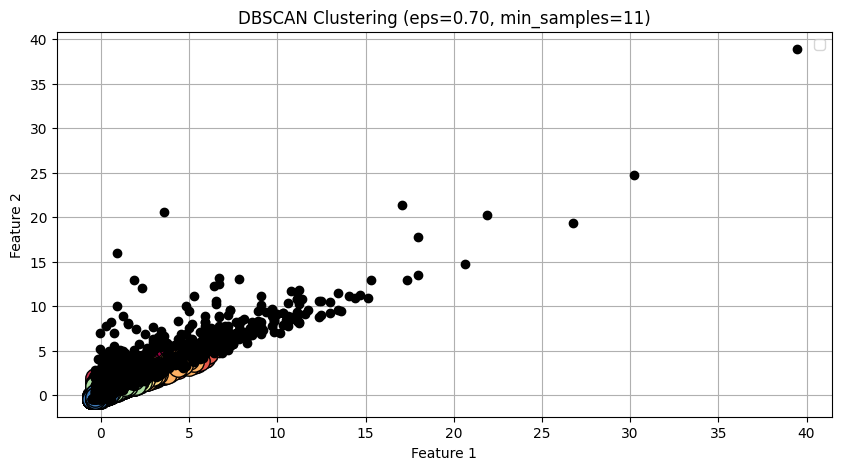

Running DBSCAN with eps=0.70 and min_samples=12
Silhouette Score for eps=0.70 and min_samples=12: 0.6028959250740319


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


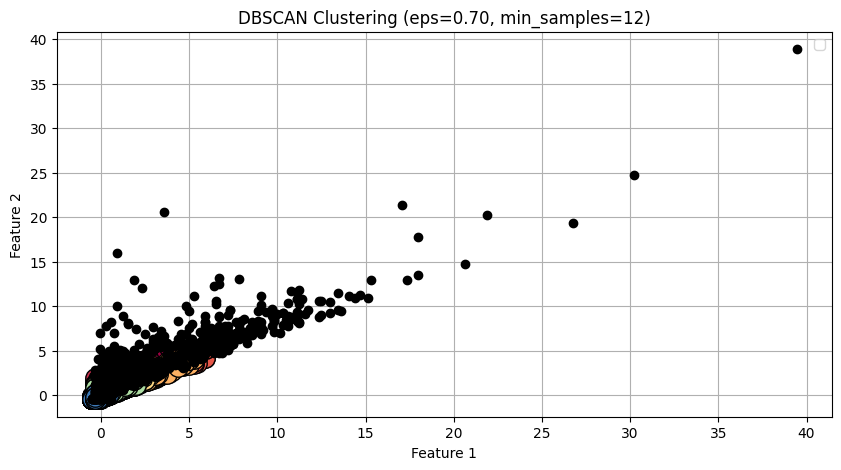

Running DBSCAN with eps=0.70 and min_samples=13
Silhouette Score for eps=0.70 and min_samples=13: 0.6033185037164323


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


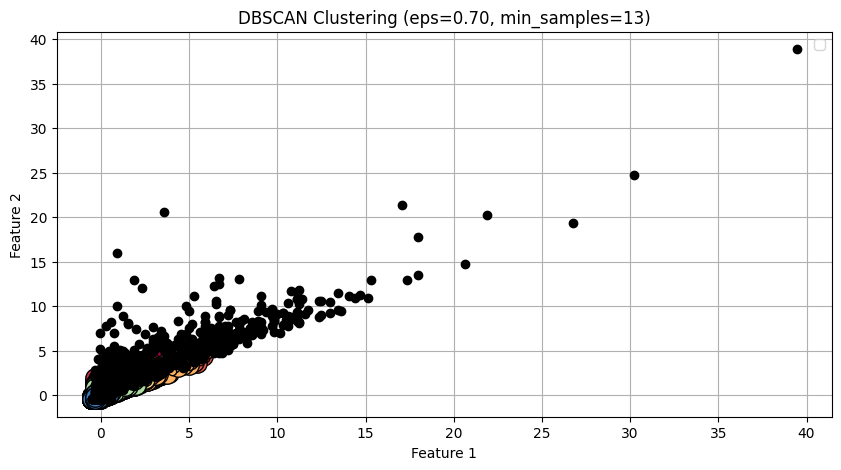

Running DBSCAN with eps=0.70 and min_samples=14
Silhouette Score for eps=0.70 and min_samples=14: 0.592050436122728


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


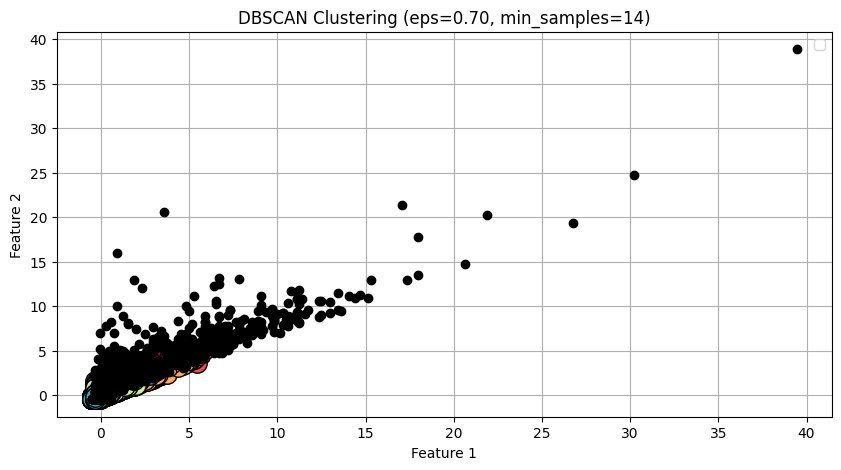

Running DBSCAN with eps=0.70 and min_samples=15
Silhouette Score for eps=0.70 and min_samples=15: 0.601060924067908


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


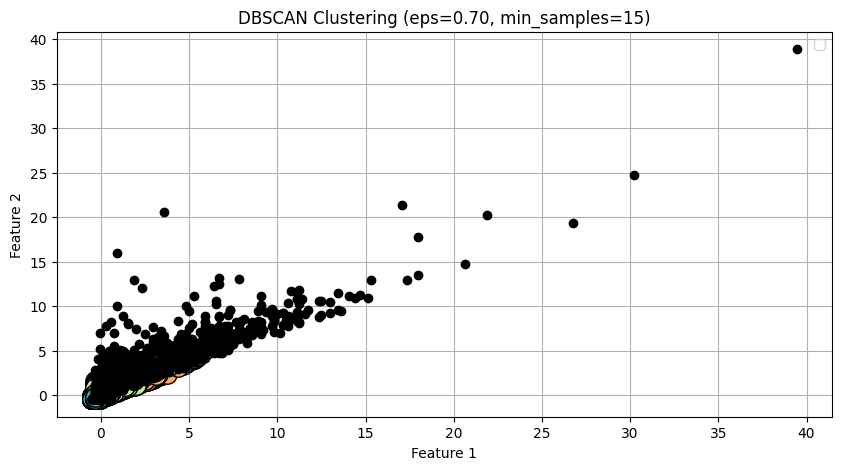

Running DBSCAN with eps=0.80 and min_samples=5
Silhouette Score for eps=0.80 and min_samples=5: 0.5816196586124157


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


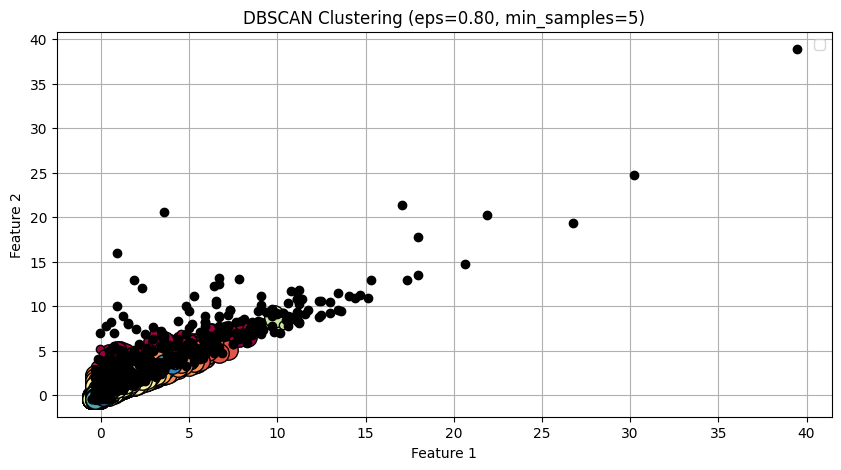

Running DBSCAN with eps=0.80 and min_samples=6
Silhouette Score for eps=0.80 and min_samples=6: 0.5865755686456465


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


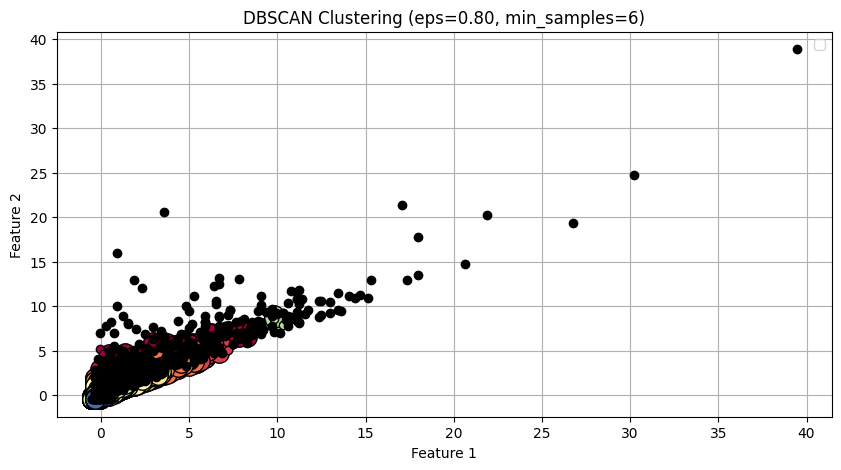

Running DBSCAN with eps=0.80 and min_samples=7
Silhouette Score for eps=0.80 and min_samples=7: 0.5942297262864127


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


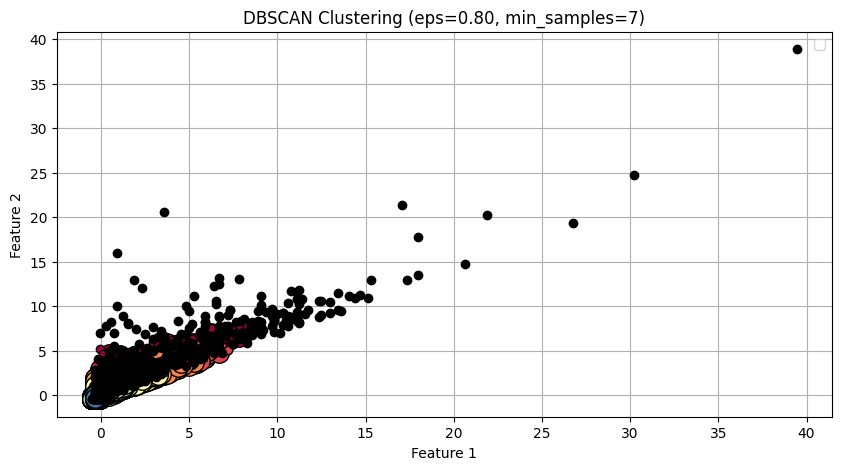

Running DBSCAN with eps=0.80 and min_samples=8
Silhouette Score for eps=0.80 and min_samples=8: 0.5948580383713693


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


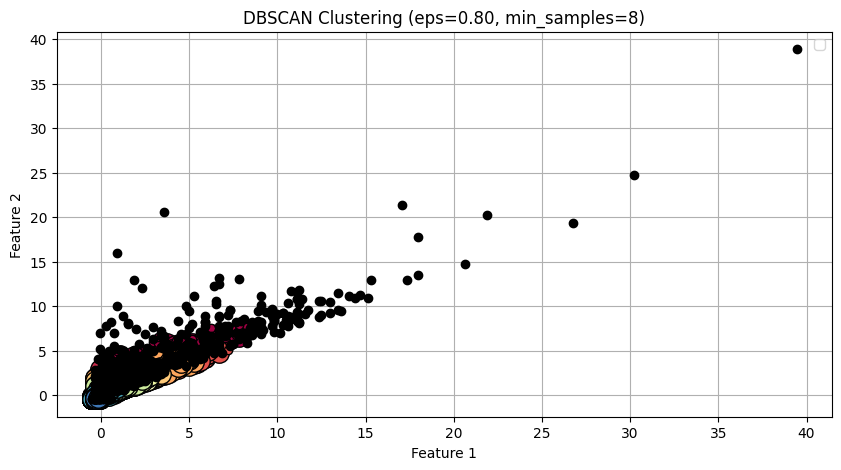

Running DBSCAN with eps=0.80 and min_samples=9
Silhouette Score for eps=0.80 and min_samples=9: 0.5950468241559096


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


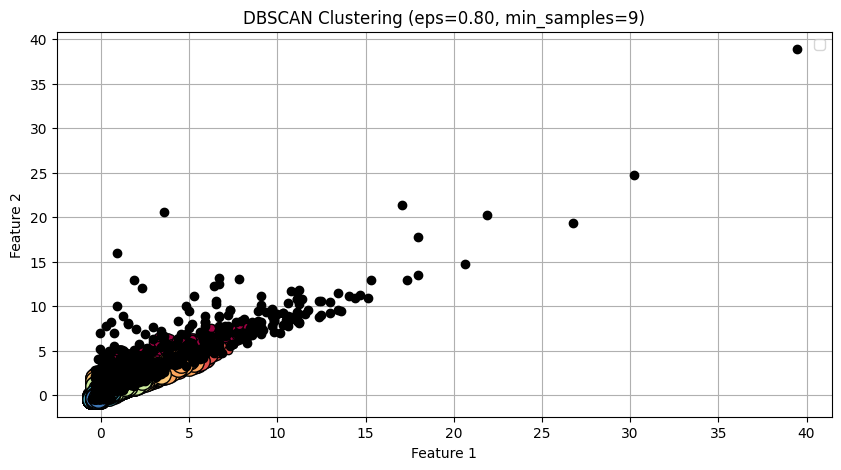

Running DBSCAN with eps=0.80 and min_samples=10
Silhouette Score for eps=0.80 and min_samples=10: 0.5962929252201175


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


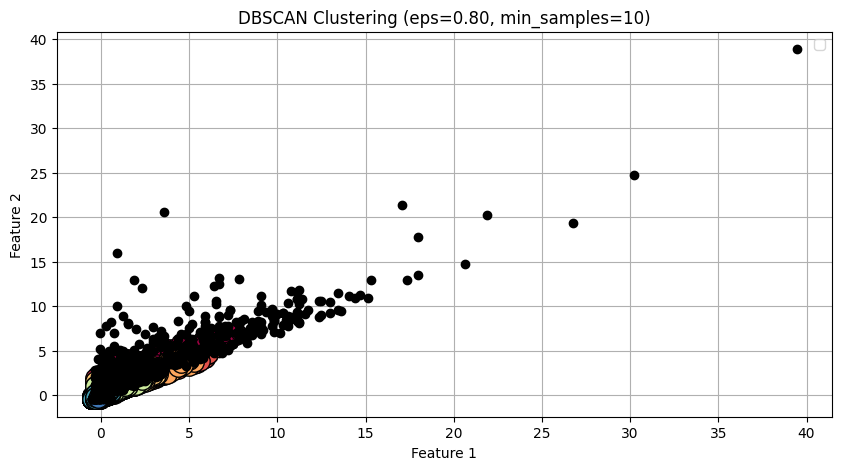

Running DBSCAN with eps=0.80 and min_samples=11
Silhouette Score for eps=0.80 and min_samples=11: 0.5955294724701908


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


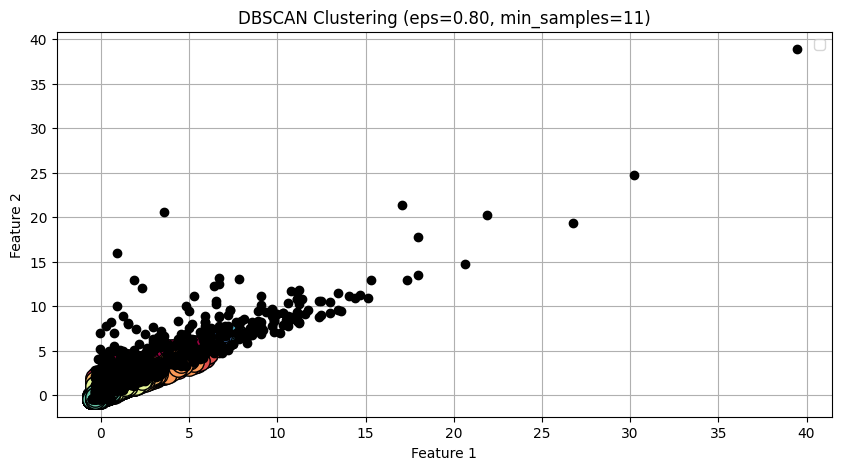

Running DBSCAN with eps=0.80 and min_samples=12
Silhouette Score for eps=0.80 and min_samples=12: 0.595986551619066


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


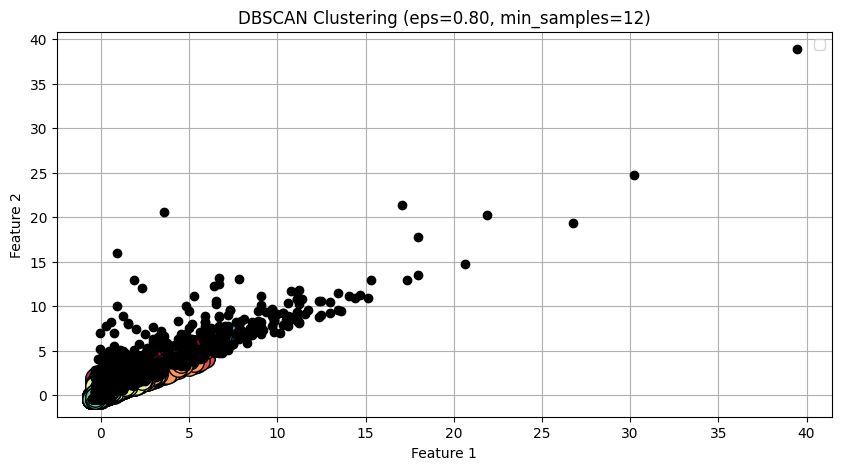

Running DBSCAN with eps=0.80 and min_samples=13
Silhouette Score for eps=0.80 and min_samples=13: 0.5961914615949911


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


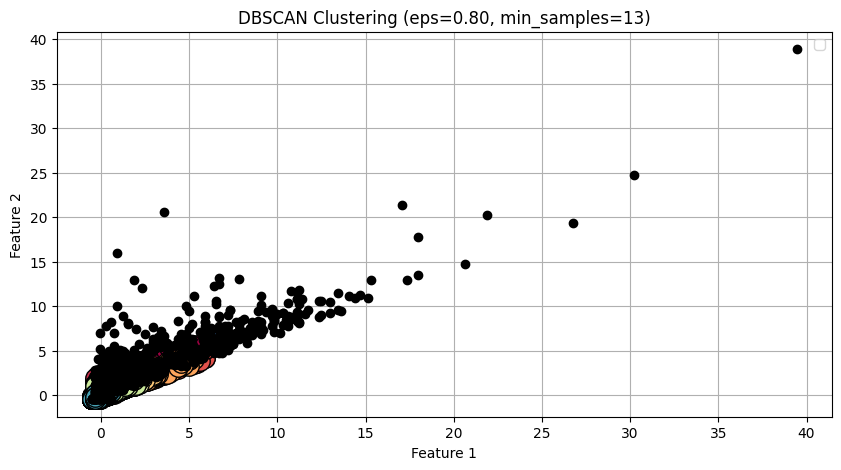

Running DBSCAN with eps=0.80 and min_samples=14
Silhouette Score for eps=0.80 and min_samples=14: 0.6017001985152929


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


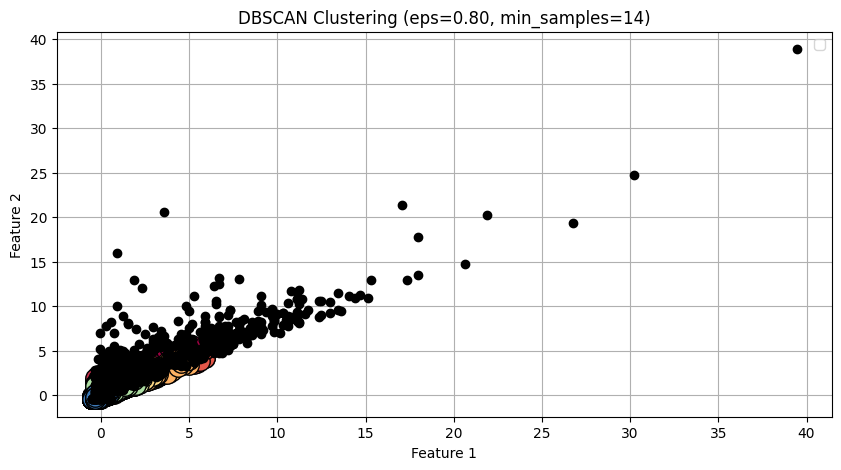

Running DBSCAN with eps=0.80 and min_samples=15
Silhouette Score for eps=0.80 and min_samples=15: 0.6020532159376728


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


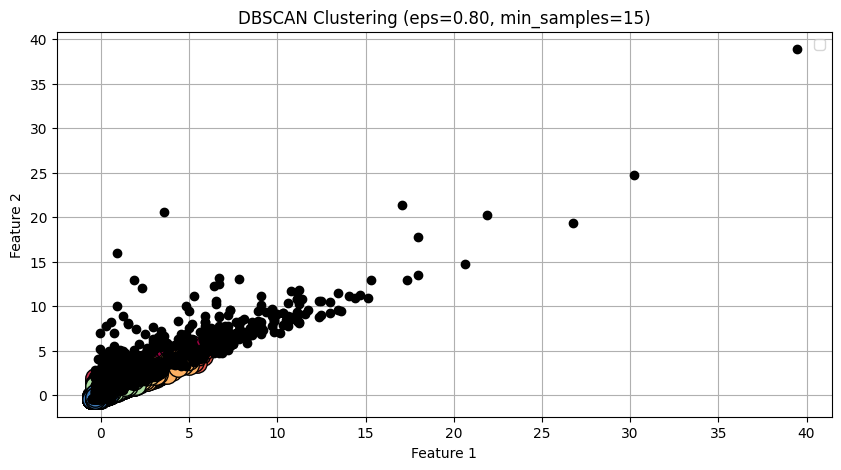

Running DBSCAN with eps=0.90 and min_samples=5
Silhouette Score for eps=0.90 and min_samples=5: 0.5806038689114421


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


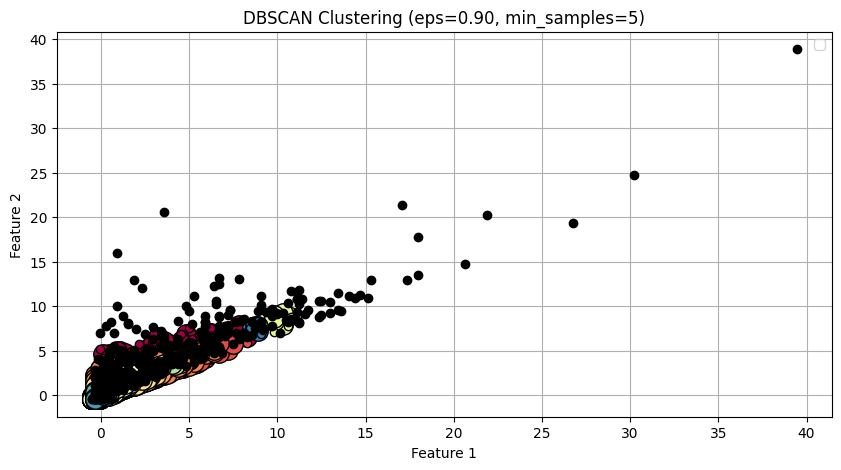

Running DBSCAN with eps=0.90 and min_samples=6
Silhouette Score for eps=0.90 and min_samples=6: 0.5821940298758861


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


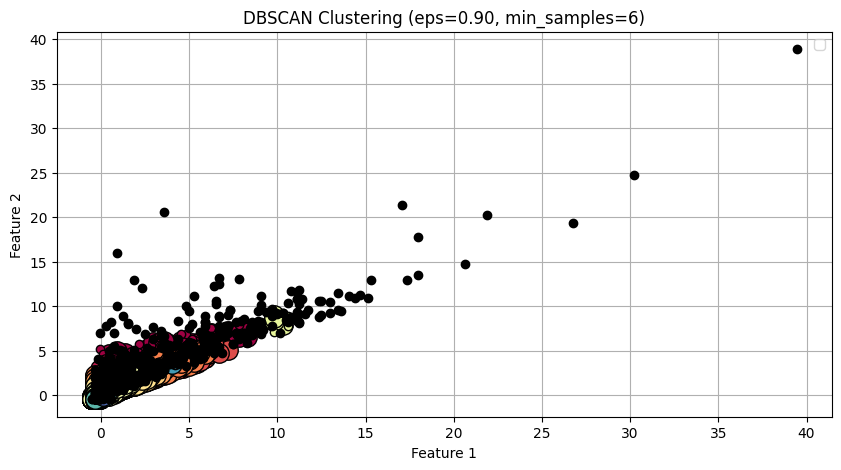

Running DBSCAN with eps=0.90 and min_samples=7
Silhouette Score for eps=0.90 and min_samples=7: 0.5817913077919903


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


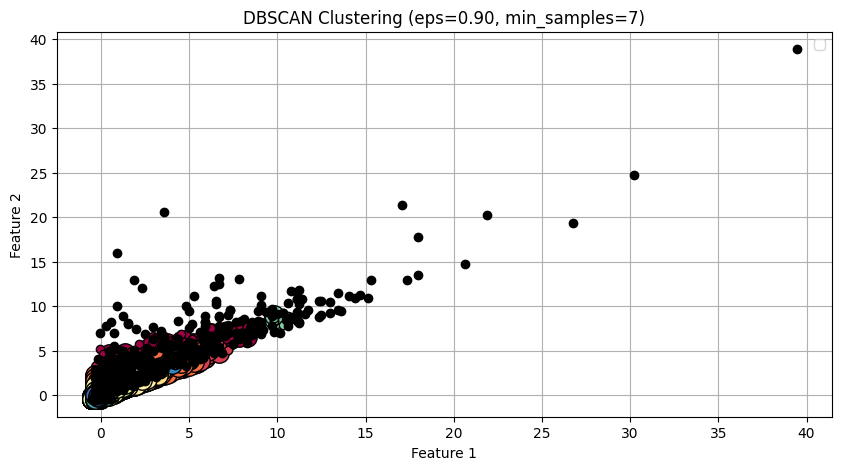

Running DBSCAN with eps=0.90 and min_samples=8
Silhouette Score for eps=0.90 and min_samples=8: 0.5862740899969608


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


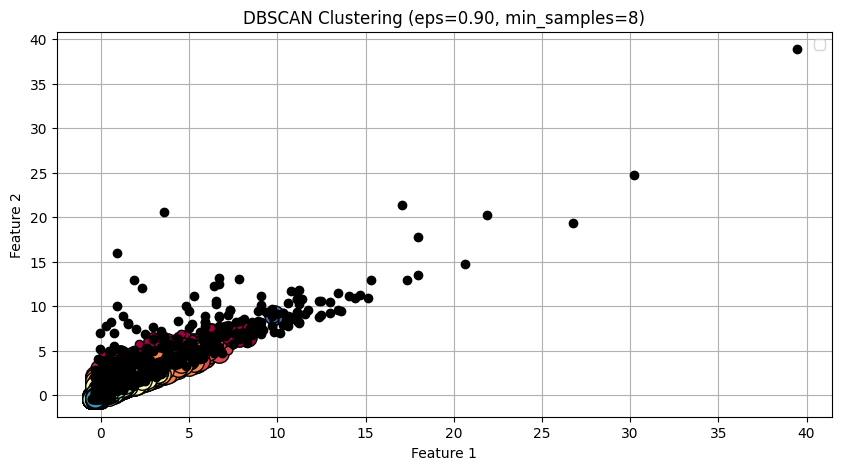

Running DBSCAN with eps=0.90 and min_samples=9
Silhouette Score for eps=0.90 and min_samples=9: 0.5941730345528969


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


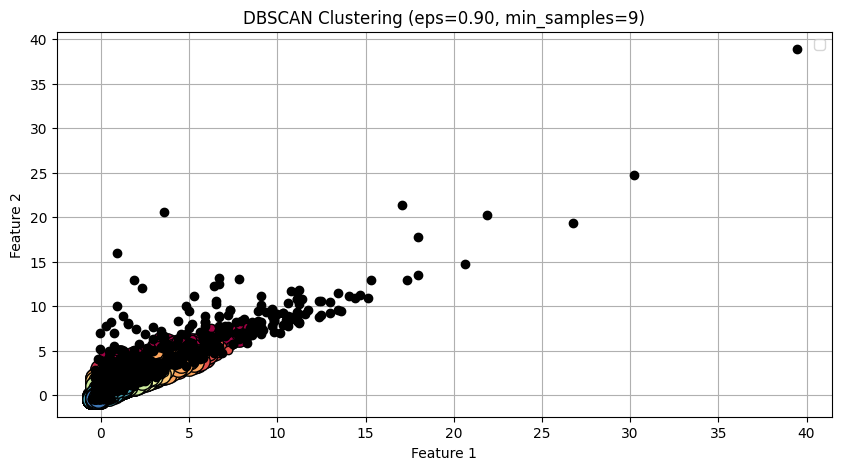

Running DBSCAN with eps=0.90 and min_samples=10
Silhouette Score for eps=0.90 and min_samples=10: 0.5944546367703356


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


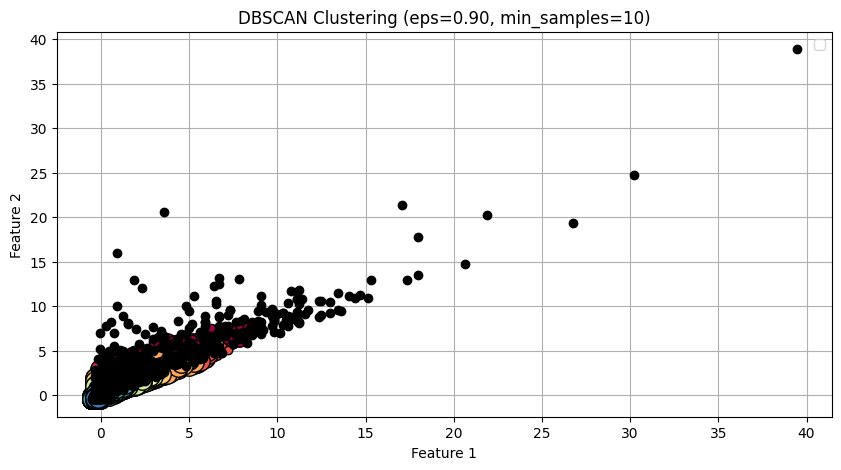

Running DBSCAN with eps=0.90 and min_samples=11
Silhouette Score for eps=0.90 and min_samples=11: 0.5941962815640591


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


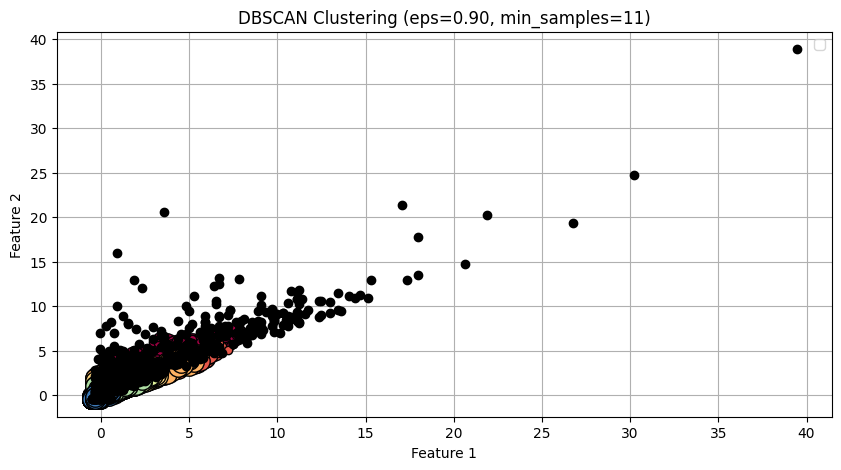

Running DBSCAN with eps=0.90 and min_samples=12
Silhouette Score for eps=0.90 and min_samples=12: 0.5948117879331085


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


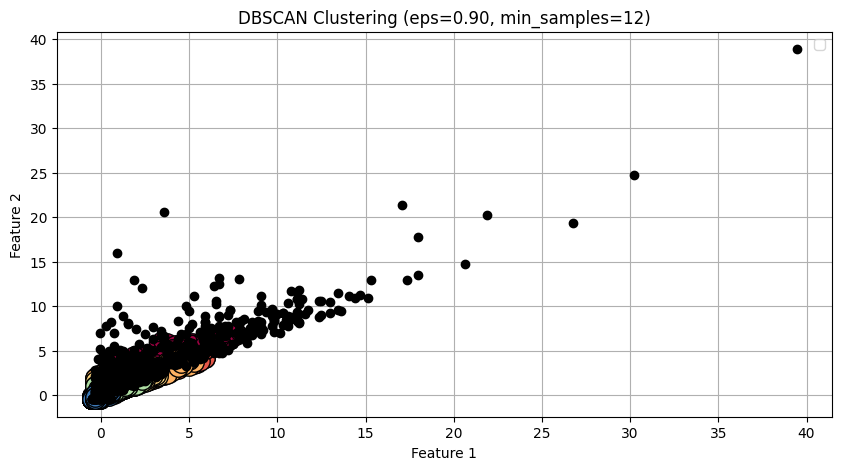

Running DBSCAN with eps=0.90 and min_samples=13
Silhouette Score for eps=0.90 and min_samples=13: 0.5957314514323068


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


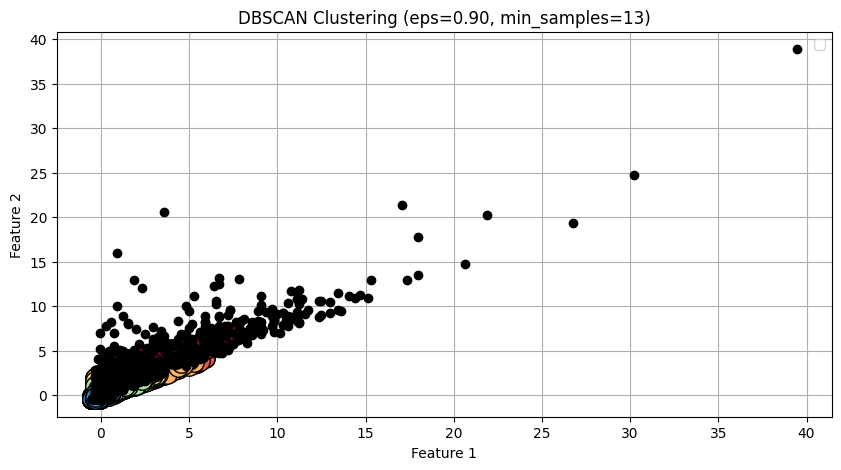

Running DBSCAN with eps=0.90 and min_samples=14
Silhouette Score for eps=0.90 and min_samples=14: 0.5960541006058491


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:71: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col_name] = labels
C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


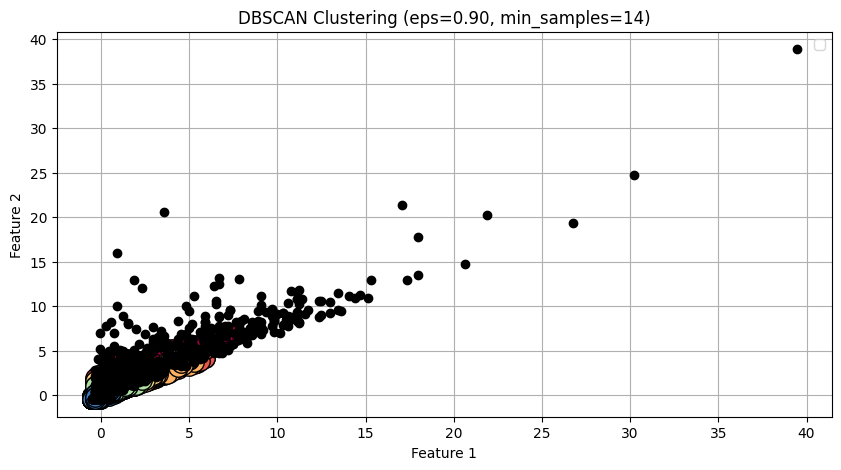

Running DBSCAN with eps=0.90 and min_samples=15
Silhouette Score for eps=0.90 and min_samples=15: 0.5996758961540065


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:71: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col_name] = labels
C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


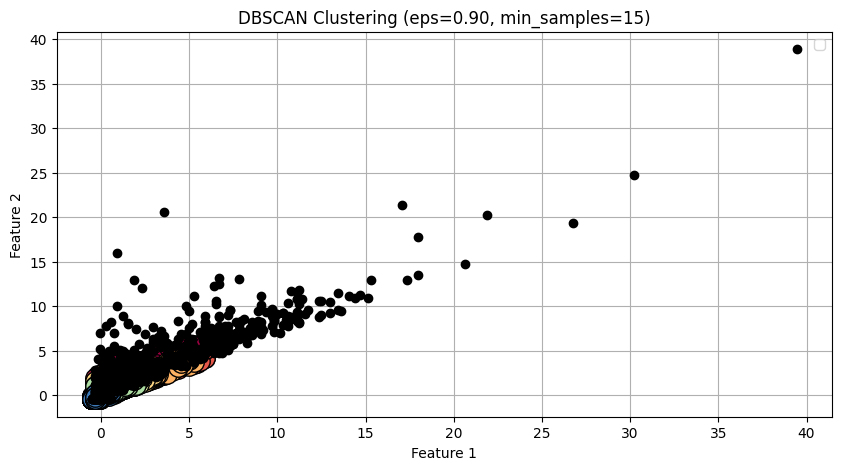

Running DBSCAN with eps=1.00 and min_samples=5
Silhouette Score for eps=1.00 and min_samples=5: 0.5857520038496409


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:71: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col_name] = labels
C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


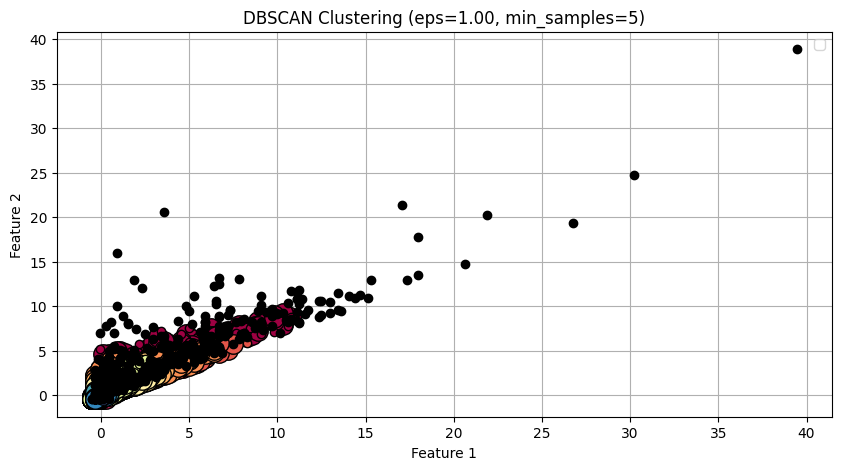

Running DBSCAN with eps=1.00 and min_samples=6
Silhouette Score for eps=1.00 and min_samples=6: 0.5873304149242664


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:71: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col_name] = labels
C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


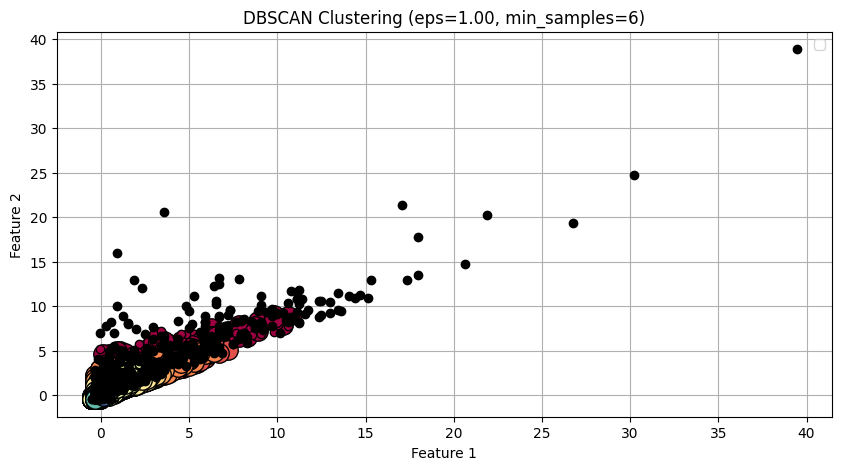

Running DBSCAN with eps=1.00 and min_samples=7
Silhouette Score for eps=1.00 and min_samples=7: 0.5873798057886319


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:71: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col_name] = labels
C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


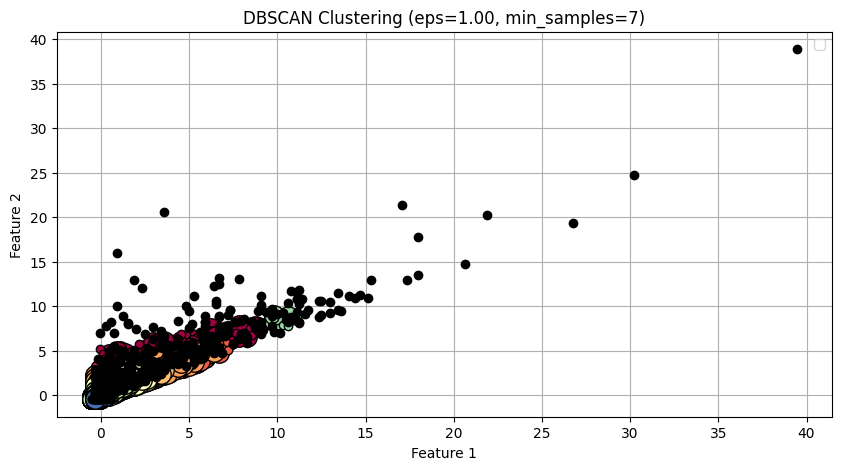

Running DBSCAN with eps=1.00 and min_samples=8
Silhouette Score for eps=1.00 and min_samples=8: 0.5842030821439135


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:71: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col_name] = labels
C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


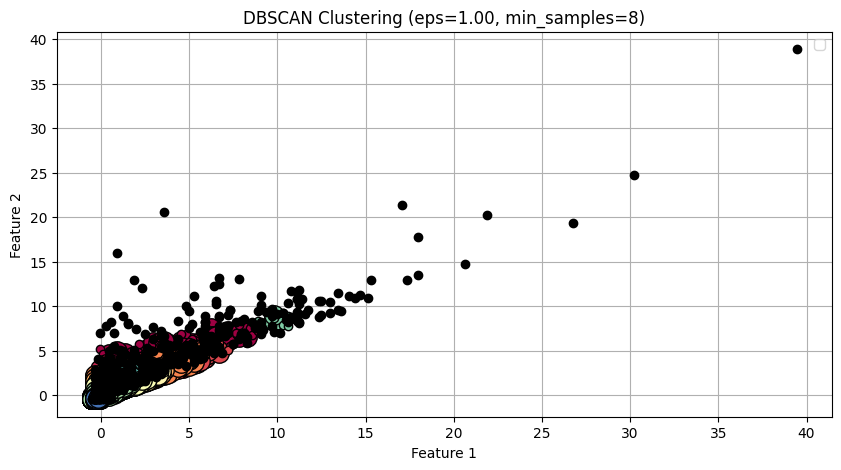

Running DBSCAN with eps=1.00 and min_samples=9
Silhouette Score for eps=1.00 and min_samples=9: 0.5848924055043173


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:71: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col_name] = labels
C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


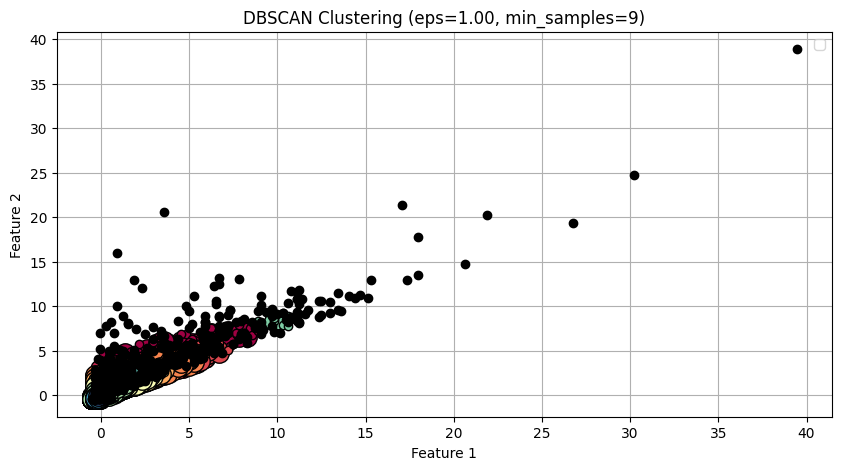

Running DBSCAN with eps=1.00 and min_samples=10
Silhouette Score for eps=1.00 and min_samples=10: 0.5921620896555817


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:71: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col_name] = labels
C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


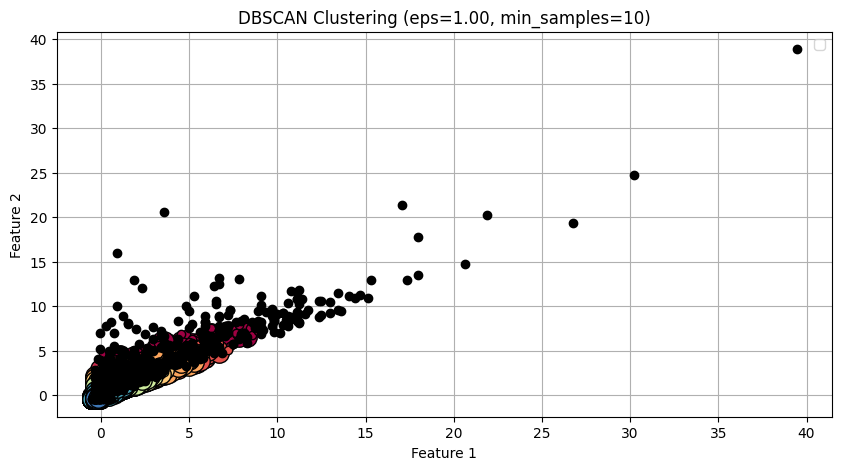

Running DBSCAN with eps=1.00 and min_samples=11
Silhouette Score for eps=1.00 and min_samples=11: 0.5919075254765783


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:71: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col_name] = labels
C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


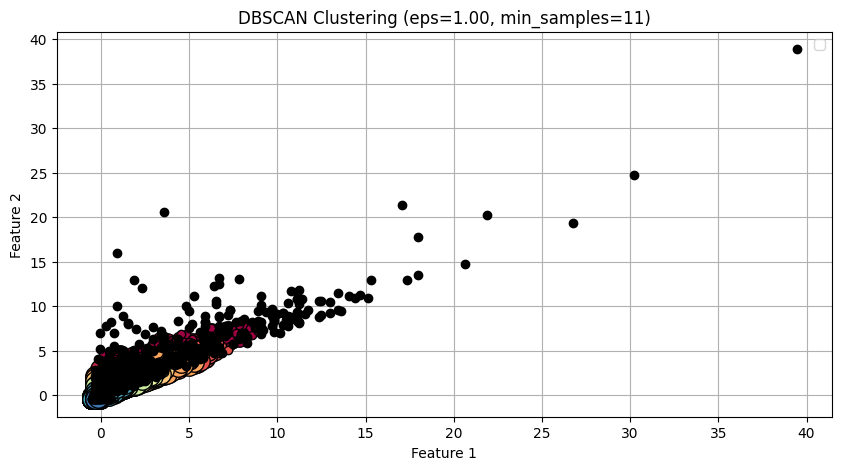

Running DBSCAN with eps=1.00 and min_samples=12
Silhouette Score for eps=1.00 and min_samples=12: 0.5920430473845641


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:71: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col_name] = labels
C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


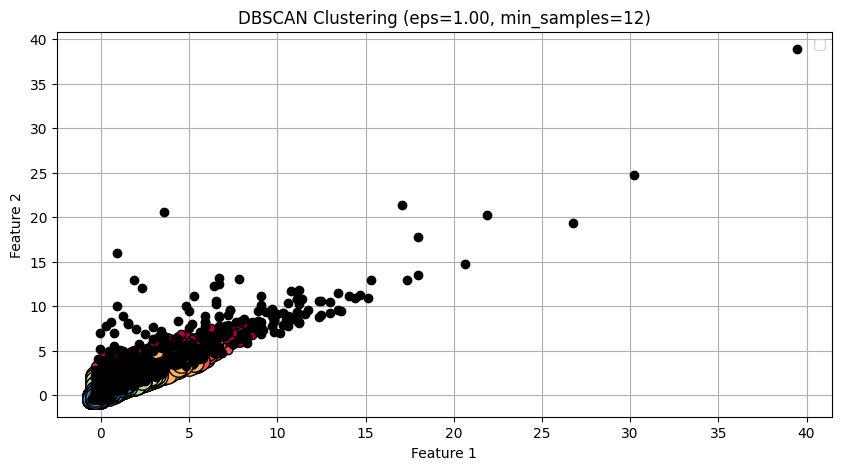

Running DBSCAN with eps=1.00 and min_samples=13
Silhouette Score for eps=1.00 and min_samples=13: 0.5934790408801194


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:71: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col_name] = labels
C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


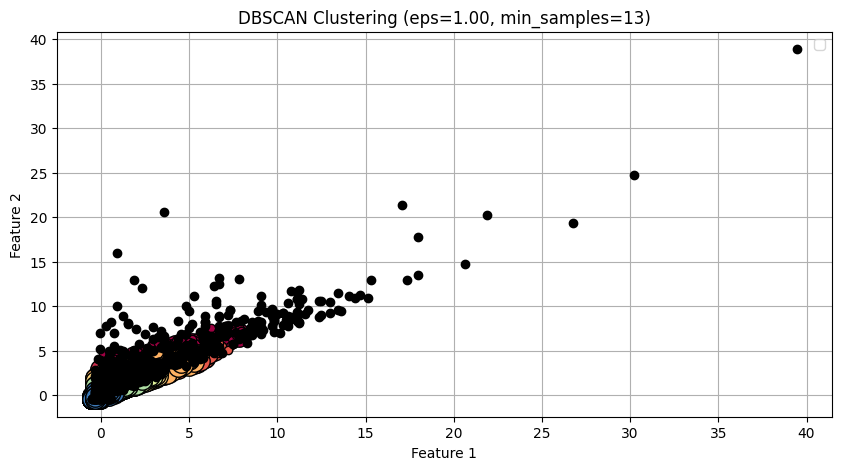

Running DBSCAN with eps=1.00 and min_samples=14
Silhouette Score for eps=1.00 and min_samples=14: 0.5942942141786659


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:71: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col_name] = labels
C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


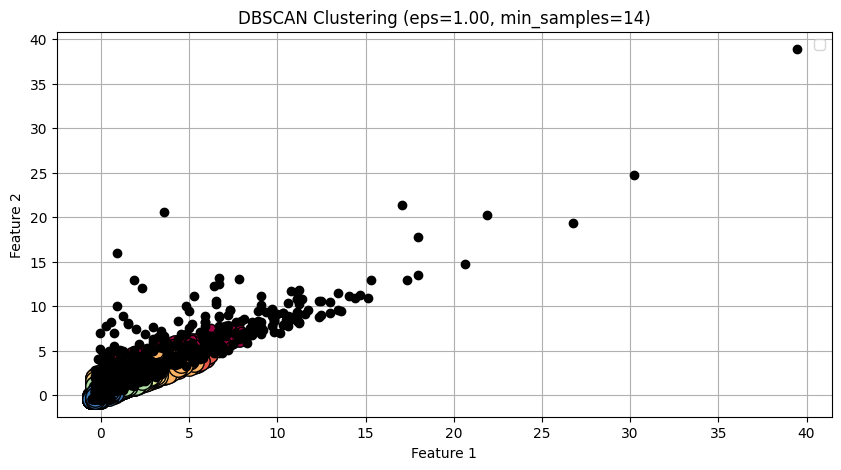

Running DBSCAN with eps=1.00 and min_samples=15
Silhouette Score for eps=1.00 and min_samples=15: 0.5944887396849469


C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:71: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col_name] = labels
C:\Users\lim\AppData\Local\Temp\ipykernel_80932\1196007051.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


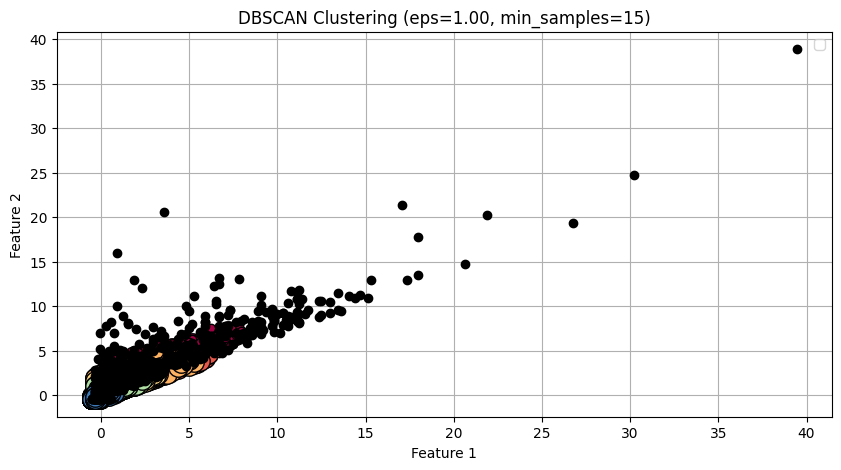


Suggested parameters based on Silhouette Score: eps=0.10, min_samples=5

Results: {'eps': np.float64(0.1), 'min_samples': 5, 'n_clusters': 477, 'noise_points': 4293}


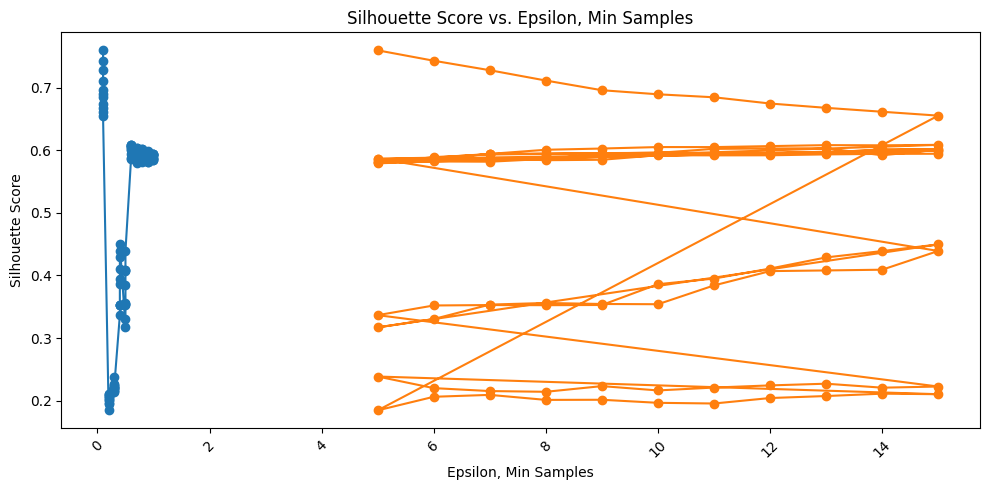

In [ ]:
num_col = ['USERS','ITEMS VIEWED','ITEMS ADDED TO CART',
           'ITEMS CHECKED OUT','ITEMS PURCHASED','ITEM REVENUE']
cat_col = ['best_category','best_subcategory']
df_m2, df_m2_score = cluster_dbscan(df_used, num_col, cat_col,
                   eps_start=0.1, eps_end=1.0, eps_step=0.1,
                   min_samples_start=5, min_samples_end=15, random_state=88)

In [ ]:
df_m2.to_pickle('cluster_df/df_m2.pkl')
df_m2.to_csv('cluster_df/df_m2.csv')
df_m2_score.to_pickle('cluster_df/df_m2_score.pkl')
df_m2_score.to_csv('cluster_df/df_m2_score.csv')

# Interpret the Clustering Results

## Model 1

In [ ]:
df_m1 = pd.read_pickle('cluster_df/df_m1.pkl')

In [ ]:
df_m1

### Apply t-SNE with random initialization
tsne = TSNE(n_components=2, init='random', random_state=42)
X_tsne = tsne.fit_transform(X_dense)

# Plot the results
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['USERS'], cmap='viridis')
plt.colorbar(label='Number of Users')
plt.title('t-SNE visualization of dataset')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

In [ ]:
# Apply t-SNE with random initialization
tsne = TSNE(n_components=2, init='random', random_state=42)
X_tsne = tsne.fit_transform(X_dense)

# Plot the results
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['ITEMS VIEWED'], cmap='viridis')
plt.colorbar(label='Number of Users')
plt.title('t-SNE visualization of dataset')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

In [ ]:
# Apply t-SNE with random initialization
tsne = TSNE(n_components=2, init='random', random_state=42)
X_tsne = tsne.fit_transform(X_dense)

# Plot the results
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['ITEMS ADDED TO CART'], cmap='viridis')
plt.colorbar(label='Number of Users')
plt.title('t-SNE visualization of dataset')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()